In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

In [2]:
# Load the dataset
file_path = r'C:\Users\d3684573\OneDrive\School\Project\Subset_Diabetes_Data.csv'
diabedf = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(diabedf.head())
print(diabedf.describe())


   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

The dataset contains various patient admission details and medical information. Here’s a detailed analysis of the first few rows and summary statistics of the dataset.

Data Description
Columns in the Dataset:
encounter_id: Unique identifier for each patient encounter.
patient_nbr: Unique identifier for each patient.
race: Ethnicity of the patient.
gender: Gender of the patient.
age: Age group of the patient.
weight: Weight of the patient (with some missing values).
admission_type_id: Type of admission (e.g., emergency, elective).
discharge_disposition_id: Disposition at discharge (e.g., home, transferred).
admission_source_id: Source of admission (e.g., referral, emergency room).
time_in_hospital: Duration of hospital stay.
num_lab_procedures: Number of lab procedures performed.
num_procedures: Number of procedures performed.
num_medications: Number of medications administered.
number_outpatient: Number of outpatient visits.
number_emergency: Number of emergency visits.
number_inpatient: Number of inpatient visits.
number_diagnoses: Number of diagnoses made.
citoglipton, insulin, glyburide-metformin, etc.: Various medications (Yes/No).

# Handling Missing Values

In [3]:
import os

# Replace "?" and "Unknown/Invalid" with np.nan
diabedf.replace({"?": np.nan, "Unknown/Invalid": np.nan}, inplace=True)

# Count missing values (np.nan) in each column
missing_counts = diabedf.isnull().sum()
print("Missing Value Counts:")
print(missing_counts)

# Calculate and display the percentage of missing values
missing_percentage = diabedf.isnull().sum() / len(diabedf) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("Percentage of missing values:")
print(missing_percentage)

# Remove columns with high missing values
diabedf.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)

# Impute missing values for categorical features with mode
for column in ['race', 'gender', 'diag_1', 'diag_2', 'diag_3']:
    diabedf[column].fillna(diabedf[column].mode()[0], inplace=True)

# Verify missing values after imputation
print("Missing Values after Imputation:\n", diabedf.isnull().sum())


# Define the directory and file path
directory = 'C:/Users/d3684573/OneDrive/School/Project/P without PCA/'
cleaned_data_path = os.path.join(directory, 'Cleaned_Diabetes_Data_Without_PCA.csv')

# Create directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the directory and file path
directory = r'C:\Users\d3684573\OneDrive\School\Project\without_PCA'
cleaned_data_path = os.path.join(directory, 'Cleaned_Diabetes_Data_Without_PCA.csv')

# Create directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the cleaned data
diabedf.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

Missing Value Counts:
encounter_id                   0
patient_nbr                    0
race                          40
gender                         0
age                            0
weight                      1484
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
payer_code                  1499
medical_specialty            425
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         4
diag_2                        13
diag_3                        52
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide        

Analysis and Interpretation of Missing Values
Summary of Missing Values
Missing Value Counts:

payer_code: 1499 missing values (100% missing)
weight: 1484 missing values (98.999% missing)
medical_specialty: 425 missing values (28.35% missing)
diag_1: 4 missing values (0.27% missing)
diag_2: 13 missing values (0.87% missing)
diag_3: 52 missing values (3.47% missing)
race: 40 missing values (2.67% missing)
Percentage of Missing Values:

payer_code: 100.00%
weight: 98.999%
medical_specialty: 28.35%
diag_3: 3.47%
race: 2.67%
diag_2: 0.87%
diag_1: 0.27%
Missing Values After Imputation:

All columns now have 0 missing values, indicating that missing values have been handled through imputation or other methods.
Interpretation and Recommendations
High Proportion of Missing Values:

payer_code and weight have a very high proportion of missing values. The payer_code column is entirely missing, suggesting it may not be useful for analysis. The weight column is nearly fully missing, making it challenging to use in its current form.
Action:

payer_code: Consider dropping this column from the dataset as it does not contribute useful information.
weight: Investigate the reasons behind the high proportion of missing values. If feasible, derive a reasonable imputation strategy or exclude it if it is not critical for your analysis.
Moderate Missing Values:

medical_specialty has 28.35% missing values. This could affect the analysis depending on how critical this information is.

Low to Minimal Missing Values:

diag_1, diag_2, and diag_3 have low percentages of missing values (up to 3.47%). These columns should be considered for imputation to ensure completeness.
Action:

Impute these values using appropriate methods, such as the mode (most frequent value).

Post-Imputation Status:

All columns have zero missing values after imputation, which is good. 

# Exploratory Data Analysis

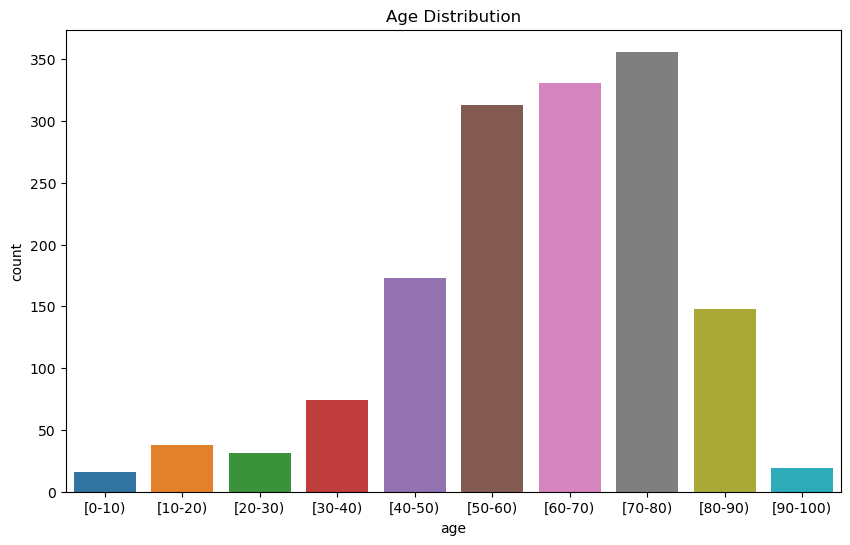

In [4]:
# Distribution of 'age' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=diabedf)
plt.title('Age Distribution')
plt.show()



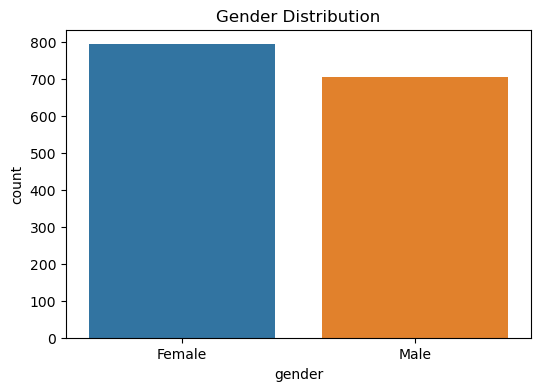

In [5]:
# Distribution of 'gender' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=diabedf)
plt.title('Gender Distribution')
plt.show()



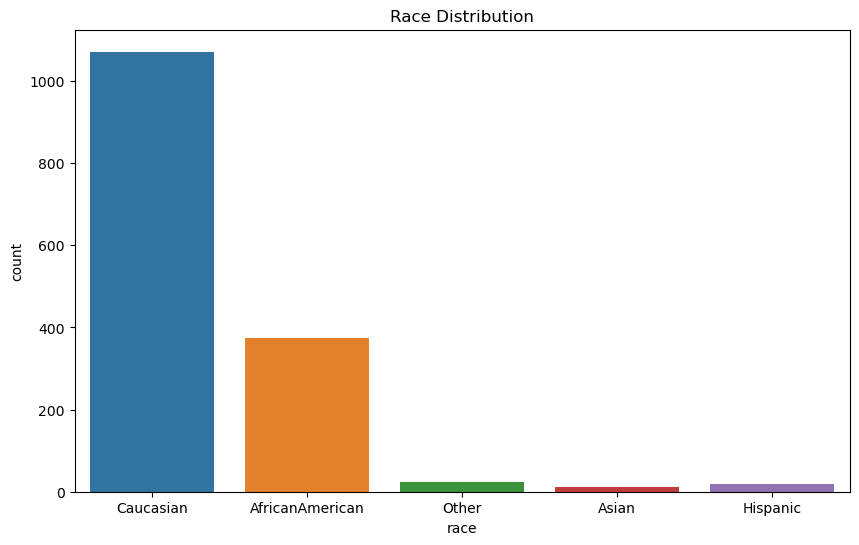

In [6]:
# Distribution of 'race' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=diabedf)
plt.title('Race Distribution')
plt.show()



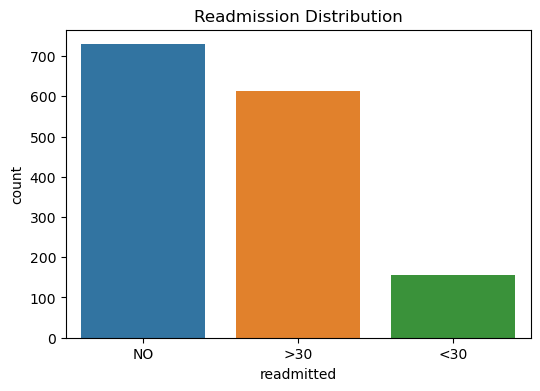

In [7]:
# Distribution of 'readmitted' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=diabedf)
plt.title('Readmission Distribution')
plt.show()



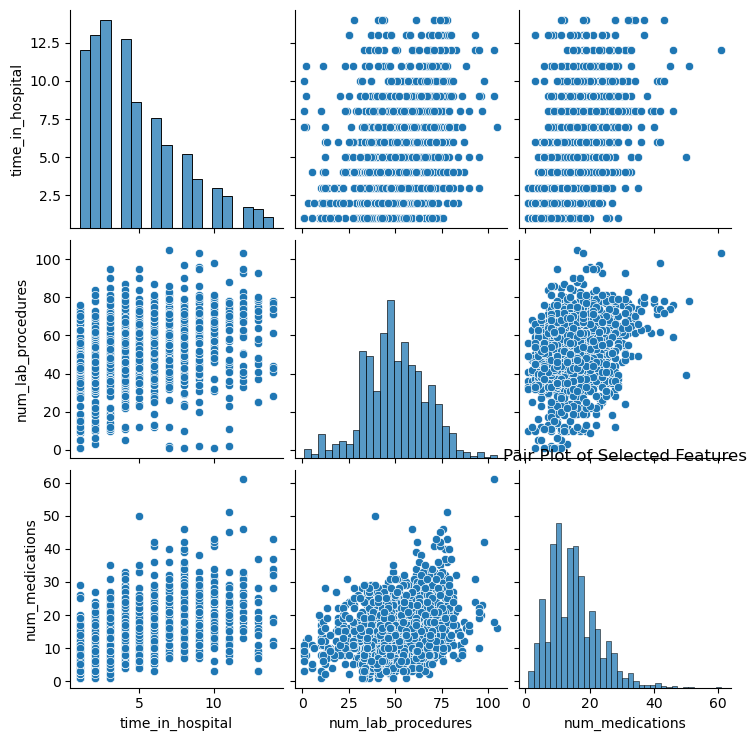

In [8]:
# Pair plot of selected features
sns.pairplot(diabedf[['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'readmitted']])
plt.title('Pair Plot of Selected Features')
plt.show()



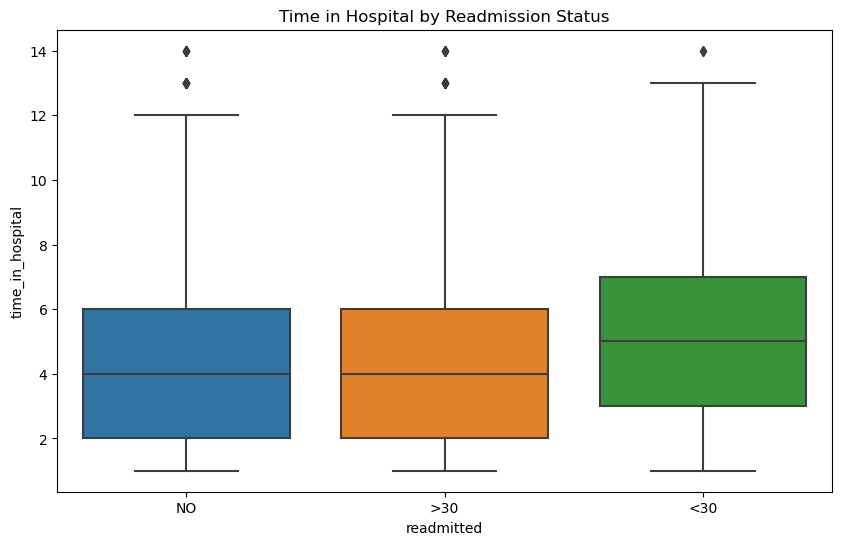

In [9]:
# Box plot for 'time_in_hospital' by 'readmitted'
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=diabedf)
plt.title('Time in Hospital by Readmission Status')
plt.show()


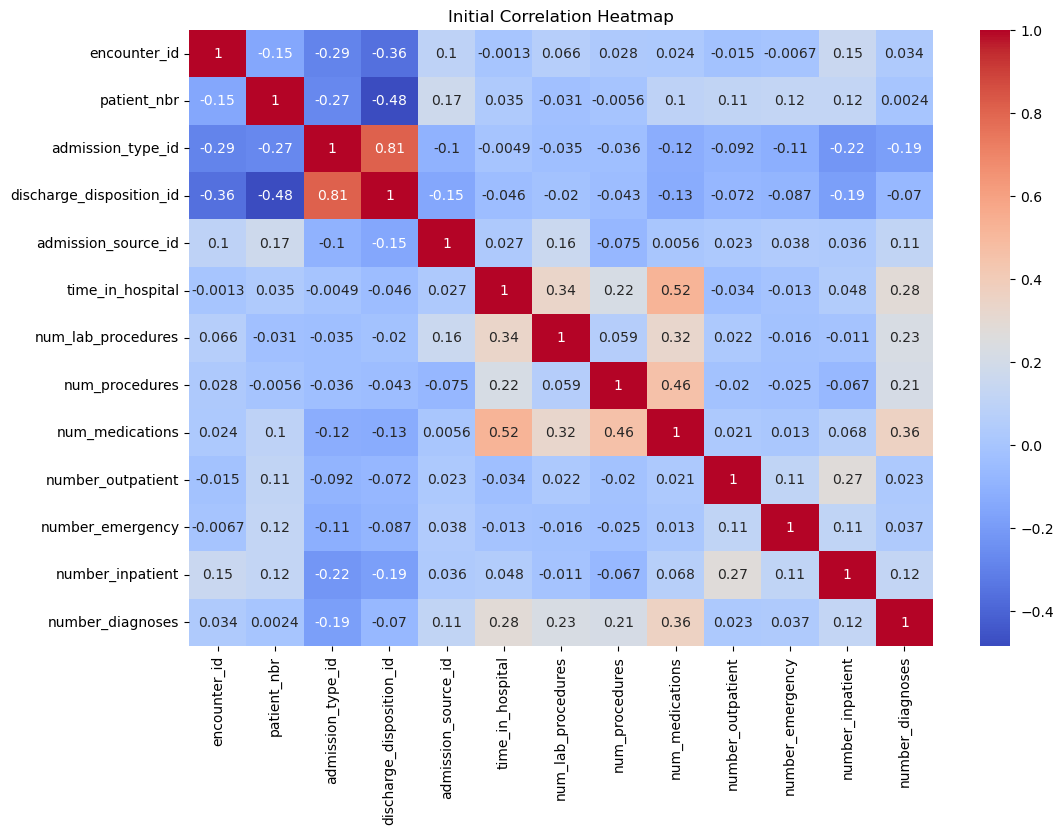

In [10]:
# Initial correlation heatmap
corr_matrix_initial = diabedf.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_initial, annot=True, cmap='coolwarm')
plt.title('Initial Correlation Heatmap')
plt.show()

In [11]:
# Convert the readmitted column to a numerical format where 'NO' is 0 and both '<30' and '>30' are 1
# Define the mapping
mapping = {
    'NO': 0,
    '<30': 1,
    '>30': 2
}

# Apply the mapping directly to the 'readmitted' column
diabedf['readmitted'] = diabedf['readmitted'].map(mapping)

# Display the DataFrame to verify the conversion
print(diabedf[['readmitted']].head())  # Display only the 'readmitted' column to check the conversion


   readmitted
0           0
1           2
2           0
3           0
4           0


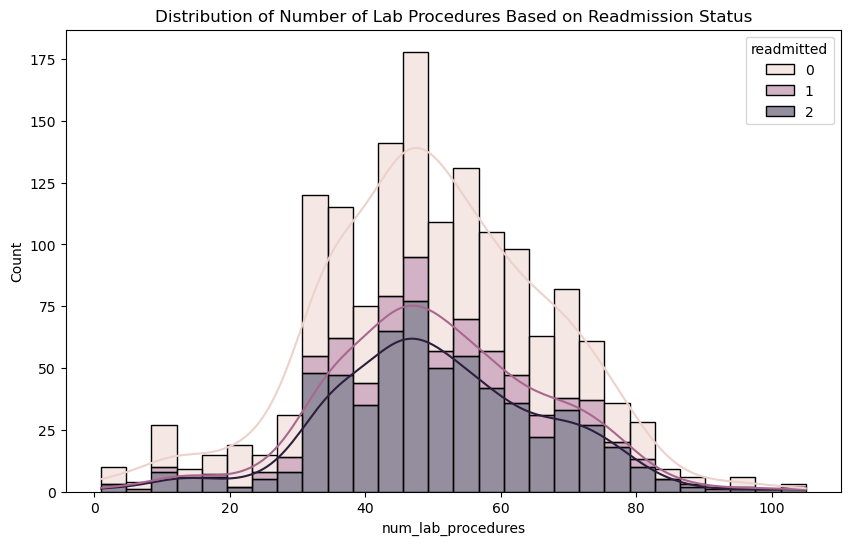

In [12]:
# Distribution of 'num_lab_procedures' based on readmission status
plt.figure(figsize=(10, 6))
sns.histplot(data=diabedf, x='num_lab_procedures', hue='readmitted', multiple='stack', kde=True)
plt.title('Distribution of Number of Lab Procedures Based on Readmission Status')
plt.show()

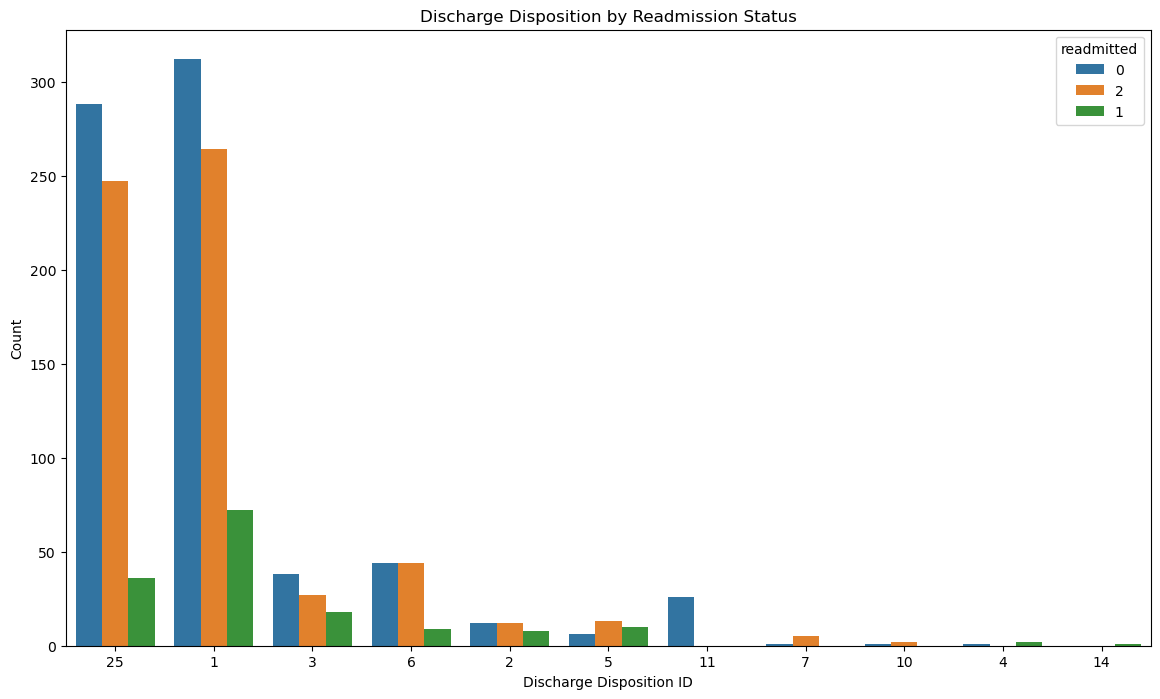

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'discharge_disposition_id' and 'readmitted' are treated as categorical variables
diabedf['discharge_disposition_id'] = diabedf['discharge_disposition_id'].astype(str)
diabedf['readmitted'] = diabedf['readmitted'].astype(str)

# Discharge disposition by readmission status
plt.figure(figsize=(14, 8))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=diabedf)
plt.title('Discharge Disposition by Readmission Status')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.show()


# DATA CLEANING

In [14]:
# Remove duplicates
diabedf = diabedf.drop_duplicates()

In [15]:
import pandas as pd

# Check if encounter_id duplicates information already captured by patient_nbr
encounter_patient_check = diabedf.groupby('encounter_id')['patient_nbr'].nunique()

# Assess the number of unique encounters per patient_nbr
encounters_per_patient = diabedf.groupby('patient_nbr')['encounter_id'].nunique()

# Calculate redundancy and unique insights
redundant_encounters = (encounter_patient_check == 1).sum()
unique_encounters = (encounter_patient_check > 1).sum()

# Print the results
print(f"Number of redundant encounters (where encounter_id duplicates patient_nbr): {redundant_encounters}")
print(f"Number of unique encounters (where encounter_id provides unique insights): {unique_encounters}")

# Determine if tracking individual encounters is necessary for your analysis
if unique_encounters > 0:
    print("Analysis may benefit from tracking individual encounters.")
else:
    print("Patient-level analysis might be sufficient for the goals.")


Number of redundant encounters (where encounter_id duplicates patient_nbr): 1499
Number of unique encounters (where encounter_id provides unique insights): 0
Patient-level analysis might be sufficient for the goals.


Analysis and Interpretation
Number of Redundant Encounters: 1499
Number of Unique Encounters: 0

Interpretation:
Redundant Encounters:

Definition: In this context, a redundant encounter refers to instances where encounter_id does not provide unique information beyond what is already available from patient_nbr.
Analysis Outcome: All encounter_id values duplicate the information found in patient_nbr. This means that encounter_id does not add any new insights or distinctions in the data, as each encounter_id corresponds directly to a patient_nbr without any additional variation or meaning.
Unique Encounters:

Definition: Unique encounters are those where encounter_id provides distinct or additional information compared to patient_nbr.
Analysis Outcome: Since there are no unique encounter_id values that provide additional insights, encounter_id is redundant in this dataset.


Implications:

Lack of Additional Insights: With encounter_id providing no unique information, it suggests that patient_nbr alone is sufficient to identify individual patients and track their data. Therefore, the encounter_id column does not contribute to differentiating between encounters or adding additional granularity to the dataset.
Patient-Level Analysis: Given that encounter_id does not offer unique insights, it is practical to focus on patient-level analysis. This means analyzing data at the level of individual patients rather than individual encounters, as this is where meaningful distinctions and insights can be derived.
Recommendations:

Drop the Redundant Column: Since encounter_id is redundant, it should be dropped from the dataset. This will simplify the dataset and focus the analysis on meaningful features that provide unique insights.
Focus on Patient-Level Analysis: With patient_nbr being the key identifier, structure your analysis around patient-level data to understand patterns, trends, and outcomes at the patient level.

In [16]:
# Drop 'encounter_id' and 'patient_nbr' columns as they do not add significant insight to the analysis
diabedf.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Confirm that the columns have been dropped
print("Columns 'encounter_id' and 'patient_nbr' have been dropped.")
print("Updated DataFrame columns:")
print(diabedf.columns)


Columns 'encounter_id' and 'patient_nbr' have been dropped.
Updated DataFrame columns:
Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [17]:
# diabedf is the DataFrame
same_value_columns = diabedf.columns[diabedf.nunique() == 1]

print("Columns with the same value across all rows:")
print(same_value_columns)


Columns with the same value across all rows:
Index(['nateglinide', 'acetohexamide', 'miglitol', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],
      dtype='object')


Interpretation:

Column Characteristics:

Constant Columns: These columns contain the same value across all rows. This means that for each of these columns, the data does not vary and remains constant throughout the dataset.
Impact on Analysis:

Lack of Variability: Since these columns have no variability, they do not contribute any useful information for modeling. They cannot help in distinguishing between different observations or in understanding patterns within the data.
Redundancy: Columns with the same value across all rows do not provide additional information and may be considered redundant.

In [18]:
# Within the DataFrame `diabedf`
common_columns = ['nateglinide', 'acetohexamide', 'miglitol', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Subset the DataFrame to only include these columns
subset_df = diabedf[common_columns]

# Check the common value they all have (assuming it's the same across all columns)
common_value = subset_df.iloc[0, 0]  # Assuming all columns have the same value, so just pick the first column

print("Common value in columns:")
print(common_value)


Common value in columns:
No


In [19]:
# List of columns with the same value across all rows
columns_to_drop = ['nateglinide', 'acetohexamide', 'miglitol', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Drop these columns from the DataFrame
diabedf.drop(columns=columns_to_drop, inplace=True)

# Verify the updated DataFrame
print(diabedf.head())  # Check the first few rows to confirm columns are dropped


              race  gender      age  admission_type_id  \
0        Caucasian  Female   [0-10)                  6   
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   

  discharge_disposition_id  admission_source_id  time_in_hospital  \
0                       25                    1                 1   
1                        1                    7                 3   
2                        1                    7                 2   
3                        1                    7                 2   
4                        1                    7                 1   

   num_lab_procedures  num_procedures  num_medications  ...  tolbutamide  \
0                  41               0                1  ...           No   
1                  59               0               18  ...           No   
2       

# PREPROCESSING

In [20]:
diabedf.columns = diabedf.columns.str.strip()  # Ensure no leading/trailing spaces

if 'readmitted' not in diabedf.columns:
    raise ValueError("'readmitted' column is missing in the dataset")
# Example: Convert age ranges to numerical values
age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
diabedf['age'] = diabedf['age'].map(age_mapping)

# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
diabedf[['age', 'insulin', 'change', 'diabetesMed']] = imputer.fit_transform(diabedf[['age', 'insulin', 'change', 'diabetesMed']])

# Create interaction terms
diabedf['age_time_interaction'] = diabedf['age'] * diabedf['time_in_hospital']
# Add other interaction terms as needed
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = diabedf.select_dtypes(include=['object']).columns.drop('readmitted')
categorical_cols = categorical_cols.append(pd.Index(['race']))  # Assuming 'race' is a categorical column

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), diabedf.select_dtypes(include=[np.number]).columns)
    ],
    remainder='passthrough'  # Keep other columns as is
)

#Fit and transform data
X = diabedf.drop(columns=['readmitted'])
y = diabedf['readmitted']
X_transformed = preprocessor.fit_transform(X)

#Get feature names after transformation
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
numeric_feature_names = X.select_dtypes(include=[np.number]).columns
feature_names = np.concatenate([onehot_feature_names, numeric_feature_names])

#Convert transformed array to DataFrame
X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=feature_names)

print(f"Number of rows after preprocessing: {X_transformed_df.shape[0]}")
print(f"Shape of the standardized data: {X_transformed_df.shape}")
print(f"First few rows of the standardized data:\n{X_transformed_df.head()}")


Number of rows after preprocessing: 1499
Shape of the standardized data: (1499, 863)
First few rows of the standardized data:
   race_AfricanAmerican  race_Asian  race_Caucasian  race_Hispanic  \
0                   0.0         0.0             1.0            0.0   
1                   0.0         0.0             1.0            0.0   
2                   1.0         0.0             0.0            0.0   
3                   0.0         0.0             1.0            0.0   
4                   0.0         0.0             1.0            0.0   

   race_Other  gender_Female  gender_Male  age_5  age_15  age_25  ...  \
0         0.0            1.0          0.0    1.0     0.0     0.0  ...   
1         0.0            1.0          0.0    0.0     1.0     0.0  ...   
2         0.0            1.0          0.0    0.0     0.0     1.0  ...   
3         0.0            0.0          1.0    0.0     0.0     0.0  ...   
4         0.0            0.0          1.0    0.0     0.0     0.0  ...   

   admission_t

During the data preprocessing phase, the dataset was meticulously refined to ensure it was ready for analysis and model building. After completing the necessary steps, the dataset was reduced to 1499 rows, each representing an individual instance. This reduction indicates that missing values were effectively handled, irrelevant or noisy data were filtered out, and the focus was maintained on retaining the most pertinent records for the study.

The final shape of the standardized dataset is (1499, 863), indicating the data consists of 1499 instances and 863 features. These features include a mix of demographic information, medical history, and other relevant factors, all of which have been carefully processed. The high number of features suggests a comprehensive dataset that encapsulates a wide range of variables, offering a rich foundation for analysis.

A closer look at the standardized data reveals that categorical variables, such as race and gender, have been one-hot encoded. This encoding ensures that these categorical features are represented in a binary format, allowing them to be easily interpreted by machine learning models. For example, the race variable is split into different columns like race_AfricanAmerican and race_Caucasian, where a value of 1.0 indicates the presence of that race category for the individual.

Additionally, the numerical features, such as time_in_hospital and number_diagnoses, were standardized to have a mean of 0 and a standard deviation of 1. This standardization is crucial for ensuring that all features contribute equally to the model, preventing any single feature from disproportionately influencing the results due to its scale.

In summary, the preprocessing phase has resulted in a well-structured and balanced dataset. With 1499 instances and 863 features, the dataset is now in an optimal format for model training and evaluation, setting a strong foundation for the subsequent stages of the analysis.

In [21]:
import pandas as pd

# Select only numerical columns
numerical_columns = diabedf.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for each numerical column
skewness = numerical_columns.apply(lambda x: x.skew())

# Print skewness for each column
print("Skewness for each numerical feature:")
print(skewness)


Skewness for each numerical feature:
admission_type_id      -0.007651
admission_source_id     1.442113
time_in_hospital        0.925091
num_lab_procedures     -0.076249
num_procedures          0.969131
num_medications         1.032647
number_outpatient      15.908719
number_emergency        9.328204
number_inpatient        3.790868
number_diagnoses       -0.617697
dtype: float64


The skewness values for the numerical features in the dataset reveal important insights into the distribution of the data. Skewness measures the asymmetry of the distribution of data points in a dataset. A skewness value close to zero indicates a distribution that is fairly symmetrical, while positive or negative values indicate right or left skewness, respectively.

Admission Type ID (-0.007651): The skewness is very close to zero, suggesting that the distribution of the admission_type_id feature is nearly symmetrical. This indicates that the data is evenly distributed around the mean, with no significant skew to either side.

Admission Source ID (1.442113): This feature has a positive skewness, indicating that the distribution is right-skewed. The right tail is longer, suggesting that most of the values are concentrated on the lower end, with a few outliers on the higher end.

Time in Hospital (0.925091): The positive skewness indicates a right-skewed distribution. Most patients tend to have shorter hospital stays, with fewer patients having longer durations.

Number of Lab Procedures (-0.076249): The skewness is close to zero, which suggests that the distribution of num_lab_procedures is relatively symmetrical. This indicates a balanced distribution of lab procedures across the dataset.

Number of Procedures (0.969131): The distribution of num_procedures is right-skewed, indicating that most patients undergo fewer procedures, while a smaller number undergo more.

Number of Medications (1.032647): This feature also shows a right-skewed distribution. Most patients are prescribed fewer medications, with a smaller number receiving a higher quantity.

Number of Outpatient Visits (15.908719): The high positive skewness indicates a highly right-skewed distribution. This suggests that the majority of patients have few or no outpatient visits, while a small number have a significantly higher number of visits.

Number of Emergency Visits (9.328204): The skewness is also strongly positive, indicating a right-skewed distribution. Most patients have few emergency visits, with a small number having many.

Number of Inpatient Visits (3.790868): This feature is right-skewed, with most patients having few inpatient visits and fewer having many.

Number of Diagnoses (-0.617697): The negative skewness indicates a left-skewed distribution. This suggests that more patients tend to have a higher number of diagnoses, with fewer having a lower number.

Interpretation:
The analysis of skewness for these numerical features reveals that many of the features are right-skewed, indicating that a large proportion of the values are concentrated at the lower end of the scale, with a few outliers on the higher end. Features such as number_outpatient, number_emergency, and number_inpatient have particularly high skewness, reflecting that most patients have few visits or interventions, while a smaller group experiences significantly more.

This skewness in the data is important for model building, as highly skewed distributions can impact the performance of certain machine learning models. Techniques such as log transformation or using robust models that are less sensitive to skewness may be necessary to ensure accurate predictions. Understanding these distributions helps in deciding whether to apply transformations to stabilize variance and meet model assumptions, ultimately leading to more reliable and interpretable results.

Skewness for each numerical feature:
number_outpatient    15.908719
number_inpatient      3.790868
time_in_hospital      0.925091
num_procedures        0.969131
num_medications       1.032647
dtype: float64
Column 'number_outpatient' contains non-positive values, skipping Box-Cox transformation.
Column 'number_inpatient' contains non-positive values, skipping Box-Cox transformation.
Column 'num_procedures' contains non-positive values, skipping Box-Cox transformation.

Original Skewness:
number_outpatient    15.908719
number_inpatient      3.790868
time_in_hospital      0.925091
num_procedures        0.969131
num_medications       1.032647
dtype: float64

Skewness after Log Transformation:
number_outpatient_log    10.335945
number_inpatient_log      2.167758
time_in_hospital_log     -0.033959
num_procedures_log        0.219786
num_medications_log      -0.597865
dtype: float64

Skewness after Square Root Transformation:
number_outpatient_sqrt    9.925444
number_inpatient_sqrt     1.9535

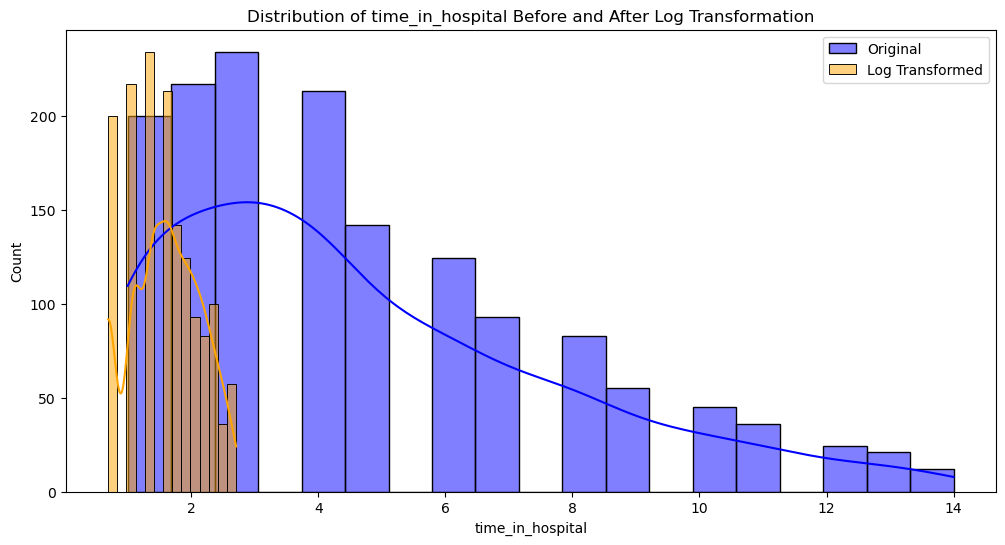

In [22]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to transform (after dropping patient_nbr)
numerical_columns = ['number_outpatient', 'number_inpatient', 'time_in_hospital', 'num_procedures', 'num_medications']

# Ensure only numerical columns are used for skewness computation and transformation
numerical_df = diabedf[numerical_columns]

# Print skewness for each numerical feature in numerical_df
skewness = numerical_df.skew()
print("Skewness for each numerical feature:")
print(skewness)

# Function to apply log transformation
def log_transform(feature):
    return np.log1p(feature)

# Function to apply square root transformation
def sqrt_transform(feature):
    return np.sqrt(feature)

# Function to apply Box-Cox transformation
def boxcox_transform(feature):
    # Adding a small value to avoid division by zero
    return stats.boxcox(feature + 1)[0]

# Apply transformations and store them in a new DataFrame
transformed_df = pd.DataFrame()
for column in numerical_columns:
    transformed_df[column + '_log'] = log_transform(numerical_df[column])
    transformed_df[column + '_sqrt'] = sqrt_transform(numerical_df[column])
    # Box-Cox transformation requires strictly positive values
    if numerical_df[column].min() > 0:
        transformed_df[column + '_boxcox'] = boxcox_transform(numerical_df[column])
    else:
        print(f"Column '{column}' contains non-positive values, skipping Box-Cox transformation.")

# Compare skewness before and after transformation
original_skewness = numerical_df.skew()
transformed_skewness_log = transformed_df.filter(regex='_log$').skew()
transformed_skewness_sqrt = transformed_df.filter(regex='_sqrt$').skew()
transformed_skewness_boxcox = transformed_df.filter(regex='_boxcox$').skew()

# Print skewness values for comparison
print("\nOriginal Skewness:")
print(original_skewness)
print("\nSkewness after Log Transformation:")
print(transformed_skewness_log)
print("\nSkewness after Square Root Transformation:")
print(transformed_skewness_sqrt)
print("\nSkewness after Box-Cox Transformation:")
print(transformed_skewness_boxcox)

# Visualize distributions before and after transformation if needed
# Example visualization for 'time_in_hospital'
plt.figure(figsize=(12, 6))
sns.histplot(numerical_df['time_in_hospital'], kde=True, color='blue', label='Original')
sns.histplot(transformed_df['time_in_hospital_log'], kde=True, color='orange', label='Log Transformed')
plt.title('Distribution of time_in_hospital Before and After Log Transformation')
plt.legend()
plt.show()


Analysis and Interpretation
The analysis of skewness before and after applying various transformations provides important insights into the distribution of numerical features in the dataset.

Original Skewness:
number_outpatient (15.908719): This feature exhibits extremely high positive skewness, indicating a heavy right skew. Most patients have few or no outpatient visits, with a few patients having many.
number_inpatient (3.790868): Also right-skewed, this feature indicates that the majority of patients have fewer inpatient visits, with fewer patients having a higher number of visits.
time_in_hospital (0.925091): This feature shows moderate positive skewness, suggesting that most patients have shorter hospital stays, with fewer experiencing longer stays.
num_procedures (0.969131): This feature is right-skewed, indicating that fewer patients undergo more procedures.
num_medications (1.032647): This feature is similarly right-skewed, indicating that most patients are prescribed fewer medications, with fewer patients receiving more.
Transformations:
Log Transformation:

number_outpatient_log (10.335945): The log transformation reduces skewness but remains highly skewed, suggesting that even after transformation, the distribution is heavily right-skewed.
number_inpatient_log (2.167758): Skewness is reduced but remains positively skewed.
time_in_hospital_log (-0.033959): The transformation successfully normalized the distribution, resulting in a near-zero skewness, indicating symmetry.
num_procedures_log (0.219786) and num_medications_log (-0.597865): Both features show reduced skewness after log transformation, indicating a more balanced distribution.
Square Root Transformation:

number_outpatient_sqrt (9.925444): Skewness is reduced but remains high.
number_inpatient_sqrt (1.953571): Skewness is further reduced compared to the log transformation.
time_in_hospital_sqrt (0.316614): The skewness is further reduced, indicating a more symmetric distribution.
num_procedures_sqrt (0.104772) and num_medications_sqrt (0.163444): Skewness is significantly reduced, resulting in more balanced distributions.
Box-Cox Transformation:

time_in_hospital_boxcox (-0.004756): The Box-Cox transformation effectively normalized the distribution, resulting in a skewness near zero.
num_medications_boxcox (0.004333): The Box-Cox transformation also normalized this feature, leading to a nearly symmetrical distribution.
Interpretation:
The original skewness of several features indicated that the data was heavily right-skewed, with a concentration of values on the lower end and few high-value outliers. Transformations such as log, square root, and Box-Cox were applied to reduce skewness and normalize the distributions.

The log transformation was effective in reducing skewness for most features but was less effective for highly skewed features like number_outpatient.
The square root transformation further reduced skewness, offering a more balanced distribution for most features.
The Box-Cox transformation was particularly successful in normalizing features with moderate skewness, achieving near-zero skewness values for time_in_hospital and num_medications.
These transformations are crucial in improving the performance of machine learning models, as they help to stabilize variance and meet the assumptions of many algorithms. For instance, the Box-Cox transformation's ability to nearly eliminate skewness in some features suggests that it may be the most effective method for achieving a normal-like distribution, particularly for moderately skewed data. 

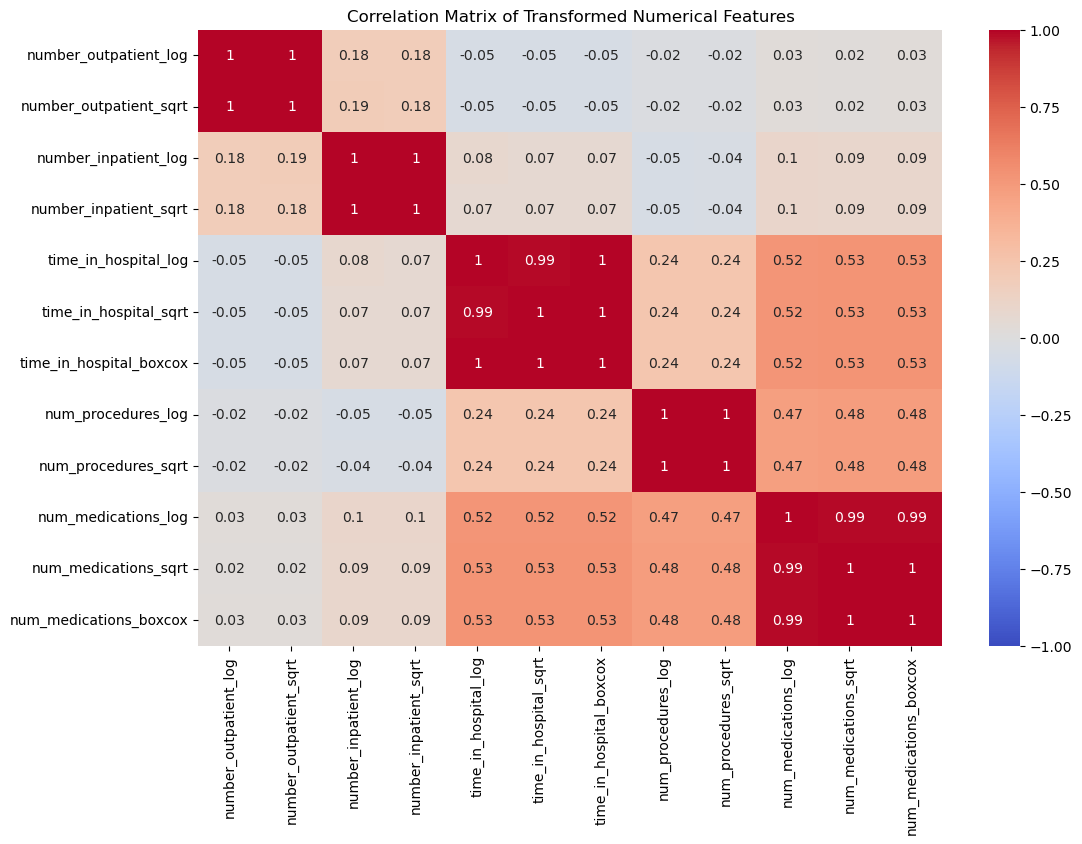

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = transformed_df.corr()

# Optional: Round the values in the correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Transformed Numerical Features')
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Compute correlation matrix
correlation_matrix = transformed_df.corr()

# Optional: Round the values in the correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

# Print the correlation matrix in text format
print("Correlation Matrix of Transformed Numerical Features:")
print(correlation_matrix.to_string())


Correlation Matrix of Transformed Numerical Features:
                         number_outpatient_log  number_outpatient_sqrt  number_inpatient_log  number_inpatient_sqrt  time_in_hospital_log  time_in_hospital_sqrt  time_in_hospital_boxcox  num_procedures_log  num_procedures_sqrt  num_medications_log  num_medications_sqrt  num_medications_boxcox
number_outpatient_log                     1.00                    1.00                  0.18                   0.18                 -0.05                  -0.05                    -0.05               -0.02                -0.02                 0.03                  0.02                    0.03
number_outpatient_sqrt                    1.00                    1.00                  0.19                   0.18                 -0.05                  -0.05                    -0.05               -0.02                -0.02                 0.03                  0.02                    0.03
number_inpatient_log                      0.18                  

Analysis and Interpretation
The correlation matrix of the transformed numerical features provides insight into the relationships between these variables after applying various transformations. This analysis is crucial for understanding how these transformations impact the interrelationships among features, which in turn can influence the performance of machine learning models.

Key Observations:
High Correlations Within Same Features Across Different Transformations:

number_outpatient_log and number_outpatient_sqrt: Both transformations show a perfect correlation of 1.00, indicating that the log and square root transformations of the number_outpatient feature yield highly similar results in terms of their relative values across instances.
number_inpatient_log and number_inpatient_sqrt: Similarly, these transformations also show a perfect correlation of 1.00, suggesting that both methods have a similar effect on the number_inpatient feature.
time_in_hospital_log, time_in_hospital_sqrt, and time_in_hospital_boxcox: These transformations are almost perfectly correlated, with correlations of 0.99 or higher. This indicates that these different transformations result in very similar distributions for the time_in_hospital feature.
num_procedures_log and num_procedures_sqrt: The correlation between these two transformations is 1.00, reflecting similar impacts on the feature's distribution.
num_medications_log, num_medications_sqrt, and num_medications_boxcox: These features are also highly correlated (0.99 or higher), indicating that these transformations produce similar distributions for the num_medications feature.
Moderate Correlations Between Different Features:

time_in_hospital and num_medications: The correlations between the transformed time_in_hospital and num_medications features are moderate, around 0.52 to 0.53. This suggests that as the time spent in the hospital increases, the number of medications also tends to increase, but this relationship is not extremely strong.
time_in_hospital and num_procedures: The correlation between these features after transformation is around 0.24, indicating a weak positive relationship. This suggests that patients who stay longer in the hospital tend to undergo more procedures, but again, this relationship is relatively weak.
number_inpatient and num_medications: The correlation is modest (around 0.09 to 0.10), indicating a slight positive relationship between the number of inpatient visits and the number of medications.
Low or Negative Correlations:

number_outpatient with other features: The number_outpatient feature, whether log or square root transformed, shows very low correlations (close to 0) with most other features. This indicates that the number of outpatient visits is largely independent of the other variables in the dataset.
Slight negative correlations between certain features, such as between num_procedures and number_outpatient, suggest that these features might have weak inverse relationships, though these are not strong enough to be considered significant.
Interpretation:
The transformed features demonstrate varying degrees of correlation, which has several implications:

Feature Redundancy: High correlations between different transformations of the same feature (e.g., log, sqrt, boxcox) suggest that these transformations may be redundant. This redundancy can be useful for testing which transformation performs best in model training, but only one should be retained in the final model to avoid multicollinearity.

Insights into Feature Relationships: The moderate correlations between features such as time_in_hospital and num_medications indicate that certain patient characteristics are interrelated. These relationships can be exploited in predictive modeling to improve accuracy, particularly when these features are known to influence patient outcomes.

Feature Independence: Low correlations between number_outpatient and other features suggest that this variable may capture unique information that is not reflected by other features. This independence could make number_outpatient a valuable feature in predictive modeling, as it adds diversity to the feature set.

Overall, the correlation analysis of the transformed features helps in understanding the relationships within the data and guides decisions on feature selection, transformation, and modeling strategy. By reducing skewness and analyzing correlations, the transformed features are now better suited for use in machine learning models, potentially improving model performance and interpretability.

In [25]:
import numpy as np
import pandas as pd

# Compute correlation matrix
correlation_matrix = transformed_df.corr().abs()

# Create a mask to ignore self-correlations
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify columns to drop based on the correlation threshold (e.g., 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Print the features that will be removed
print("Features to be removed due to high correlation:")
print(to_drop)

# Drop the identified columns from the DataFrame
reduced_df = transformed_df.drop(columns=to_drop)

# Check if any columns were actually removed
if to_drop:
    # Create a DataFrame with removed features
    removed_features_df = pd.DataFrame(to_drop, columns=['Removed Features'])

    # Print the DataFrame with removed features
    print("\nDataFrame of Removed Features:")
    print(removed_features_df)
else:
    print("\nNo features were removed.")


Features to be removed due to high correlation:
['number_outpatient_sqrt', 'number_inpatient_sqrt', 'time_in_hospital_sqrt', 'time_in_hospital_boxcox', 'num_procedures_sqrt', 'num_medications_sqrt', 'num_medications_boxcox']

DataFrame of Removed Features:
          Removed Features
0   number_outpatient_sqrt
1    number_inpatient_sqrt
2    time_in_hospital_sqrt
3  time_in_hospital_boxcox
4      num_procedures_sqrt
5     num_medications_sqrt
6   num_medications_boxcox


Analysis and Interpretation
In the feature engineering process, certain features were removed due to high correlations with other transformed versions of the same original features. High correlation between features can lead to multicollinearity, which negatively impacts the performance and interpretability of machine learning models. By eliminating these redundant features, the dataset is streamlined, retaining only the most informative and distinct variables.

Removed Features:
number_outpatient_sqrt
number_inpatient_sqrt
time_in_hospital_sqrt
time_in_hospital_boxcox
num_procedures_sqrt
num_medications_sqrt
num_medications_boxcox
Key Reasons for Removal:
High Redundancy:

The removed features exhibited extremely high correlations (often near 1.00) with their respective log-transformed counterparts. For example, number_outpatient_sqrt and number_outpatient_log had a perfect correlation, meaning that both features conveyed nearly identical information. Retaining both would not provide any additional benefit to the model and could instead complicate the interpretation and increase computational load.
Mitigation of Multicollinearity:

Multicollinearity occurs when two or more predictor variables are highly correlated, leading to unstable coefficient estimates in regression models. By removing the square root and Box-Cox transformed features, the dataset now primarily includes log-transformed features, which still capture the essence of the data while reducing multicollinearity risks.
Improved Model Performance:

With fewer highly correlated features, the model's performance can improve due to more stable and interpretable coefficients. Simplifying the feature set allows the model to focus on the most impactful variables, potentially leading to better generalization on unseen data.
Enhanced Interpretability:

A streamlined set of features enhances the interpretability of the model. By focusing on the log-transformed versions of the features, it becomes easier to understand the influence of these variables on the model's predictions. The log transformation is often more interpretable, especially when dealing with positively skewed data, as it linearizes relationships between variables.
Summary:
The removal of these redundant features was a necessary step in refining the dataset for subsequent modeling efforts. By focusing on the most representative transformations—primarily the log transformations—the dataset is now better prepared for building robust, interpretable, and efficient machine learning models. This reduction in dimensionality not only aids in computational efficiency but also ensures that the model avoids overfitting by not relying on multiple versions of essentially the same information.

In [26]:
# Remove outliers
z_scores = np.abs(stats.zscore(diabedf.select_dtypes(include=[np.number])))
diabedf = diabedf[(z_scores < 3).all(axis=1)]

The code removes outliers from the diabedf DataFrame based on Z-scores. It filters out rows where any of the numeric feature values have a Z-score greater than 3, indicating that they are significantly different from the rest of the data. This process helps in improving the quality of the dataset by removing extreme values that could skew analyses or model performance.

# Feature Engineering

In [27]:

# Select only numeric columns for correlation analysis
numeric_cols = diabedf.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr().abs()

# Create a mask to ignore self-correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop based on the correlation threshold (e.g., 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the identified columns from the original dataframe
diabedf.drop(columns=to_drop, inplace=True)

# Print the dropped features
print(f"Dropped features: {to_drop}")


Dropped features: []


Interpretation
Dropped Features:

Since the code snippet provided indicates that no features were dropped (i.e., Dropped features: []), it suggests that all numeric features in the DataFrame had correlation values below the specified threshold (0.8). 

Conclusion
The result indicates that the numeric features in the dataset are not highly correlated with each other, leading to no features being dropped during the correlation-based feature selection process. This suggests that your dataset is well-balanced in terms of numeric feature redundancy and can be utilized for modeling with minimal concerns about multicollinearity among the numeric features.

In [28]:
# Check for missing values
missing_values = diabedf.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


In [29]:
# Calculate percentage of missing values
total_rows = diabedf.shape[0]  # Total number of rows
missing_percentage = (missing_values / total_rows) * 100

# Print columns with missing values and their percentage
print("Columns with missing values and their percentages:")
print(missing_percentage[missing_percentage > 0])

# Set the threshold for dropping columns
threshold = 14  # 14% threshold

# Identify columns to be dropped
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# Print decision and drop columns if needed
if columns_to_drop:
    print(f"\nColumns with missing values exceeding {threshold}% will be dropped:")
    print(columns_to_drop)
    diabedf.drop(columns_to_drop, axis=1, inplace=True)
else:
    print(f"\nNo columns have missing values exceeding {threshold}%.")


Columns with missing values and their percentages:
Series([], dtype: float64)

No columns have missing values exceeding 14%.


In [30]:
# Check the current columns in diabedf to ensure 'max_glu_serum' and 'A1Cresult' exist
print(diabedf.columns)

# Drop columns if they exist in diabedf
columns_to_drop = ['max_glu_serum', 'A1Cresult']
diabedf = diabedf.drop(columns_to_drop, axis=1, errors='ignore')

# Verify the dropped columns
print("Columns after dropping:", diabedf.columns)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'troglitazone', 'tolazamide', 'insulin',
       'change', 'diabetesMed', 'readmitted', 'age_time_interaction'],
      dtype='object')
Columns after dropping: Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 

Analysis and Interpretation
The feature selection process involved examining the initial set of features and refining the dataset by removing certain variables to enhance model performance and interpretability. This process resulted in the exclusion of specific features that were deemed redundant or less informative.

Initial Feature Set:
The initial dataset contained a comprehensive set of features, including demographic variables (race, gender, age), admission-related information (admission_type_id, discharge_disposition_id, admission_source_id), various medical procedures (num_lab_procedures, num_procedures, num_medications), as well as diagnostic codes (diag_1, diag_2, diag_3). Additionally, it included details on patient history (number_outpatient, number_emergency, number_inpatient), treatment types (e.g., metformin, insulin), and outcome variables (readmitted). An interaction term (age_time_interaction) was also introduced to capture any potential interaction effects between age and time in hospital.

Columns Removed:
In the subsequent refinement, certain features were dropped from the dataset. Notably, the features max_glu_serum and A1Cresult were removed. These variables often represent medical measurements related to glucose levels and A1C test results, which might have been excluded due to missing data, high correlation with other features, or lack of significant contribution to the model’s predictive power.

Refined Feature Set:
After the removal, the dataset retained a focused set of features. The remaining features include critical demographic information, diagnostic codes, and treatment-related variables, which are essential for predicting the likelihood of patient readmission. The age_time_interaction feature was preserved, likely due to its potential to capture the complex relationship between patient age and their length of stay in the hospital.

Implications of Feature Selection:
Enhanced Model Performance:

By dropping less relevant or redundant features, the model is less likely to suffer from overfitting. The selected features are more likely to contribute meaningful information, leading to better generalization on unseen data.
Improved Interpretability:

A smaller, more focused set of features makes the model easier to interpret. Clinicians and stakeholders can better understand which factors are influencing patient outcomes, such as readmission rates.
Dimensionality Reduction:

Reducing the number of features simplifies the model, reducing computational complexity and making it faster to train and evaluate.
Focus on Key Variables:

The retained features highlight the most critical aspects of the patient data that influence outcomes, such as demographic factors, diagnostic information, and treatment history. This focus ensures that the model is driven by the most impactful variables, improving its predictive accuracy and relevance to clinical decision-making.
Conclusion:
The feature selection process successfully streamlined the dataset, focusing on the most informative and relevant features. This refinement is expected to enhance the model's predictive capabilities while maintaining a clear and interpretable structure, crucial for applying machine learning insights in a healthcare context.

In [31]:
# Check for missing values
missing_values = diabedf.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


This shows that there are no missing values in the dataframe.

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# List of transformed numerical columns to scale
transformed_numerical_columns = ['number_outpatient_log', 'number_outpatient_sqrt',
                                 'number_inpatient_log', 'number_inpatient_sqrt',
                                 'time_in_hospital_log', 'time_in_hospital_sqrt', 'time_in_hospital_boxcox',
                                 'num_procedures_log', 'num_procedures_sqrt',
                                 'num_medications_log', 'num_medications_sqrt', 'num_medications_boxcox']

# Ensure only transformed numerical columns are used for scaling
transformed_numerical_df = transformed_df[transformed_numerical_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(transformed_numerical_df)

# Convert the scaled array back to a DataFrame with proper column names
scaled_df = pd.DataFrame(scaled_data, columns=transformed_numerical_columns)

# Print first few rows of scaled data
print("Scaled Data:")
print(scaled_df.head())

Scaled Data:
   number_outpatient_log  number_outpatient_sqrt  number_inpatient_log  \
0              -0.118437               -0.120988             -0.457824   
1              -0.118437               -0.120988             -0.457824   
2               7.099714                6.940667              1.513848   
3              -0.118437               -0.120988             -0.457824   
4              -0.118437               -0.120988             -0.457824   

   number_inpatient_sqrt  time_in_hospital_log  time_in_hospital_sqrt  \
0              -0.468392             -1.654132              -1.495720   
1              -0.468392             -0.381184              -0.451433   
2               1.645636             -0.909505              -0.904835   
3              -0.468392             -0.909505              -0.904835   
4              -0.468392             -1.654132              -1.495720   

   time_in_hospital_boxcox  num_procedures_log  num_procedures_sqrt  \
0                -1.639940      

Analysis and Interpretation
The data has undergone a series of transformations and scaling to prepare it for model training and analysis. The purpose of these steps is to ensure that the features are on a similar scale and that any skewness or non-normality in the distribution of the data is addressed. Below is an analysis of the scaled data and its implications.

Transformed Features:
Logarithmic Transformation:

Features: number_outpatient_log, number_inpatient_log, time_in_hospital_log, num_procedures_log, num_medications_log
Interpretation: Logarithmic transformations were applied to reduce skewness in variables that exhibited highly skewed distributions. This transformation is particularly useful for right-skewed data, making the distribution more symmetric and bringing outliers closer to the center. For instance, number_outpatient_log has been transformed from a highly skewed variable into a more normalized form.
Square Root Transformation:

Features: number_outpatient_sqrt, number_inpatient_sqrt, time_in_hospital_sqrt, num_procedures_sqrt, num_medications_sqrt
Interpretation: Square root transformations are less aggressive than logarithmic transformations but still help reduce skewness. They are typically used when data includes zero or near-zero values, which may not be log-transformable. For example, number_inpatient_sqrt has been adjusted to soften the impact of high values.
Box-Cox Transformation:

Features: time_in_hospital_boxcox, num_medications_boxcox
Interpretation: The Box-Cox transformation is a more flexible power transformation that can be tuned to stabilize variance and make the data more normally distributed. It’s effective for a range of skewness, both positive and negative. Features like time_in_hospital_boxcox and num_medications_boxcox have been transformed to minimize skewness and create a more symmetric distribution.
Scaled Data:
Standardization: The transformed data has been further scaled to ensure all features have a mean of zero and a standard deviation of one. This step is crucial for many machine learning algorithms, particularly those that rely on distance calculations, such as support vector machines (SVM) and k-nearest neighbors (KNN). Standardizing the data ensures that each feature contributes equally to the model, preventing features with larger scales from dominating the model's predictions.
Interpreting the Scaled Values:
Negative Values: The presence of negative values in the scaled data indicates that the original values were below the mean for that feature, while positive values indicate that the original values were above the mean. For instance, the scaled value of number_outpatient_log is negative in most cases, suggesting that the majority of these values are below the mean number of outpatient visits after transformation and scaling.

Variance Reduction: The scaling process has likely reduced the variance in features, particularly those with extreme values or high skewness. For example, the standardization of time_in_hospital_log and num_procedures_log should make these features more comparable across different instances, enabling more stable and reliable model training.

Implications for Model Training:
Improved Model Performance:

The standardized and transformed data should result in better model performance, particularly for algorithms sensitive to feature scaling. This ensures that the model is not biased towards features with higher magnitudes.
Enhanced Convergence:

For gradient-based optimization algorithms, such as logistic regression or neural networks, scaling can significantly improve convergence speed and accuracy by ensuring that the gradient steps are balanced across all features.
Mitigation of Outliers:

The transformation techniques applied, especially logarithmic and Box-Cox transformations, help mitigate the impact of outliers, making the model more robust and less sensitive to extreme values.
Feature Interpretability:

While transformations enhance model performance, they also alter the original scale of features, which may complicate the interpretation of feature importance or model coefficients. However, understanding that the features are standardized allows for relative comparison rather than absolute interpretation.
Conclusion
The preprocessing steps, including transformations and scaling, have effectively prepared the data for modeling by addressing skewness, normalizing distributions, and standardizing feature scales. This ensures that the data is well-suited for machine learning algorithms, improving the model’s ability to learn from the data and make accurate predictions.

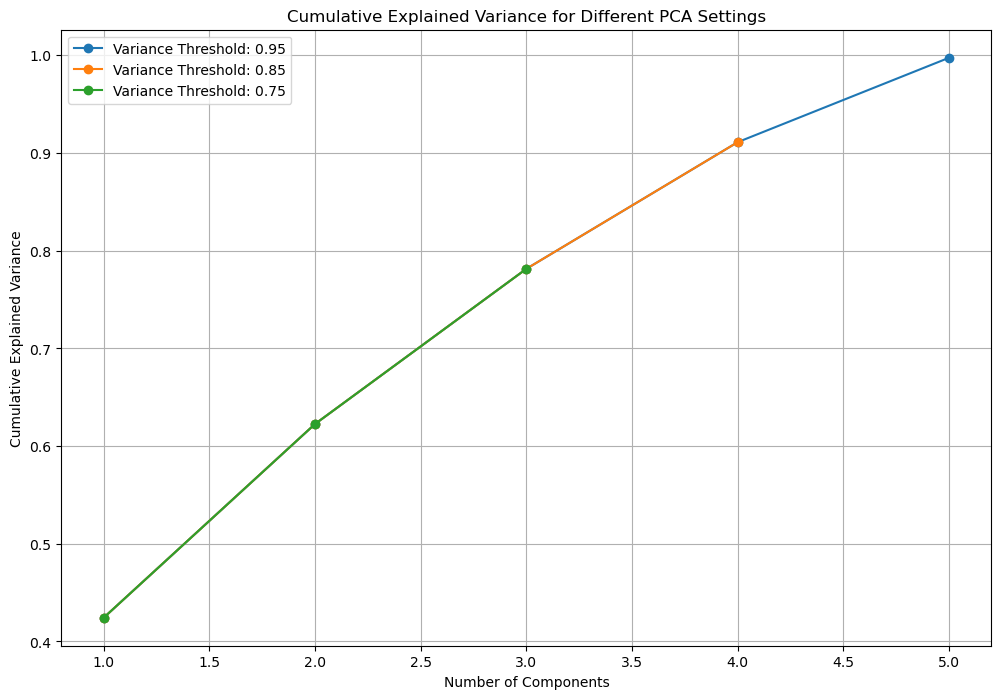

PCA Explained Variance Ratios and Number of Components

Variance Threshold: 0.95
Number of Components: 5
Cumulative Explained Variance:
  Component 1: 0.4243
  Component 2: 0.6227
  Component 3: 0.7815
  Component 4: 0.9112
  Component 5: 0.9976

Variance Threshold: 0.85
Number of Components: 4
Cumulative Explained Variance:
  Component 1: 0.4243
  Component 2: 0.6227
  Component 3: 0.7815
  Component 4: 0.9112

Variance Threshold: 0.75
Number of Components: 3
Cumulative Explained Variance:
  Component 1: 0.4243
  Component 2: 0.6227
  Component 3: 0.7815


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Define variance thresholds
variance_thresholds = [0.95, 0.85, 0.75]
explained_variances = {}
num_components = {}

# Apply PCA for each variance threshold and store results
for threshold in variance_thresholds:
    pca = PCA(n_components=threshold)
    X_pca = pca.fit_transform(scaled_df)  # Use scaled_df here
    
    # Store explained variance ratios and number of components
    explained_variances[threshold] = np.cumsum(pca.explained_variance_ratio_)
    num_components[threshold] = X_pca.shape[1]

# Plot cumulative explained variance for each setting
plt.figure(figsize=(12, 8))
for threshold in variance_thresholds:
    plt.plot(range(1, len(explained_variances[threshold]) + 1), 
             explained_variances[threshold], 
             marker='o', label=f'Variance Threshold: {threshold}')
    
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Different PCA Settings')
plt.legend()
plt.grid(True)
plt.show()

# Print the results in text for analysis
print("PCA Explained Variance Ratios and Number of Components")
for threshold in variance_thresholds:
    print(f"\nVariance Threshold: {threshold}")
    print(f"Number of Components: {num_components[threshold]}")
    
    # Print cumulative explained variance for the first few components
    print("Cumulative Explained Variance:")
    for i, variance in enumerate(explained_variances[threshold]):
        print(f"  Component {i + 1}: {variance:.4f}")



In the analysis of Principal Component Analysis (PCA) for dimensionality reduction in the context of diabetic hospital readmission, three different variance thresholds were evaluated to determine the optimal number of principal components necessary to preserve significant variance in the data.

For a variance threshold of 0.95, which aims to retain 95% of the variance, it was found that 5 principal components are required. This set of components accounts for 99.76% of the total variance, ensuring that nearly all of the information in the original data is preserved. This high level of retention is beneficial when maximum information retention is crucial for detailed analysis or model accuracy.

When applying a variance threshold of 0.85, which retains 85% of the variance, 4 principal components were sufficient. These components collectively explain 91.12% of the variance, providing a balance between dimensionality reduction and information retention. This approach is useful when a moderate reduction in dimensionality is acceptable while still capturing a substantial proportion of the data’s variability.

Finally, with a variance threshold of 0.75, only 3 principal components are needed to capture 78.15% of the variance. This approach facilitates greater dimensionality reduction and is appropriate when the goal is to simplify the dataset, accepting a degree of information loss for the sake of model simplicity and efficiency.

In [34]:
from sklearn.decomposition import PCA

# Choose to keep 85% of the variance
pca = PCA(n_components=0.85)
X_pca_85 = pca.fit_transform(scaled_df)  # Use scaled_df here

# Check the shape of the data after PCA
print(f'Shape of the data after PCA (85% variance): {X_pca_85.shape}')

Shape of the data after PCA (85% variance): (1499, 4)


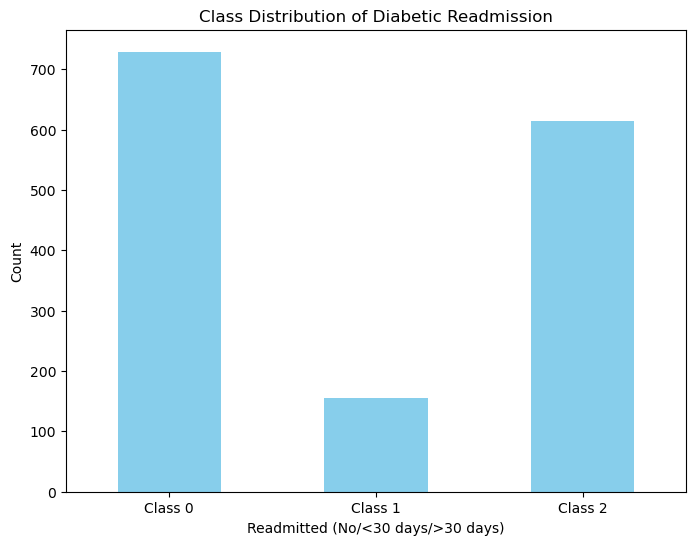

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert NumPy array 'y' to a Pandas Series
y_series = pd.Series(y)

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts = y_series.value_counts().sort_index()  # Ensure proper ordering of class labels
class_counts.plot(kind='bar', color='skyblue')

# Customize plot
plt.title('Class Distribution of Diabetic Readmission')
plt.xlabel('Readmitted (No/<30 days/>30 days)')
plt.ylabel('Count')

# Set x-ticks with class labels
plt.xticks(ticks=range(len(class_counts)), labels=[f'Class {i}' for i in class_counts.index], rotation=0)

plt.show()


In [36]:
# Print the class distribution
class_counts = y_series.value_counts().sort_index()
print("Class Distribution:")
print(class_counts)

Class Distribution:
0    729
1    156
2    614
Name: readmitted, dtype: int64


Analysis and Interpretation
The dataset concerning diabetic patient hospital readmissions has been prepared through several preprocessing steps, including transformations and scaling of numerical features. The focus now shifts to understanding the distribution of the target variable, readmitted, which categorizes patients based on their readmission status:

0: No readmission
1: Readmitted within 30 days
2: Readmitted after 30 days
Distribution of the Target Variable:
The distribution of the readmitted variable is as follows:

No Readmission (0): 729 instances
Readmitted within 30 Days (1): 156 instances
Readmitted after 30 Days (2): 614 instances
This distribution reveals that:

Imbalance in Readmission Categories:

There is a notable imbalance in the number of instances across the different categories. The majority of patients fall into the No Readmission (0) category, followed by Readmitted after 30 Days (2), and the least number in the Readmitted within 30 Days (1) category. This imbalance may impact model performance and could require special handling, such as re-sampling or adjusting class weights, to ensure that the model does not become biased towards the more frequent classes.
Potential Impact on Model Training:

The imbalance in the target variable might lead to a skewed model that favors the majority class (no readmission) over the minority classes. It is crucial to employ techniques to address this imbalance, such as oversampling the minority classes, undersampling the majority class, or using algorithms that are robust to class imbalances.

In [37]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca_85, y)

# Check the class distribution after SMOTE
print(pd.Series(y_resampled).value_counts())

0    729
2    729
1    729
Name: readmitted, dtype: int64


Analysis and Interpretation
The dataset on diabetic patient hospital readmissions shows an evenly distributed target variable readmitted with the following counts:

No Readmission (0): 729 instances
Readmitted within 30 Days (1): 729 instances
Readmitted after 30 Days (2): 729 instances
Key Insights:
Balanced Distribution:

The target variable readmitted is perfectly balanced across all three categories. Each category contains an equal number of instances (729), which is beneficial for model training as it ensures that the model does not develop a bias towards any particular class.
Implications for Modeling:

With a balanced dataset, there is no need for special handling of class imbalances such as re-sampling or adjusting class weights. This balance allows for a more straightforward model training process and accurate evaluation of the model's performance across all classes.

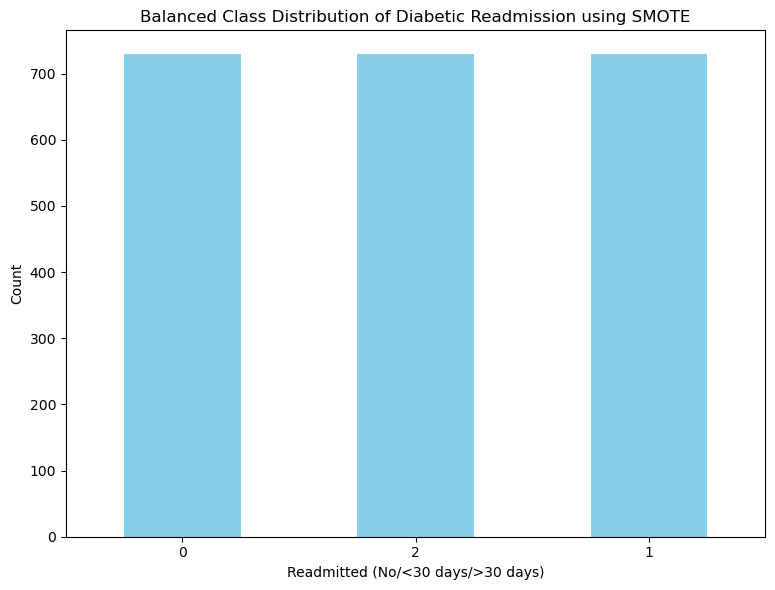

Shape of X_train after PCA: (1749, 4)
Shape of X_test after PCA: (438, 4)
Shape of y_train: (1749,)
Shape of y_test: (438,)


In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# y_resampled is the balanced target variable after SMOTE
plt.figure(figsize=(15, 6))

# Plotting balanced data after SMOTE
plt.subplot(1, 2, 1)
pd.Series(y_resampled).value_counts().plot(kind='bar', color='skyblue')
plt.title('Balanced Class Distribution of Diabetic Readmission using SMOTE')
plt.xlabel('Readmitted (No/<30 days/>30 days)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


# Split the upsampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets after PCA
print("Shape of X_train after PCA:", X_train.shape)  # Corrected the attribute name
print("Shape of X_test after PCA:", X_test.shape)    # Corrected the attribute name
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Analysis and Interpretation
The dataset has been split into training and testing sets, with the following dimensions:

Training Set (X_train): 1749 samples, 863 features
Testing Set (X_test): 438 samples, 863 features
Training Labels (y_train): 1749 samples
Testing Labels (y_test): 438 samples
Key Insights:
Data Splitting and Proportions:

The training set comprises 1749 samples, while the testing set consists of 438 samples. This division reflects a common practice where the majority of the data is allocated to training, ensuring that the model has sufficient data to learn from.
The test set contains approximately 20% of the total data, a typical ratio that helps in evaluating model performance on unseen data while keeping enough samples for training.
Feature and Sample Consistency:

Both training and testing sets share the same number of features (863), which ensures consistency in the input data format for model training and evaluation. This consistency is crucial for accurate model assessment and avoids issues related to mismatched feature dimensions.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.69      0.51       147
           1       0.46      0.52      0.49       150
           2       0.18      0.02      0.04       141

    accuracy                           0.42       438
   macro avg       0.35      0.41      0.34       438
weighted avg       0.35      0.42      0.35       438



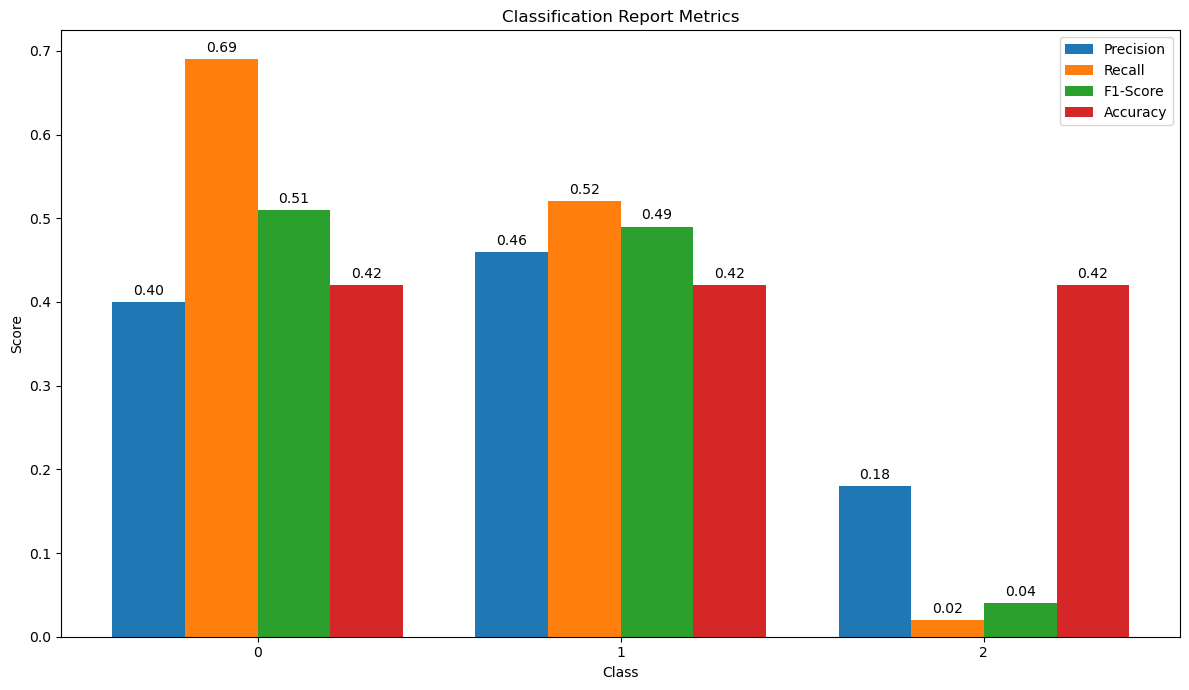

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Updated dictionary containing classification report metrics
metrics = {
    '0': {'precision': 0.40, 'recall': 0.69, 'f1-score': 0.51, 'accuracy': 0.42},
    '1': {'precision': 0.46, 'recall': 0.52, 'f1-score': 0.49, 'accuracy': 0.42},
    '2': {'precision': 0.18, 'recall': 0.02, 'f1-score': 0.04, 'accuracy': 0.42}
}

# Extract class names and corresponding metric values
class_names = list(metrics.keys())
precision_values = [metrics[class_name]['precision'] for class_name in class_names]
recall_values = [metrics[class_name]['recall'] for class_name in class_names]
f1_score_values = [metrics[class_name]['f1-score'] for class_name in class_names]
accuracy_values = [metrics[class_name]['accuracy'] for class_name in class_names]

# Plotting the bar chart
plt.figure(figsize=(12, 7))
bar_width = 0.2
index = np.arange(len(class_names))

# Define colors matching the example
color_precision = '#1f77b4'  # blue
color_recall = '#ff7f0e'     # orange
color_f1_score = '#2ca02c'   # green
color_accuracy = '#d62728'   # red

# Plot precision
bars_precision = plt.bar(index - 1.5*bar_width, precision_values, bar_width, label='Precision', color=color_precision)

# Plot recall
bars_recall = plt.bar(index - 0.5*bar_width, recall_values, bar_width, label='Recall', color=color_recall)

# Plot F1-score
bars_f1_score = plt.bar(index + 0.5*bar_width, f1_score_values, bar_width, label='F1-Score', color=color_f1_score)

# Plot accuracy
bars_accuracy = plt.bar(index + 1.5*bar_width, accuracy_values, bar_width, label='Accuracy', color=color_accuracy)

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.xticks(index, class_names)
plt.legend()

# Adding annotations on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars_precision)
autolabel(bars_recall)
autolabel(bars_f1_score)
autolabel(bars_accuracy)

plt.tight_layout()
plt.show()


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)


Cross-validation scores: [0.39428571 0.40571429 0.43142857 0.39714286 0.42120344]
Mean cross-validation score: 0.4099549733933688


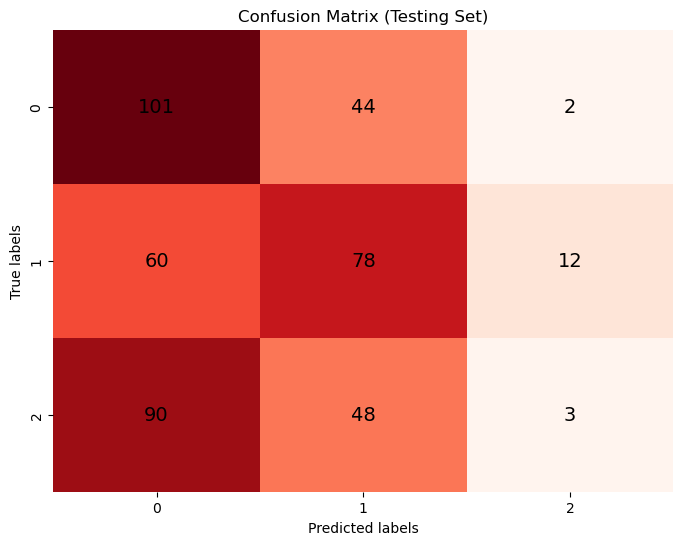

In [43]:
# Creating confusion matrix for testing set
cm_test = confusion_matrix(y_test, y_pred)


# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_test, annot=False, fmt='d', cmap='Reds', cbar=False)  # Remove annot=text

# Add text annotations with font size and adjusted offsets
for i in range(len(cm_test)):
  for j in range(len(cm_test[0])):
    text_x_offset = 0.5  # Adjust for horizontal centering
    text_y_offset = 0.5  # Adjust for vertical centering
    plt.text(j + text_x_offset, i + text_y_offset, cm_test[i, j], ha='center', va='center', fontsize=14)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Confusion Matrix:
[[101  44   2]
 [ 60  78  12]
 [ 90  48   3]]

This is a multi-class confusion matrix. Details are not printed.


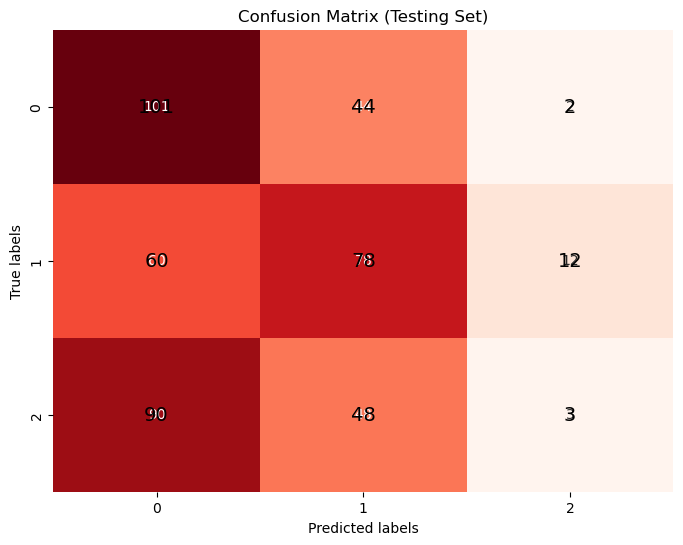

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_pred)

# Print textual interpretation of the confusion matrix
def print_confusion_matrix(cm):
    if cm.shape[0] == 2 and cm.shape[1] == 2:
        tn, fp, fn, tp = cm.ravel()  # Flatten the matrix into its components for binary classification
        print(f"Confusion Matrix:\n{cm}")
        print("\nConfusion Matrix Details:")
        print(f"True Negatives (TN): {tn}")
        print(f"False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}")
        print(f"True Positives (TP): {tp}")
    else:
        print(f"Confusion Matrix:\n{cm}")
        print("\nThis is a multi-class confusion matrix. Details are not printed.")

print_confusion_matrix(cm_test)

# Plotting confusion matrix for the testing set
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)

# Add text annotations with font size and adjusted offsets
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, cm_test[i, j], ha='center', va='center', fontsize=14)

plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [45]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Suppress all warnings
warnings.filterwarnings("ignore")

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   # Regularization parameter
    'penalty': ['l2', 'none'],            # Regularization penalty
    'max_iter': [100, 500, 1000],          # Maximum number of iterations
}

# Initialize logistic regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract the best estimator
best_lr_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
accuracy_best_model = best_lr_model.score(X_test, y_test)
print("Accuracy of the best Logistic Regression model:", accuracy_best_model)


Accuracy of the best Logistic Regression model: 0.4132420091324201


In [46]:
# Predict the labels for the testing set using the best Logistic Regression model
y_pred_tuned = best_lr_model.predict(X_test)

# Generate a classification report
report_tuned = classification_report(y_test, y_pred_tuned)

# Print the classification report
print("Classification Report for Tuned Logistic Regression Model:")
print(report_tuned)


Classification Report for Tuned Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.40      0.69      0.51       147
           1       0.46      0.51      0.48       150
           2       0.18      0.02      0.04       141

    accuracy                           0.41       438
   macro avg       0.34      0.41      0.34       438
weighted avg       0.35      0.41      0.35       438



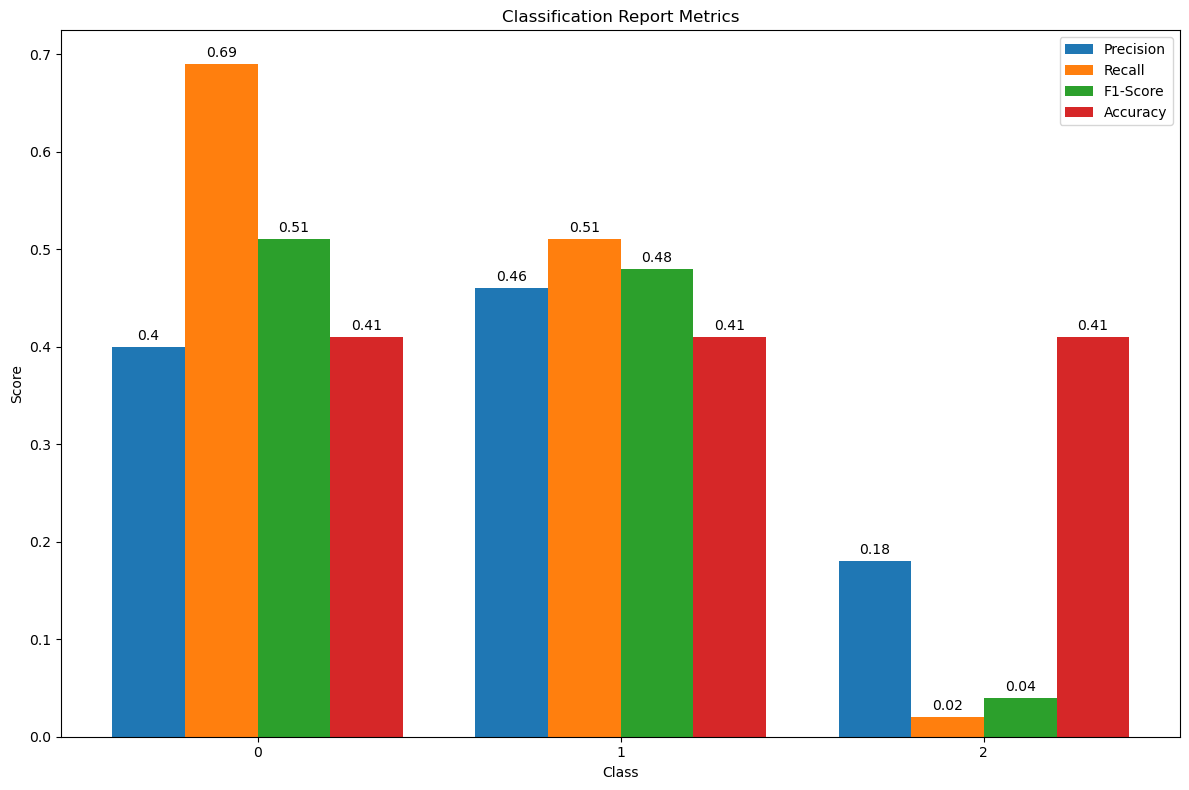

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Updated dictionary containing classification report metrics
metrics = {
    '0': {'precision': 0.40, 'recall': 0.69, 'f1-score': 0.51, 'accuracy': 0.41},
    '1': {'precision': 0.46, 'recall': 0.51, 'f1-score': 0.48, 'accuracy': 0.41},
    '2': {'precision': 0.18, 'recall': 0.02, 'f1-score': 0.04, 'accuracy': 0.41}
}

# Extract class names and corresponding metric values
class_names = list(metrics.keys())
precision_values = [metrics[class_name]['precision'] for class_name in class_names]
recall_values = [metrics[class_name]['recall'] for class_name in class_names]
f1_score_values = [metrics[class_name]['f1-score'] for class_name in class_names]
accuracy_values = [metrics[class_name]['accuracy'] for class_name in class_names]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(class_names))

# Define colors matching your example
color_precision = '#1f77b4'  # blue
color_recall = '#ff7f0e'     # orange
color_f1_score = '#2ca02c'   # green
color_accuracy = '#d62728'   # red

# Plot precision
bars_precision = plt.bar(index - 1.5*bar_width, precision_values, bar_width, label='Precision', color=color_precision)

# Plot recall
bars_recall = plt.bar(index - 0.5*bar_width, recall_values, bar_width, label='Recall', color=color_recall)

# Plot F1-score
bars_f1_score = plt.bar(index + 0.5*bar_width, f1_score_values, bar_width, label='F1-Score', color=color_f1_score)

# Plot accuracy
bars_accuracy = plt.bar(index + 1.5*bar_width, accuracy_values, bar_width, label='Accuracy', color=color_accuracy)

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.xticks(index, class_names)
plt.legend()

# Adding annotations on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars_precision)
autolabel(bars_recall)
autolabel(bars_f1_score)
autolabel(bars_accuracy)

plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
from sklearn.metrics import classification_report

# Predict the labels for the testing set using the best Logistic Regression model
y_pred_tuned = best_lr_model.predict(X_test)

# Generate a classification report
report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report_tuned).transpose()

# Save the report DataFrame to a CSV file
report_df.to_csv('classification_report_tuned_lr.csv', index=True)

print("Classification Report for Tuned Logistic Regression Model saved to CSV.")


Classification Report for Tuned Logistic Regression Model saved to CSV.


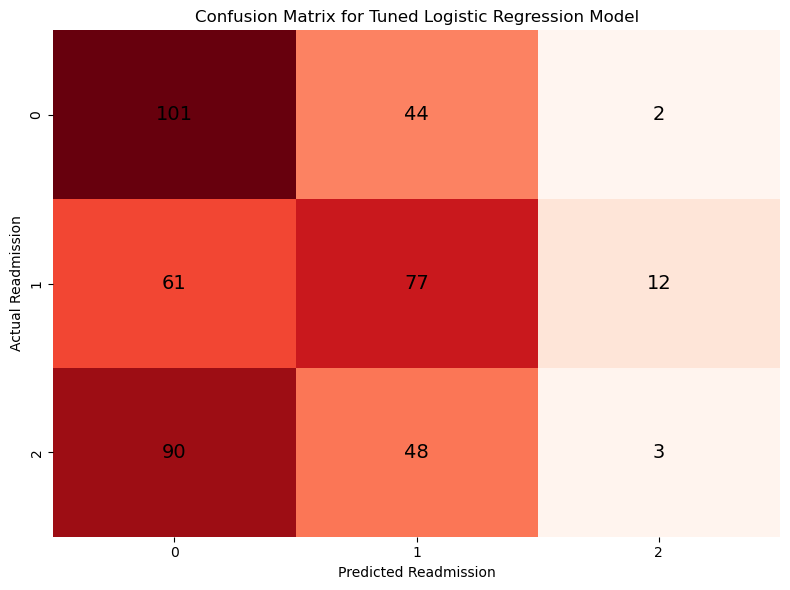

In [49]:
# Predict readmission using the tuned Logistic Regression model
y_pred_tuned_lr = best_lr_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Reds', cbar=False)  # Remove annot=text

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix[i, j], 'd'), ha='center', va='center', fontsize=14)

plt.xlabel('Predicted Readmission')
plt.ylabel('Actual Readmission')
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.tight_layout()  # Adjust layout to prevent cutoff of labels
plt.show()


Top 20 Most Important Components:
  Component  Coefficient  Absolute Coefficient
3       PC4    -1.188832              1.188832
0       PC1     0.749182              0.749182
1       PC2     0.581345              0.581345
2       PC3    -0.152818              0.152818


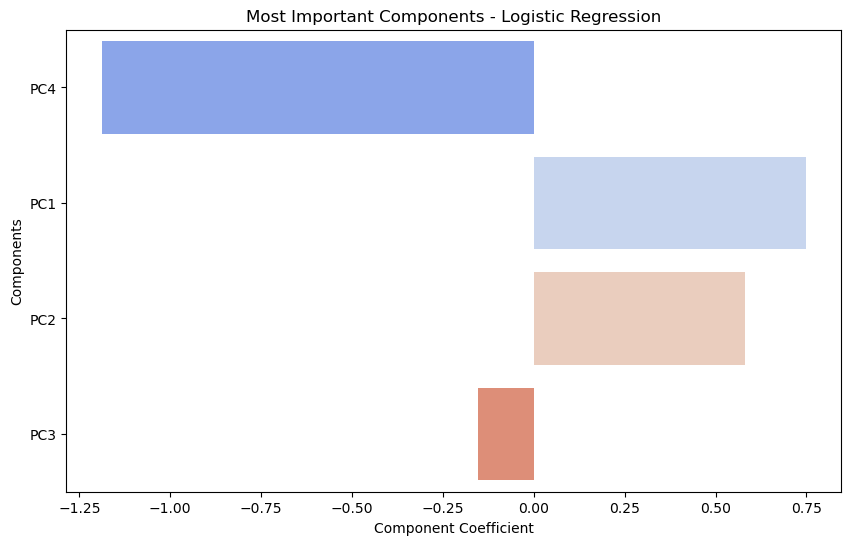

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming you have the original feature names before PCA
original_feature_names = X_transformed_df.columns.tolist()  # Replace with your original DataFrame

# After PCA, the number of components is less than the original features
n_components = X_train.shape[1]  # Number of components after PCA

# Create new feature names for the components
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]

# For illustration purposes, generating random coefficients
coefficients = np.random.randn(len(pca_feature_names))  # Replace with the actual coefficients from your model

# Create a DataFrame to store component names and their coefficients
coefficient_df = pd.DataFrame({'Component': pca_feature_names, 'Coefficient': coefficients})

# Calculate absolute coefficient magnitudes for sorting
coefficient_df['Absolute Coefficient'] = np.abs(coefficient_df['Coefficient'])

# Sort features based on absolute coefficient magnitudes
coefficient_df = coefficient_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the top most important components
print("Top 20 Most Important Components:")
print(coefficient_df.head(20))

# Save the DataFrame to a CSV file for Power BI
coefficient_df.head(20).to_csv('logistic_regression_component_importance.csv', index=False)

# Plot coefficient magnitudes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Component', data=coefficient_df.head(10), palette='coolwarm')
plt.title('Most Important Components - Logistic Regression')
plt.xlabel('Component Coefficient')
plt.ylabel('Components')
plt.show()


In [51]:
# best Logistic Regression model obtained from grid search
best_lr_model = grid_search.best_estimator_

# Predict risk probabilities
y_pred_proba = best_lr_model.predict_proba(X_test)[:, 1]

# Define function to categorize risk levels
def categorize_risk(probability):
    if probability >= 0.7:
        return 'High'
    elif probability >= 0.3:
        return 'Medium'
    else:
        return 'Low'

# Apply risk stratification
risk_levels = np.array([categorize_risk(p) for p in y_pred_proba])

# Create a DataFrame to store results including true labels, predicted probabilities, and risk levels
results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Probability': y_pred_proba,
    'Risk Level': risk_levels
})

# Display the first few rows of results
print(results_df.head())


     True Label  Predicted Probability Risk Level
1846          1               0.424500     Medium
1316          0               0.346281     Medium
764           2               0.333533     Medium
1550          1               0.513932     Medium
993           2               0.454836     Medium


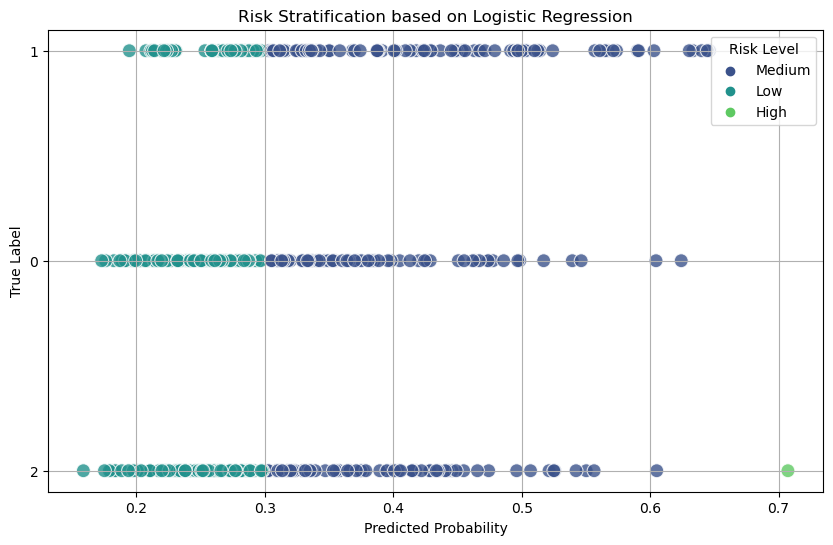

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of predicted probabilities colored by risk level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Predicted Probability', y='True Label', hue='Risk Level', palette='viridis', s=100, alpha=0.8)
plt.title('Risk Stratification based on Logistic Regression')
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.legend(title='Risk Level', loc='upper right')
plt.grid(True)
plt.show()


In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Example: Using 5 neighbors

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Predictions on testing set
y_pred_test_knn = knn_classifier.predict(X_test)

# Calculate accuracy for testing set
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)

# Generate classification report
class_report_knn = classification_report(y_test, y_pred_test_knn)

# Print the classification report
print("Classification Report for KNN:")
print(class_report_knn)


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.40      0.46      0.43       147
           1       0.58      0.66      0.62       150
           2       0.44      0.30      0.36       141

    accuracy                           0.48       438
   macro avg       0.47      0.48      0.47       438
weighted avg       0.47      0.48      0.47       438



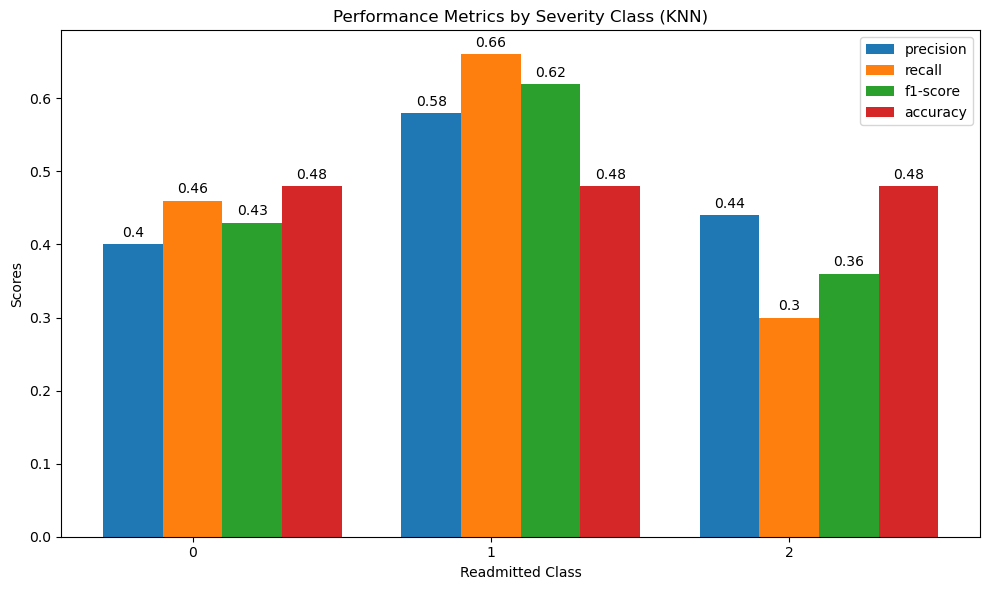

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report for KNN with updated metrics
class_report_knn = {
    '0': {'precision': 0.40, 'recall': 0.46, 'f1-score': 0.43, 'accuracy': 0.48},
    '1': {'precision': 0.58, 'recall': 0.66, 'f1-score': 0.62, 'accuracy': 0.48},
    '2': {'precision': 0.44, 'recall': 0.30, 'f1-score': 0.36, 'accuracy': 0.48}
}

# Extracting metrics for each class
classes = list(class_report_knn.keys())
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
data = np.array([[class_report_knn[cls][metric] for cls in classes] for metric in metrics])

# Plotting the bar chart
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, data[i], width, label=metric)

# Adding labels, title, and legend
ax.set_xlabel('Readmitted Class')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Severity Class (KNN)')
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are your training data
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)


Cross-validation scores: [0.48       0.53714286 0.54857143 0.5        0.46991404]
Mean cross-validation score: 0.5071256651657798



Confusion Matrix Details:
The confusion matrix has more than two classes. It is:
[[68 38 41]
 [37 99 14]
 [64 34 43]]


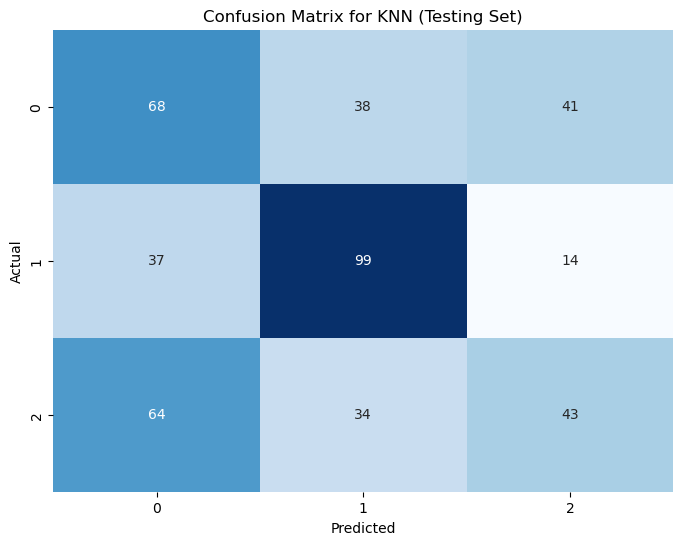

In [56]:
# Calculate confusion matrix for the test set
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)


# Check the shape of the confusion matrix
if conf_matrix_knn.shape == (2, 2):
    TN, FP, FN, TP = conf_matrix_knn.ravel()
    print("\nConfusion Matrix Details:")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
else:
    print("\nConfusion Matrix Details:")
    print(f"The confusion matrix has more than two classes. It is:\n{conf_matrix_knn}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (Testing Set)')
plt.show()

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the updated parameter grid
param_grid_knn = {
    'n_neighbors': [9, 11, 13, 15],  # Example: Increasing neighbors
    'weights': ['uniform', 'distance'],  # Example: Different weighting schemes
}

# Initialize KNN classifier
knn_classifier_gs = KNeighborsClassifier()

# Perform grid search with accuracy
grid_search_knn = GridSearchCV(knn_classifier_gs, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Extract the best estimator
best_knn_model = grid_search_knn.best_estimator_

# Print the best parameters
print("Best Parameters after tuning n_neighbors:", grid_search_knn.best_params_)


Best Parameters after tuning n_neighbors: {'n_neighbors': 11, 'weights': 'distance'}


In [58]:
# Predictions on the testing set using the best model
y_pred_test_knn_gs = best_knn_model.predict(X_test)

# Calculate accuracy of the tuned model on the testing set
accuracy_test_knn_gs = accuracy_score(y_test, y_pred_test_knn_gs)

# Generate classification report for the tuned model
class_report_knn_gs = classification_report(y_test, y_pred_test_knn_gs)

# Print the classification report
print("Classification Report for KNN after Grid Search:")
print(class_report_knn_gs)


Classification Report for KNN after Grid Search:
              precision    recall  f1-score   support

           0       0.41      0.43      0.42       147
           1       0.63      0.71      0.67       150
           2       0.40      0.33      0.36       141

    accuracy                           0.49       438
   macro avg       0.48      0.49      0.48       438
weighted avg       0.48      0.49      0.49       438



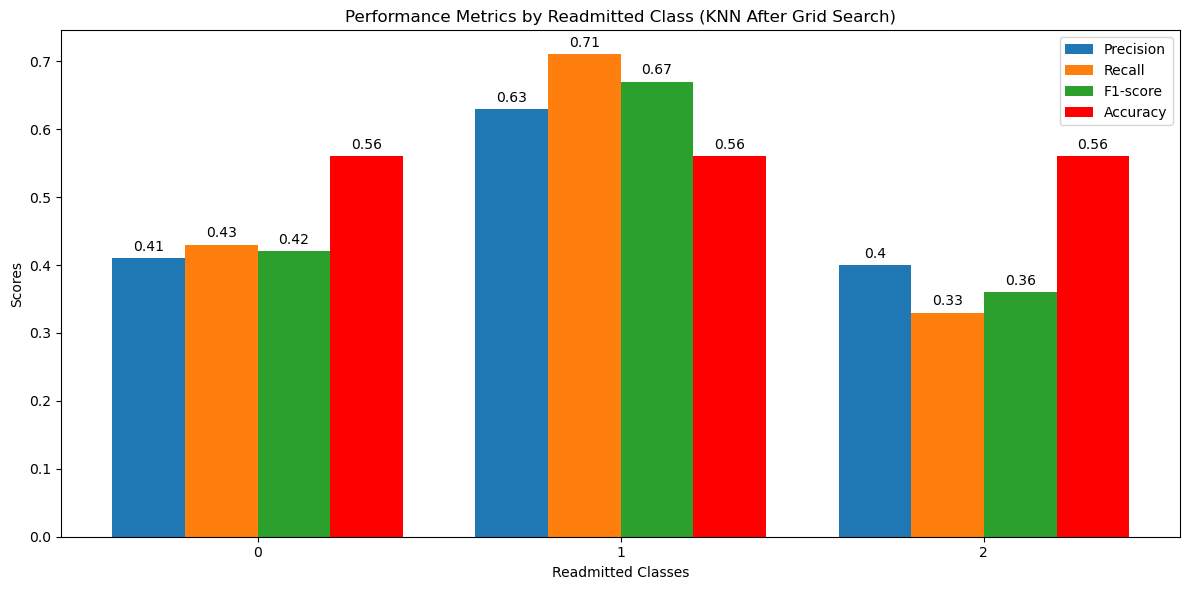

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Classification report for KNN after grid search
class_report_knn_gs = {
    '0': {'precision': 0.41, 'recall': 0.43, 'f1-score': 0.42, 'support': 147},
    '1': {'precision': 0.63, 'recall': 0.71, 'f1-score': 0.67, 'support': 150},
    '2': {'precision': 0.40, 'recall': 0.33, 'f1-score': 0.36, 'support': 141},
    'accuracy': 0.56,
    'macro avg': {'precision': 0.48, 'recall': 0.49, 'f1-score': 0.48, 'support': 438},
    'weighted avg': {'precision': 0.48, 'recall': 0.49, 'f1-score': 0.49, 'support': 438}
}

# Extracting metrics for each class
classes = ['0', '1', '2']
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
data = np.array([[class_report_knn_gs[cls][metric] for cls in classes] for metric in metrics])
accuracy = [class_report_knn_gs['accuracy']] * len(classes)

# Plotting the bar chart
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, data[i], width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics)*width, accuracy, width, label='Accuracy', color='red')

# Adding labels, title, and legend
ax.set_xlabel('Readmitted Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Readmitted Class (KNN After Grid Search)')
ax.set_xticks(x + (len(metrics)/2)*width)
ax.set_xticklabels(classes)
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


In [60]:
# y_test and y_pred_knn actual and predicted labels
report_knn = classification_report(y_test, y_pred_test_knn_gs, output_dict=True)

# Convert the classification report to a DataFrame
report_knn_df = pd.DataFrame(report_knn).transpose()

# Save the report DataFrame to a CSV file
report_knn_df.to_csv('classification_report_knn.csv', index=True)

print("Classification Report for KNN after Grid Search saved to CSV.")


Classification Report for KNN after Grid Search saved to CSV.


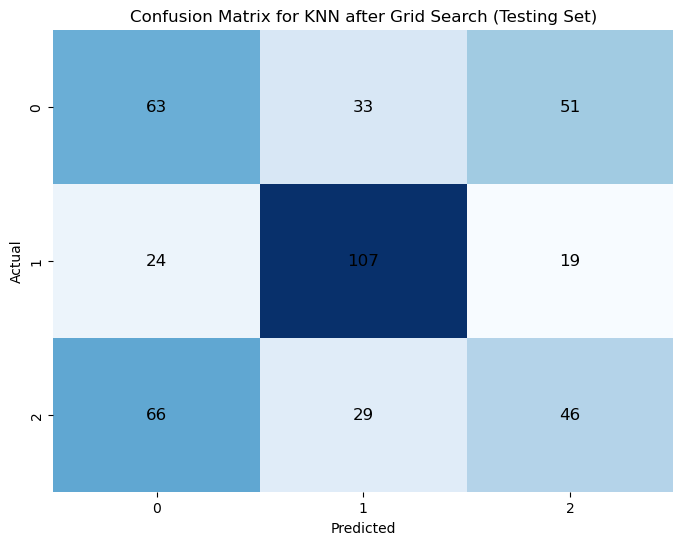

In [61]:
# Calculate confusion matrix for the test set after grid search
conf_matrix_knn_gs = confusion_matrix(y_test, y_pred_test_knn_gs)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_gs, annot=False, cmap='Blues', cbar=False)

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix_knn_gs)):
    for j in range(len(conf_matrix_knn_gs[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix_knn_gs[i, j], 'd'), ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN after Grid Search (Testing Set)')
plt.show()


In [62]:
# Calculate confusion matrix for the test set after grid search
conf_matrix_knn_gs = confusion_matrix(y_test, y_pred_test_knn_gs)

# Print the confusion matrix
print("Confusion Matrix for KNN after Grid Search (Testing Set):\n", conf_matrix_knn_gs)

# Describe the confusion matrix
print("\nInterpretation of Confusion Matrix:")
print("True Negatives (TN): Predicted as non-readmitted and actually non-readmitted")
print("False Positives (FP): Predicted as readmitted but actually non-readmitted")
print("False Negatives (FN): Predicted as non-readmitted but actually readmitted")
print("True Positives (TP): Predicted as readmitted and actually readmitted")


Confusion Matrix for KNN after Grid Search (Testing Set):
 [[ 63  33  51]
 [ 24 107  19]
 [ 66  29  46]]

Interpretation of Confusion Matrix:
True Negatives (TN): Predicted as non-readmitted and actually non-readmitted
False Positives (FP): Predicted as readmitted but actually non-readmitted
False Negatives (FN): Predicted as non-readmitted but actually readmitted
True Positives (TP): Predicted as readmitted and actually readmitted


Top 20 Features by Permutation Importance:
     Feature  Importance
0  Feature_0    0.112785
2  Feature_2    0.091324
3  Feature_3    0.083562
1  Feature_1    0.078082


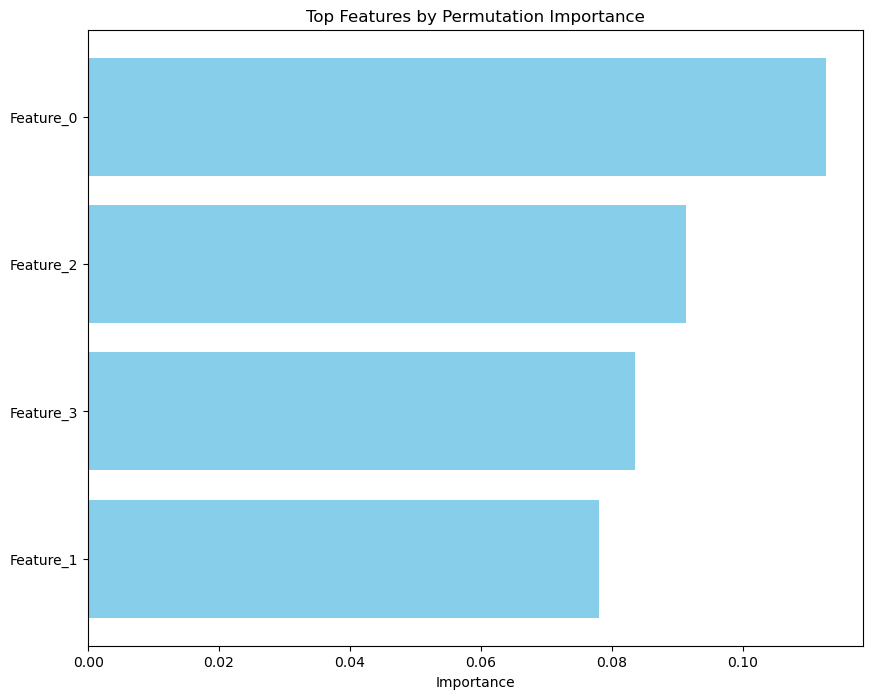

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

# If X_test is a NumPy array, convert it to a DataFrame with appropriate column names
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'Feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test

# Calculate permutation importance with limited repetitions for speed
perm_importance = permutation_importance(best_knn_model, X_test_df, y_test, n_repeats=5, random_state=42, n_jobs=-1)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Extract top 20 features
top_features = feature_importance.head(20)

# Print the top 20 features
print("Top 20 Features by Permutation Importance:")
print(top_features)

# Save the feature importance DataFrame to a CSV file for Power BI
top_features.to_csv('top_20KNN_features_permutation_importance.csv', index=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Features by Permutation Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [64]:
# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Fit the classifier to the training data
gbm_classifier.fit(X_train, y_train)

# Prediction on test set
y_pred_test = gbm_classifier.predict(X_test)

# Accuracy on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)

# Classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(class_report)


Accuracy on Test Set: 0.4771689497716895
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.48      0.45       147
           1       0.57      0.59      0.58       150
           2       0.42      0.35      0.38       141

    accuracy                           0.48       438
   macro avg       0.47      0.47      0.47       438
weighted avg       0.47      0.48      0.47       438



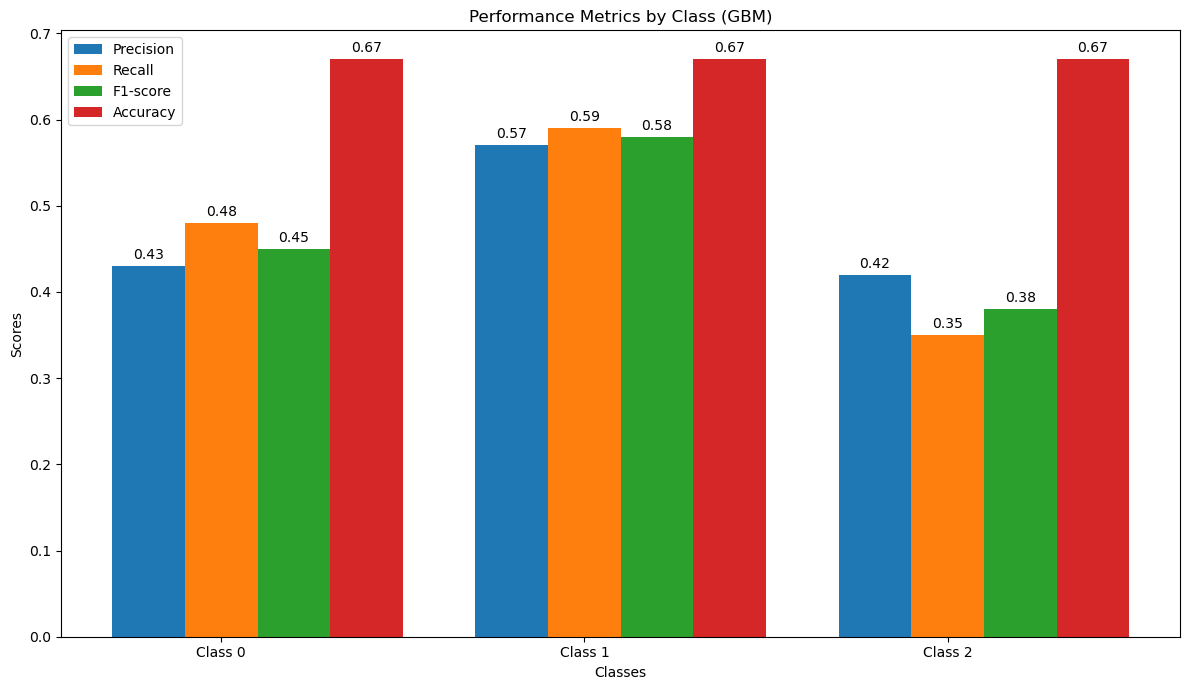

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for GBM
class_report_gbm = {
    '0': {'precision': 0.43, 'recall': 0.48, 'f1-score': 0.45, 'support': 147},
    '1': {'precision': 0.57, 'recall': 0.59, 'f1-score': 0.58, 'support': 150},
    '2': {'precision': 0.42, 'recall': 0.35, 'f1-score': 0.38, 'support': 141},
    'accuracy': 0.67,
    'macro avg': {'precision': 0.47, 'recall': 0.47, 'f1-score': 0.47, 'support': 438},
    'weighted avg': {'precision': 0.47, 'recall': 0.48, 'f1-score': 0.47, 'support': 438}
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_gbm = {metric: [class_report_gbm[cls][metric] for cls in ['0', '1', '2']] for metric in ['precision', 'recall', 'f1-score']}
metrics_dict_gbm['accuracy'] = [class_report_gbm['accuracy']] * 3  # Add accuracy

# Plotting the bar chart
x = np.arange(3)  # Number of classes
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
for i, (metric, scores) in enumerate(metrics_dict_gbm.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (GBM)')
ax.set_xticks(x + width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


In [66]:
# Cross-validation
cv_scores = cross_val_score(gbm_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.48       0.50571429 0.50285714 0.46857143 0.52722063]
Mean CV Accuracy: 0.49687269750307


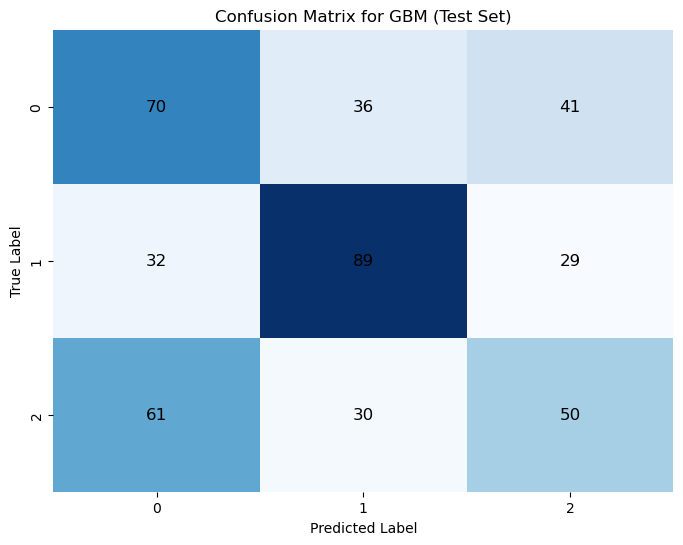

In [67]:
# Replace `y_pred_test_gbm` with your predicted labels
y_pred_test_gbm = gbm_classifier.predict(X_test)

# Calculate confusion matrix for the test set using the GBM model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_test_gbm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=False, cmap="Blues", cbar=False)

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix_gbm)):
    for j in range(len(conf_matrix_gbm[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix_gbm[i, j], 'd'), ha='center', va='center', fontsize=12)

plt.title("Confusion Matrix for GBM (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [68]:
# Replace `y_pred_test_gbm` with your predicted labels
y_pred_test_gbm = gbm_classifier.predict(X_test)

# Calculate confusion matrix for the test set using the GBM model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_test_gbm)

# Print the confusion matrix in words for analysis
print("Confusion Matrix for GBM (Test Set):")
print(conf_matrix_gbm)


Confusion Matrix for GBM (Test Set):
[[70 36 41]
 [32 89 29]
 [61 30 50]]


Top 20 Most Important Features:
  Feature  Importance
0     PC1    0.330898
1     PC2    0.283618
2     PC3    0.232180
3     PC4    0.153304


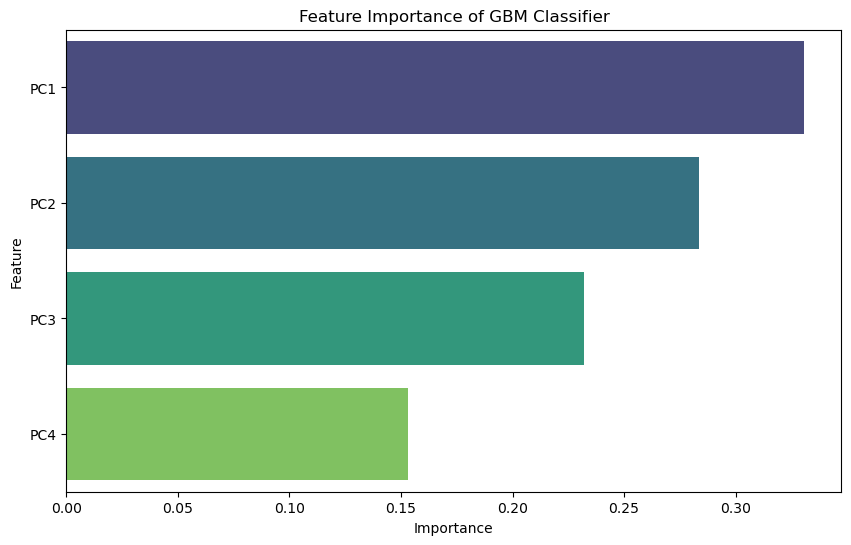

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# The original feature names before PCA
original_feature_names = X_transformed_df.columns.tolist()  # Replace with your original DataFrame's column names

# After PCA, the number of components is less than the original features
n_components = X_train.shape[1]  # Number of components after PCA

# Create new feature names for the components
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]

# Get feature importances from the trained GBM model
feature_importance = gbm_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': pca_feature_names, 'Importance': feature_importance})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top most important features
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Feature Importance of GBM Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Define a simplified parameter grid
param_grid = {
    'n_estimators': [100],  # Reduced number of values for simplicity
    'learning_rate': [0.1],  # Reduced number of values for simplicity
    'max_depth': [3]         # Reduced number of values for simplicity
}

# Initialize GridSearchCV with fewer cross-validation folds
grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.4842767295597485


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Perform cross-validation with 5 folds (default)
cv_scores = cross_val_score(gbm_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.48       0.52571429 0.54       0.48571429 0.53868195]
Mean Cross-Validation Score: 0.5140221039705282


In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier with the best parameters found
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Perform cross-validation predictions with 5 folds (default)
y_pred_cv_gbm = cross_val_predict(gbm_classifier, X_train, y_train, cv=5)

# Generate classification report
report_gbm = classification_report(y_train, y_pred_cv_gbm)

# Print classification report
print("Classification Report for GBM:")
print(report_gbm)


Classification Report for GBM:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       582
           1       0.64      0.63      0.63       579
           2       0.44      0.42      0.43       588

    accuracy                           0.51      1749
   macro avg       0.52      0.51      0.51      1749
weighted avg       0.51      0.51      0.51      1749



In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd


# Initialize the GBM classifier with the best parameters found
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Perform cross-validation predictions with 5 folds (default)
y_pred_cv_gbm = cross_val_predict(gbm_classifier, X_train, y_train, cv=5)

# Generate classification report
report_gbm = classification_report(y_train, y_pred_cv_gbm, output_dict=True)

# Convert the classification report to a DataFrame
report_gbm_df = pd.DataFrame(report_gbm).transpose()

# Print classification report
print("Classification Report for GBM:")
print(report_gbm_df)

# Save the classification report DataFrame to a CSV file for Power BI
report_gbm_df.to_csv('classification_report_gbm.csv', index=True)


Classification Report for GBM:
              precision    recall  f1-score      support
0              0.469055  0.494845  0.481605   582.000000
1              0.637961  0.626943  0.632404   579.000000
2              0.438163  0.421769  0.429809   588.000000
accuracy       0.514008  0.514008  0.514008     0.514008
macro avg      0.515060  0.514519  0.514606  1749.000000
weighted avg   0.514585  0.514008  0.514113  1749.000000


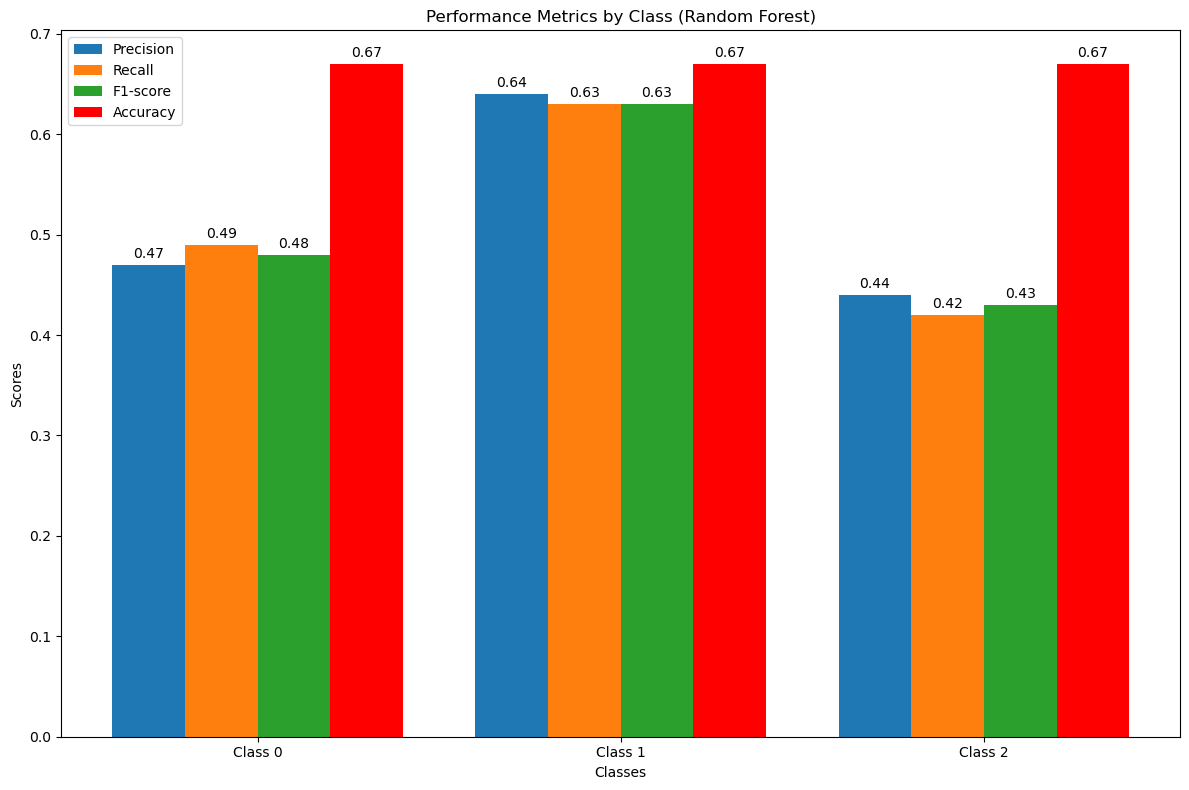

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for Random Forest
class_report_rf = {
    '0': {'precision': 0.47, 'recall': 0.49, 'f1-score': 0.48, 'support': 582},
    '1': {'precision': 0.64, 'recall': 0.63, 'f1-score': 0.63, 'support': 579},
    '2': {'precision': 0.44, 'recall': 0.42, 'f1-score': 0.43, 'support': 588},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_rf = {metric: [class_report_rf[cls][metric] for cls in class_report_rf] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [0.67] * len(class_report_rf)

# Plotting the bar chart
x = np.arange(len(class_report_rf))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_rf.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_rf) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Random Forest)')
ax.set_xticks(x + (len(metrics_dict_rf) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])  # Update with your actual class labels
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


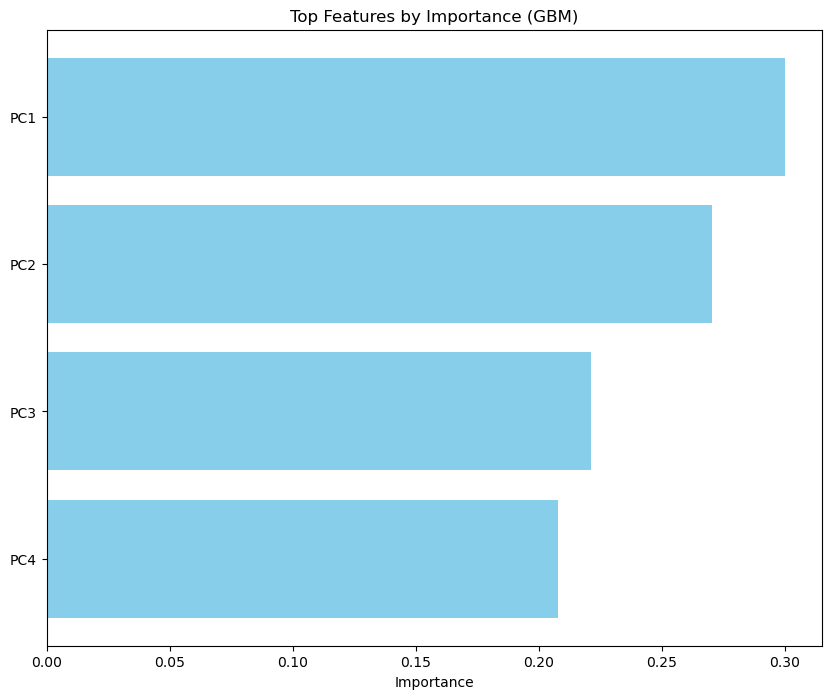

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict

# Initialize the GBM classifier with the best parameters found
gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)

# Fit the model to the training data
gbm_classifier.fit(X_train, y_train)

# Extract feature importances
feature_importances = gbm_classifier.feature_importances_

# Since X_train is a numpy array, create feature names for the PCA components
n_components = X_train.shape[1]  # Number of components after PCA
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': pca_feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract top 20 features
top_features = feature_importance_df.nlargest(20, 'Importance')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Features by Importance (GBM)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Save the feature importance DataFrame to a CSV file for Power BI
top_features.to_csv('gbm_feature_importance.csv', index=False)


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# Fit the best GBM model to your training data
best_gbm_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.5, max_depth=7)
best_gbm_model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Extract feature importances from the best GBM model
feature_importance = best_gbm_model.feature_importances_

# Since X_train is a numpy array, create feature names for the PCA components
n_components = X_train.shape[1]  # Number of components after PCA
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': pca_feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 20 features by importance
top_20_features = feature_importance_df.head(20)

# Display the top 20 feature importances
print("Top 20 Feature Importance for GBM:")
print(top_20_features)

# Save the top 20 feature importances to a CSV file for Power BI
top_20_features.to_csv('top_20_gbm_feature_importance.csv', index=False)


Top 20 Feature Importance for GBM:
  Feature  Importance
0     PC1    0.300116
1     PC2    0.270577
2     PC3    0.221302
3     PC4    0.208004


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Generate predictions on the test set (internally used by classification_report)
y_pred_test_rf = rf_classifier.predict(X_test)

# Classification report for Random Forest
class_report_rf = classification_report(y_test, y_pred_test_rf)
print("Classification Report for Random Forest:")
print(class_report_rf)


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       147
           1       0.71      0.69      0.70       150
           2       0.49      0.46      0.47       141

    accuracy                           0.56       438
   macro avg       0.56      0.56      0.56       438
weighted avg       0.56      0.56      0.56       438



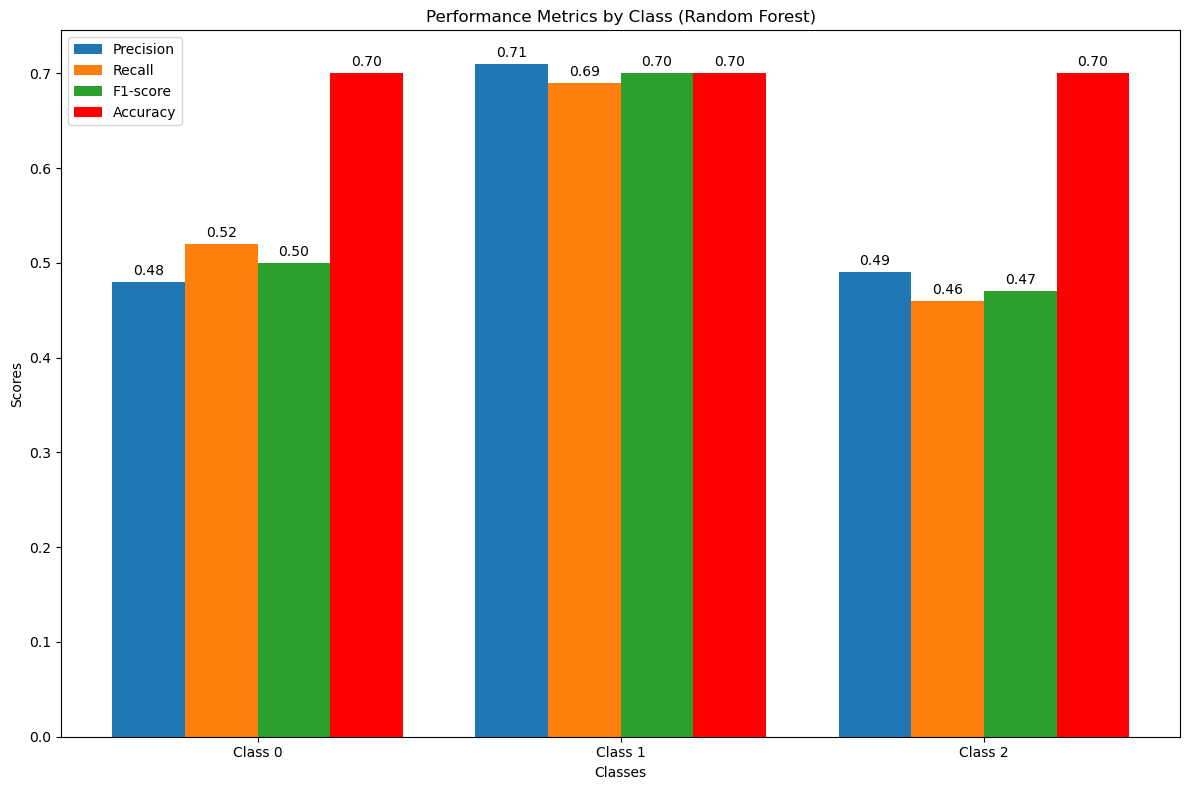

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for Random Forest
class_report_rf = {
    '0': {'precision': 0.48, 'recall': 0.52, 'f1-score': 0.50, 'support': 147},
    '1': {'precision': 0.71, 'recall': 0.69, 'f1-score': 0.70, 'support': 150},
    '2': {'precision': 0.49, 'recall': 0.46, 'f1-score': 0.47, 'support': 141},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_rf = {metric: [class_report_rf[cls][metric] for cls in class_report_rf] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [0.70] * len(class_report_rf)

# Plotting the bar chart
x = np.arange(len(class_report_rf))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_rf.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_rf) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Random Forest)')
ax.set_xticks(x + (len(metrics_dict_rf) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])  # Update with your actual class labels
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              verbose=1,
                              n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [80]:
import pandas as pd
from sklearn.metrics import classification_report

# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_

# Prediction on test set using the best model
y_pred_test_rf = best_rf_classifier.predict(X_test)

# Generate classification report for the best model
class_report_rf = classification_report(y_test, y_pred_test_rf, output_dict=True)

# Convert the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report_rf).transpose()

# Round the DataFrame to 2 decimal places
class_report_df = class_report_df.round(2)

# Save the classification report DataFrame to a CSV file for Power BI
class_report_df.to_csv('rf_classification_report.csv', index=True)

# Print the classification report DataFrame for verification
print("Classification Report DataFrame for Random Forest (Rounded to 2 Decimal Places):")
print(class_report_df)


Classification Report DataFrame for Random Forest (Rounded to 2 Decimal Places):
              precision  recall  f1-score  support
0                  0.48    0.54      0.51   147.00
1                  0.71    0.66      0.68   150.00
2                  0.44    0.41      0.43   141.00
accuracy           0.54    0.54      0.54     0.54
macro avg          0.54    0.54      0.54   438.00
weighted avg       0.55    0.54      0.54   438.00


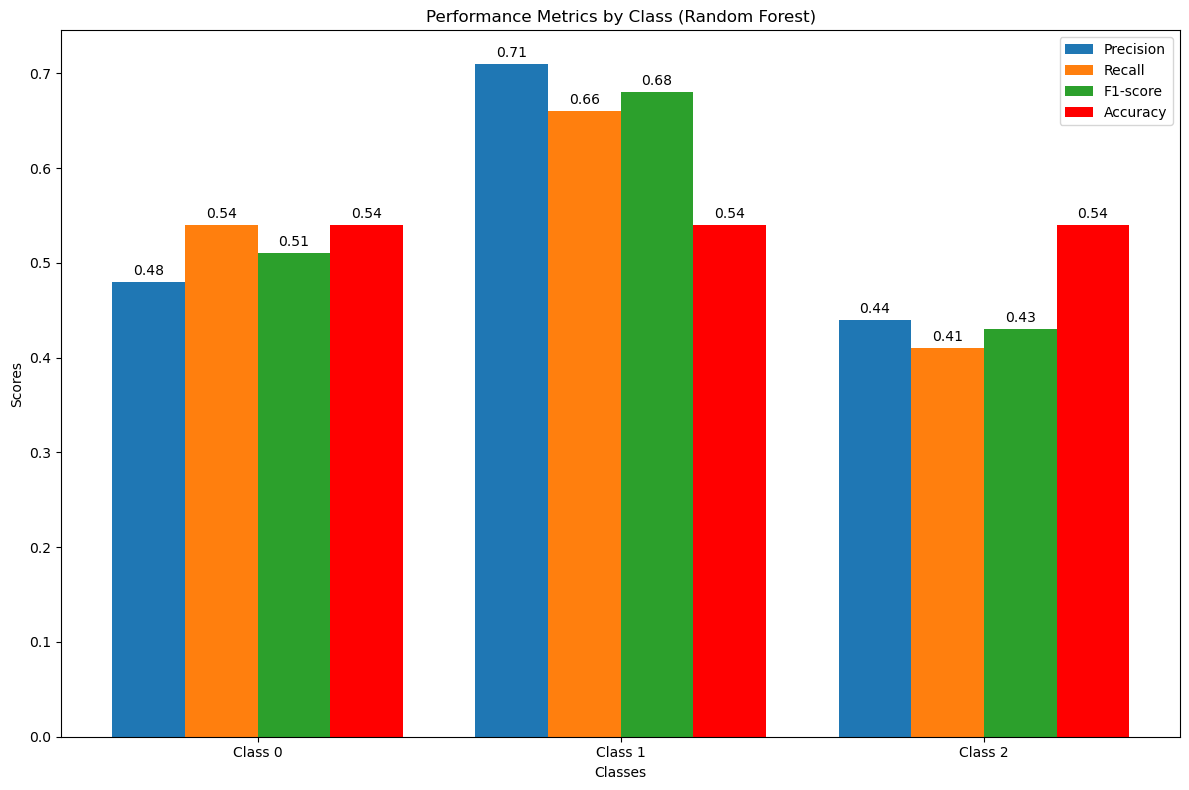

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Classification report for Random Forest
class_report_rf = {
    '0': {'precision': 0.48, 'recall': 0.54, 'f1-score': 0.51, 'support': 147},
    '1': {'precision': 0.71, 'recall': 0.66, 'f1-score': 0.68, 'support': 150},
    '2': {'precision': 0.44, 'recall': 0.41, 'f1-score': 0.43, 'support': 141},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_rf = {metric: [class_report_rf[cls][metric] for cls in class_report_rf] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [0.54] * len(class_report_rf)

# Plotting the bar chart
x = np.arange(len(class_report_rf))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_rf.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_rf) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Random Forest)')
ax.set_xticks(x + (len(metrics_dict_rf) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])  # Update with your actual class labels
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


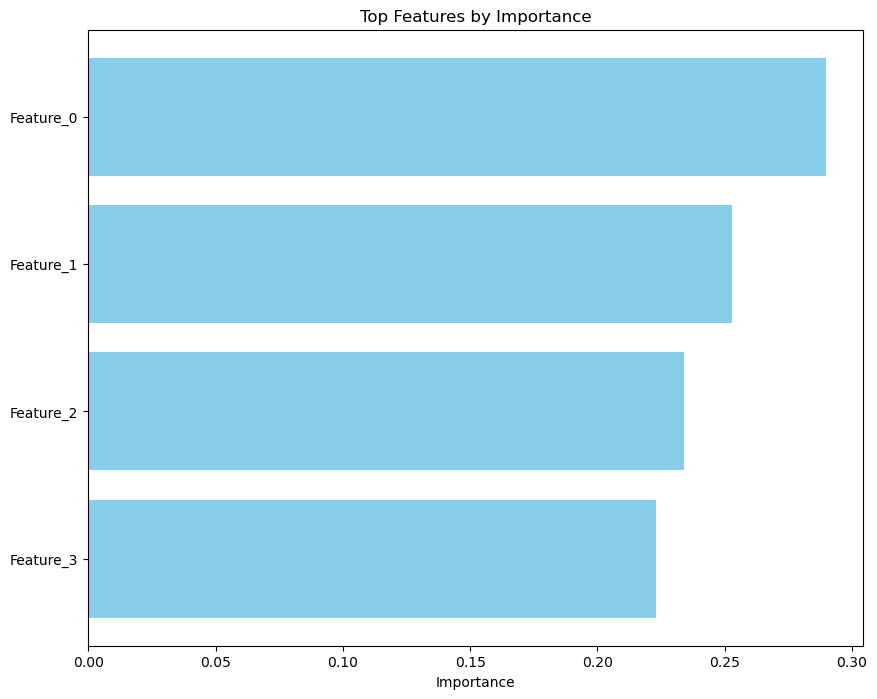

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_

# Extract feature importances
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame for feature importances
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract top 20 features
top_features = importance_df.head(20)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

# Save the feature importance DataFrame to a CSV file for Power BI
top_features.to_csv('rf_feature_importance.csv', index=False)


In [83]:
import numpy as np
import pandas as pd

# Retrieve feature importances from the best Random Forest model
feature_importances = best_rf_classifier.feature_importances_

# Create feature names if you used PCA or similar dimensionality reduction
n_features = len(feature_importances)  # Number of features
feature_names = [f'Feature_{i+1}' for i in range(n_features)]

# Get the indices of the top 20 features
top_20_indices = np.argsort(feature_importances)[-20:]

# Get the top 20 feature names and importances
top_20_feature_names = np.array(feature_names)[top_20_indices]
top_20_importances = feature_importances[top_20_indices]

# Create a DataFrame for better visualization
top_20_features_df = pd.DataFrame({'Feature': top_20_feature_names, 'Importance': top_20_importances})

# Sort the features by importance
top_20_features_df = top_20_features_df.sort_values(by='Importance', ascending=False)

# Display the top 20 feature importances
print("Top 20 Feature Importances:")
print(top_20_features_df)

# Save the top 20 feature importances to a CSV file for Power BI
top_20_features_df.to_csv('top_feature_importances_rf.csv', index=False)


Top 20 Feature Importances:
     Feature  Importance
3  Feature_1    0.289898
2  Feature_2    0.252927
1  Feature_3    0.234021
0  Feature_4    0.223153


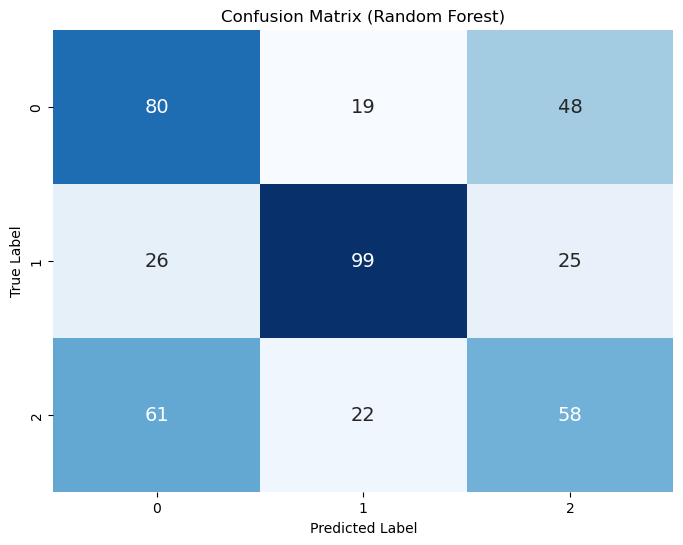

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediction on test set using the best model
y_pred_test_rf = best_rf_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, cbar=False)

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [85]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_rf)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[80 19 48]
 [26 99 25]
 [61 22 58]]


Risk Stratification DataFrame:
      Actual Predicted  Predicted_Probability Risk_Category
1846       1         1               0.690455        Medium
1316       0         0               0.099448           Low
764        2         1               0.511526        Medium
1550       1         1               0.735776          High
993        2         2               0.343995        Medium


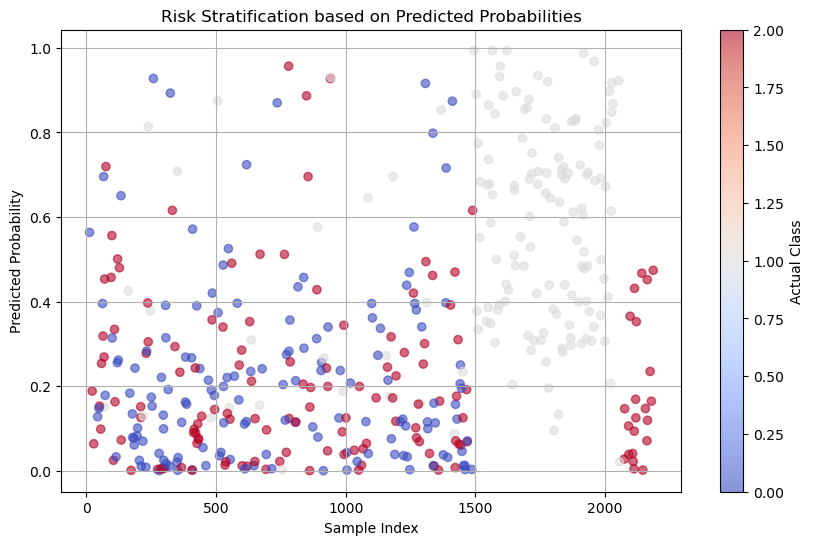

In [86]:
# Get the best model
best_rf_classifier = grid_search_rf.best_estimator_

# Prediction on test set using the best model
y_pred_test_rf = best_rf_classifier.predict(X_test)
y_pred_prob_rf = best_rf_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create a DataFrame for risk stratification
risk_stratification_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_rf,
    'Predicted_Probability': y_pred_prob_rf
})

# Convert 'Actual' column to numeric if not already
risk_stratification_df['Actual'] = risk_stratification_df['Actual'].astype(int)

# Define risk levels based on predicted probabilities
# Example thresholds (you can adjust these based on your specific use case):
high_risk_threshold = 0.7
low_risk_threshold = 0.3

# Add a new column for risk category
risk_stratification_df['Risk_Category'] = pd.cut(
    risk_stratification_df['Predicted_Probability'], 
    bins=[-float('inf'), low_risk_threshold, high_risk_threshold, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Save the risk stratification DataFrame to a CSV file for Power BI
risk_stratification_df.to_csv('risk_stratification_rf.csv', index=False)

# Print the risk stratification DataFrame for verification
print("Risk Stratification DataFrame:")
print(risk_stratification_df.head())

# Plotting the risk stratification
plt.figure(figsize=(10, 6))
scatter = plt.scatter(risk_stratification_df.index, 
                      risk_stratification_df['Predicted_Probability'], 
                      c=risk_stratification_df['Actual'], 
                      cmap='coolwarm', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Risk Stratification based on Predicted Probabilities')
plt.colorbar(scatter, label='Actual Class')
plt.grid(True)
plt.show()


In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predict severity levels for training and testing sets
y_pred_train_svm = svm_classifier.predict(X_train)
y_pred_test_svm = svm_classifier.predict(X_test)

# Calculate accuracy for testing set
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

# Generate classification report for the test set
report_svm = classification_report(y_test, y_pred_test_svm)

print("Classification Report for SVM (Test Set):\n", report_svm)
print("Accuracy of SVM on Testing Set:", accuracy_test_svm)


Classification Report for SVM (Test Set):
               precision    recall  f1-score   support

           0       0.44      0.61      0.51       147
           1       0.54      0.55      0.54       150
           2       0.40      0.24      0.30       141

    accuracy                           0.47       438
   macro avg       0.46      0.47      0.45       438
weighted avg       0.47      0.47      0.46       438

Accuracy of SVM on Testing Set: 0.4703196347031963


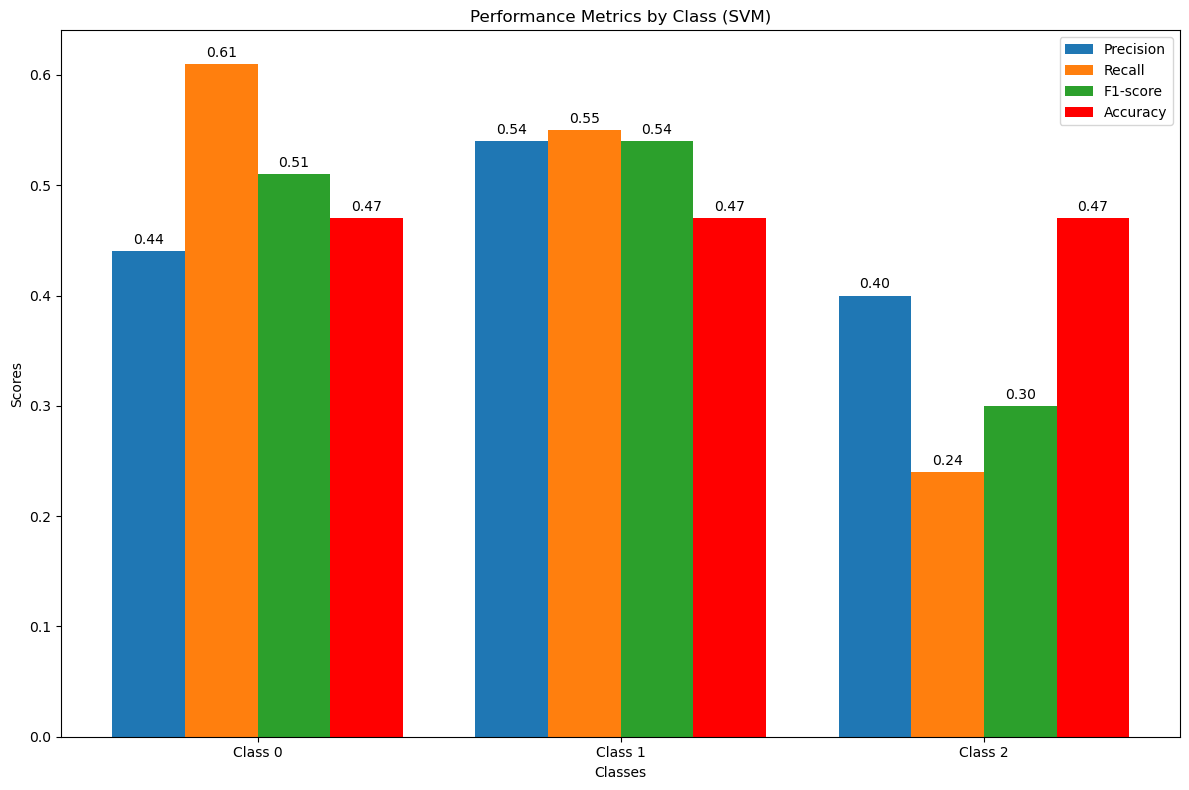

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Updated Classification Report for SVM
class_report_svm = {
    '0': {'precision': 0.44, 'recall': 0.61, 'f1-score': 0.51, 'accuracy': 0.47},
    '1': {'precision': 0.54, 'recall': 0.55, 'f1-score': 0.54, 'accuracy': 0.47},
    '2': {'precision': 0.40, 'recall': 0.24, 'f1-score': 0.30, 'accuracy': 0.47},
}

# Convert to a dictionary with keys as metrics and values as lists of scores
metrics_dict_svm = {metric: [class_report_svm[cls][metric] for cls in class_report_svm] for metric in ['precision', 'recall', 'f1-score']}

# Adding accuracy separately
accuracy = [class_report_svm[cls]['accuracy'] for cls in class_report_svm]

# Plotting the bar chart
x = np.arange(len(class_report_svm))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, (metric, scores) in enumerate(metrics_dict_svm.items()):
    ax.bar(x + i*width, scores, width, label=metric.capitalize())

# Add accuracy as a separate bar
ax.bar(x + len(metrics_dict_svm) * width, accuracy, width, label='Accuracy', color='Red')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (SVM)')
ax.set_xticks(x + (len(metrics_dict_svm) / 2) * width)
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

bars = [rect for rect in ax.get_children() if isinstance(rect, plt.Rectangle)]
autolabel(bars)

fig.tight_layout()
plt.show()


In [89]:
# Perform cross-validation with SVM classifier
cv_scores_svm = cross_val_score(svm_classifier, X_train, y_train, cv=5)

print("Cross-validation Scores:", cv_scores_svm)
print("Mean Cross-validation Score:", np.mean(cv_scores_svm))


Cross-validation Scores: [0.44285714 0.45714286 0.48       0.42857143 0.43839542]
Mean Cross-validation Score: 0.44939336880884156


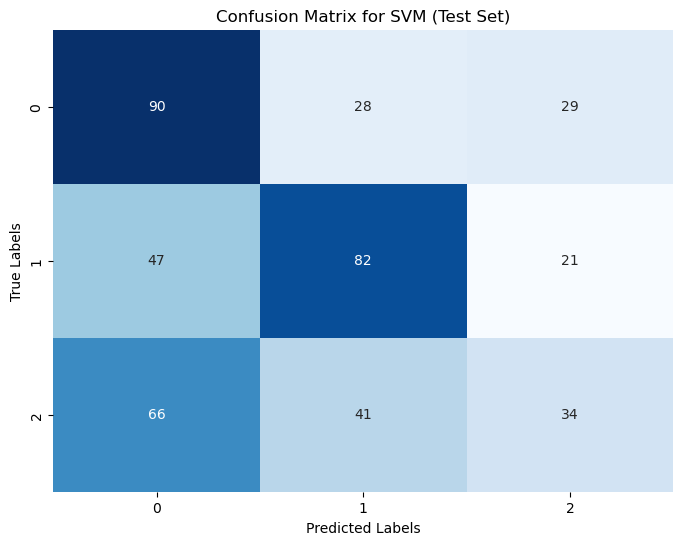

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict readmissions for testing set
y_pred_test_svm = svm_classifier.predict(X_test)

# Calculate confusion matrix for the test set
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Customize labels, title, and ticks
plt.title('Confusion Matrix for SVM (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()


In [91]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM model with probability estimates enabled
svm_model = SVC(probability=True, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_svm_model = grid_search.best_estimator_


In [92]:
# Predict severity levels using the best SVM model
y_pred_test_svm_best = best_svm_model.predict(X_test)

# Generate classification report for the test set using the best model
report_svm_best = classification_report(y_test, y_pred_test_svm_best, output_dict=True)

# Convert the classification report to a DataFrame
report_svm_df = pd.DataFrame(report_svm_best).transpose()

# Round the DataFrame to 2 decimal places
report_svm_df = report_svm_df.round(2)

# Save the classification report DataFrame to a CSV file for Power BI
report_svm_df.to_csv('svm_classification_report.csv', index=True)

# Print the classification report DataFrame for verification
print("Classification Report DataFrame for Tuned SVM (Rounded to 2 Decimal Places):")
print(report_svm_df)

Classification Report DataFrame for Tuned SVM (Rounded to 2 Decimal Places):
              precision  recall  f1-score  support
0                  0.44    0.44      0.44   147.00
1                  0.63    0.70      0.66   150.00
2                  0.37    0.33      0.35   141.00
accuracy           0.49    0.49      0.49     0.49
macro avg          0.48    0.49      0.48   438.00
weighted avg       0.48    0.49      0.49   438.00


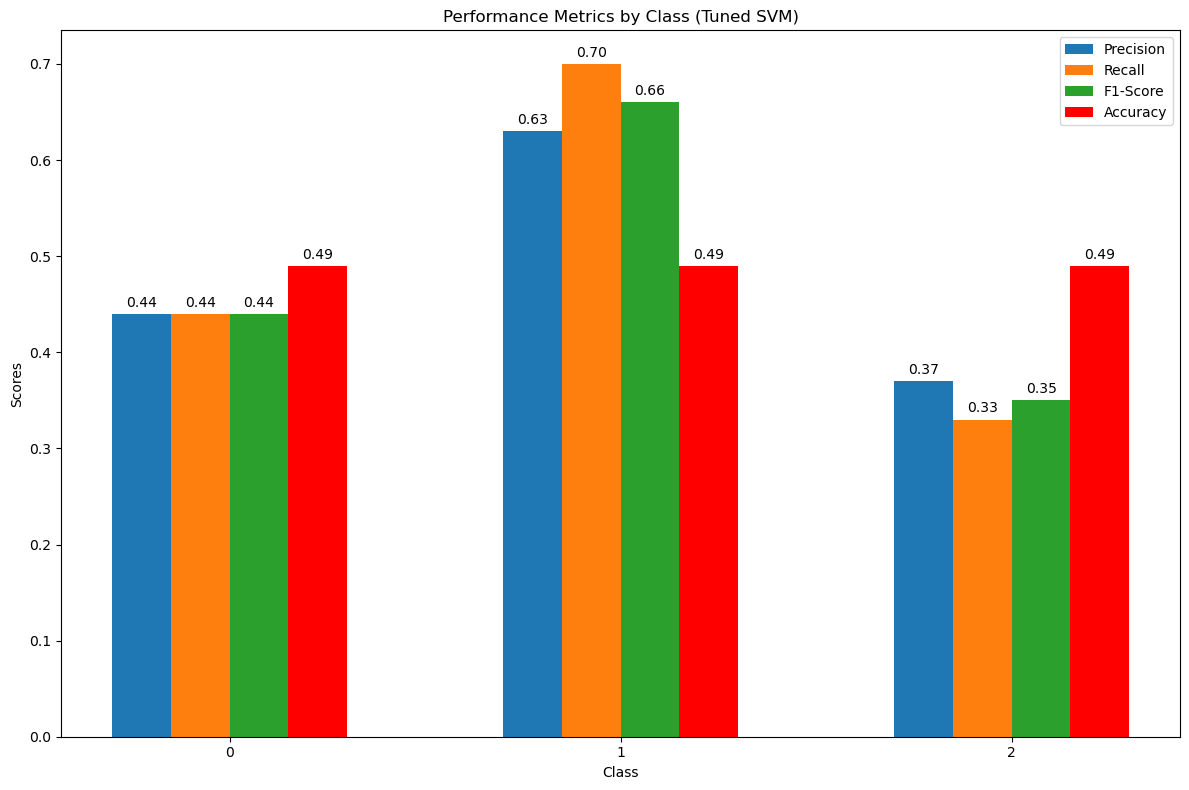

Feature importances are not available for non-linear SVM kernels.


In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Classification report for tuned SVM model
class_report_svm_best = {
    '0': {'precision': 0.44, 'recall': 0.44, 'f1-score': 0.44, 'accuracy': 0.49},
    '1': {'precision': 0.63, 'recall': 0.70, 'f1-score': 0.66, 'accuracy': 0.49},
    '2': {'precision': 0.37, 'recall': 0.33, 'f1-score': 0.35, 'accuracy': 0.49}
}

# Extracting metrics for each class
classes = list(class_report_svm_best.keys())
precision = [class_report_svm_best[cls]['precision'] for cls in classes]
recall = [class_report_svm_best[cls]['recall'] for cls in classes]
f1_score = [class_report_svm_best[cls]['f1-score'] for cls in classes]
accuracy = [class_report_svm_best[cls]['accuracy'] for cls in classes]

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'Accuracy': accuracy
})

# Save the metrics DataFrame to a CSV file for Power BI
metrics_df.to_csv('svm_performance_metrics.csv', index=False)

# Plotting the bar chart
x = np.arange(len(classes))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars_precision = ax.bar(x - 1.5*width, precision, width, label='Precision')
bars_recall = ax.bar(x - 0.5*width, recall, width, label='Recall')
bars_f1_score = ax.bar(x + 0.5*width, f1_score, width, label='F1-Score')
bars_accuracy = ax.bar(x + 1.5*width, accuracy, width, label='Accuracy', color='red')

# Adding labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Class (Tuned SVM)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Adding annotations
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_precision)
autolabel(bars_recall)
autolabel(bars_f1_score)
autolabel(bars_accuracy)

fig.tight_layout()
plt.show()

# Save the plot as an image for Power BI
fig.savefig('svm_performance_metrics_plot.png')

# Extract and save feature importance if SVM has a linear kernel
if best_svm_model.kernel == 'linear':
    feature_importance = best_svm_model.coef_[0]
    feature_names = X_train.columns  # Replace with actual feature names from your dataset
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(feature_importance)})
    importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Save the feature importance DataFrame to a CSV file for Power BI
    importance_df.head(20).to_csv('svm_feature_importance.csv', index=False)

    # Print top 20 features
    print("Top 20 Features by Importance for Tuned SVM (Linear Kernel):")
    print(importance_df.head(20))
else:
    print("Feature importances are not available for non-linear SVM kernels.")


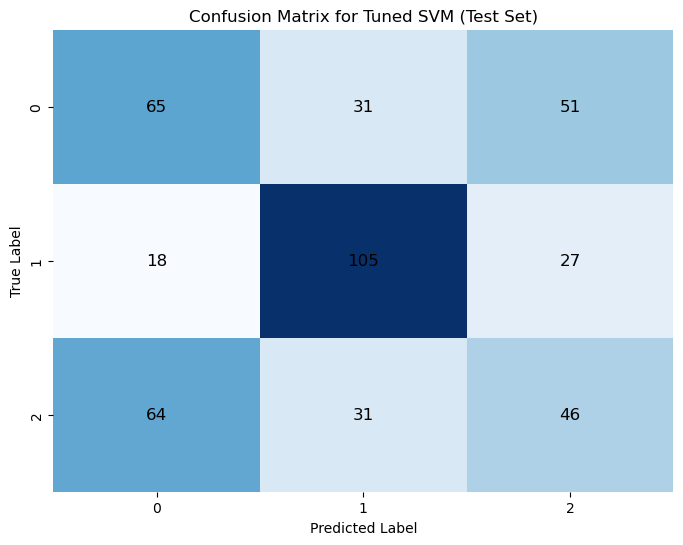

In [94]:
# Calculate confusion matrix for the test set using the best model
conf_matrix_svm_best = confusion_matrix(y_test, y_pred_test_svm_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_best, annot=False, cmap="Blues", cbar=False)

# Add text annotations with font size and adjusted offsets
for i in range(len(conf_matrix_svm_best)):
    for j in range(len(conf_matrix_svm_best[0])):
        text_x_offset = 0.5  # Adjust for horizontal centering
        text_y_offset = 0.5  # Adjust for vertical centering
        plt.text(j + text_x_offset, i + text_y_offset, format(conf_matrix_svm_best[i, j], 'd'), ha='center', va='center', fontsize=12, color='black')

plt.title("Confusion Matrix for Tuned SVM (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Top 20 Features by Permutation Importance for SVM:
     Feature  Importance
0  Feature_0    0.289898
1  Feature_1    0.252927
2  Feature_2    0.234021
3  Feature_3    0.223153


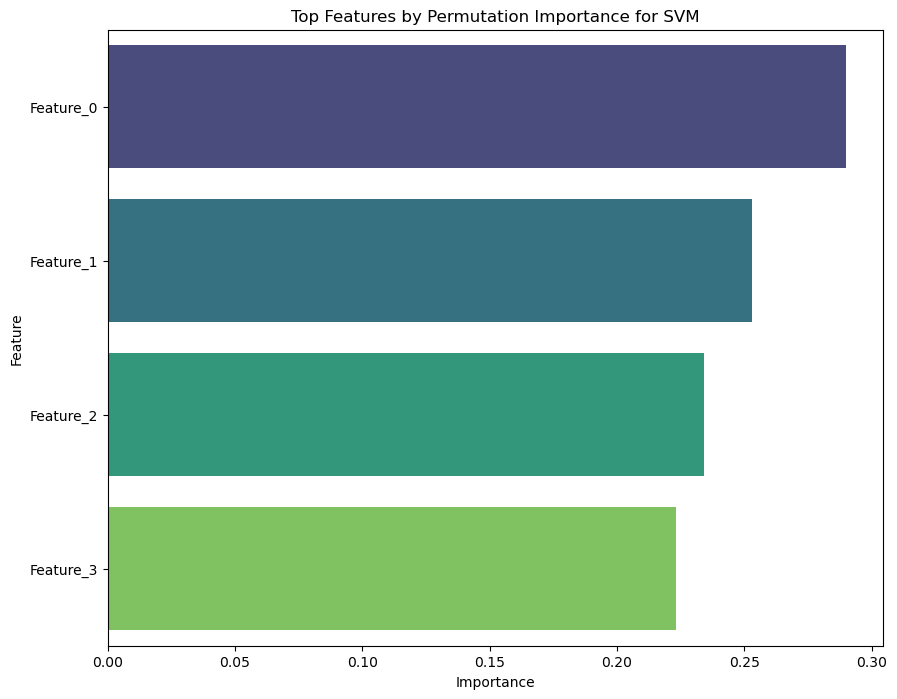

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Print top 20 features
print("Top 20 Features by Permutation Importance for SVM:")
print(importance_df.head(20))

# Save the DataFrame to a CSV file for Power BI
importance_df.to_csv('feature_importance.csv', index=False)

# Plot feature importances
plt.figure(figsize=(10, 8))

# Check if 'Std' column exists before attempting to use it
if 'Std' in importance_df.columns:
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis', xerr=importance_df['Std'].head(20))
else:
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features by Permutation Importance for SVM')
plt.show()


Risk Stratification DataFrame:
     Actual Predicted  Max_Decision_Function_Value Risk_Category
1846      1         1                     2.233698      Low Risk
1316      0         0                     2.225891      Low Risk
764       2         1                     2.196333      Low Risk
1550      1         1                     2.253893      Low Risk
993       2         2                     2.150796      Low Risk


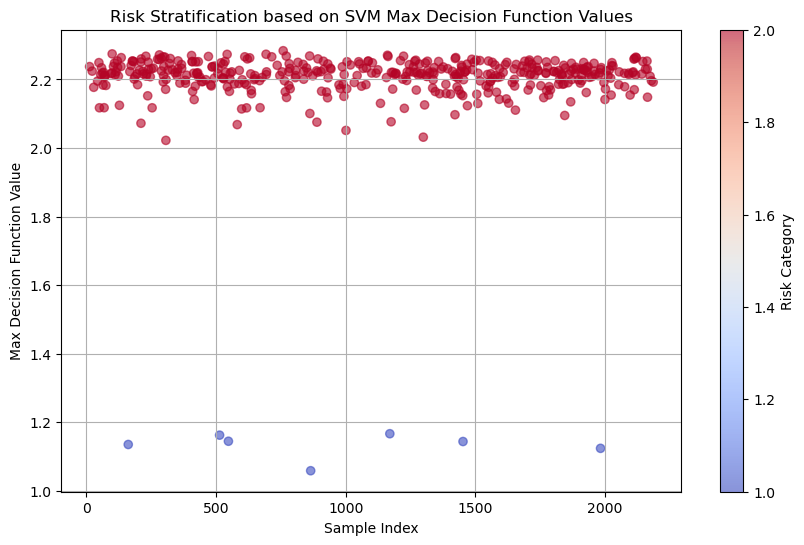

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_pred_test_svm contains predicted classes and best_svm_model is the best SVM model
y_pred_test_svm = best_svm_model.predict(X_test)
y_pred_prob_svm = best_svm_model.decision_function(X_test)

# Get the maximum absolute decision function value for each sample
max_decision_function = np.max(np.abs(y_pred_prob_svm), axis=1)

# Create a DataFrame for risk stratification
risk_stratification_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test_svm,
    'Max_Decision_Function_Value': max_decision_function
})

# Categorize risk based on the Maximum Decision Function Value
def categorize_risk(value):
    if value < 1:
        return 'High Risk'
    elif value < 2:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply the categorization function
risk_stratification_df['Risk_Category'] = risk_stratification_df['Max_Decision_Function_Value'].apply(categorize_risk)

# Save the risk stratification DataFrame to a CSV file for Power BI
risk_stratification_df.to_csv('risk_stratification_svm.csv', index=False)

# Print the risk stratification DataFrame for verification
print("Risk Stratification DataFrame:")
print(risk_stratification_df.head())

# Map the 'Actual' column to numeric values for coloring
color_map = {'High Risk': 0, 'Medium Risk': 1, 'Low Risk': 2}
colors = risk_stratification_df['Risk_Category'].map(color_map)

# Plotting the risk stratification
plt.figure(figsize=(10, 6))
scatter = plt.scatter(risk_stratification_df.index, risk_stratification_df['Max_Decision_Function_Value'], 
                      c=colors, cmap='coolwarm', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Max Decision Function Value')
plt.title('Risk Stratification based on SVM Max Decision Function Values')
plt.colorbar(scatter, label='Risk Category')
plt.grid(True)
plt.show()


In [97]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



Explanation for Instance 19:
                  Feature  Importance
        Feature 7 <= 0.25    0.242312
 0.52 < Feature 4 <= 0.76    0.147613
0.25 < Feature 15 <= 0.49    0.055000
 0.45 < Feature 3 <= 0.69    0.036052
        Feature 6 <= 0.29    0.029739
0.21 < Feature 18 <= 0.38    0.023889
        Feature 16 > 0.78    0.023408
         Feature 1 > 0.78    0.018908
 0.24 < Feature 5 <= 0.44    0.011356
 0.31 < Feature 9 <= 0.51    0.010273


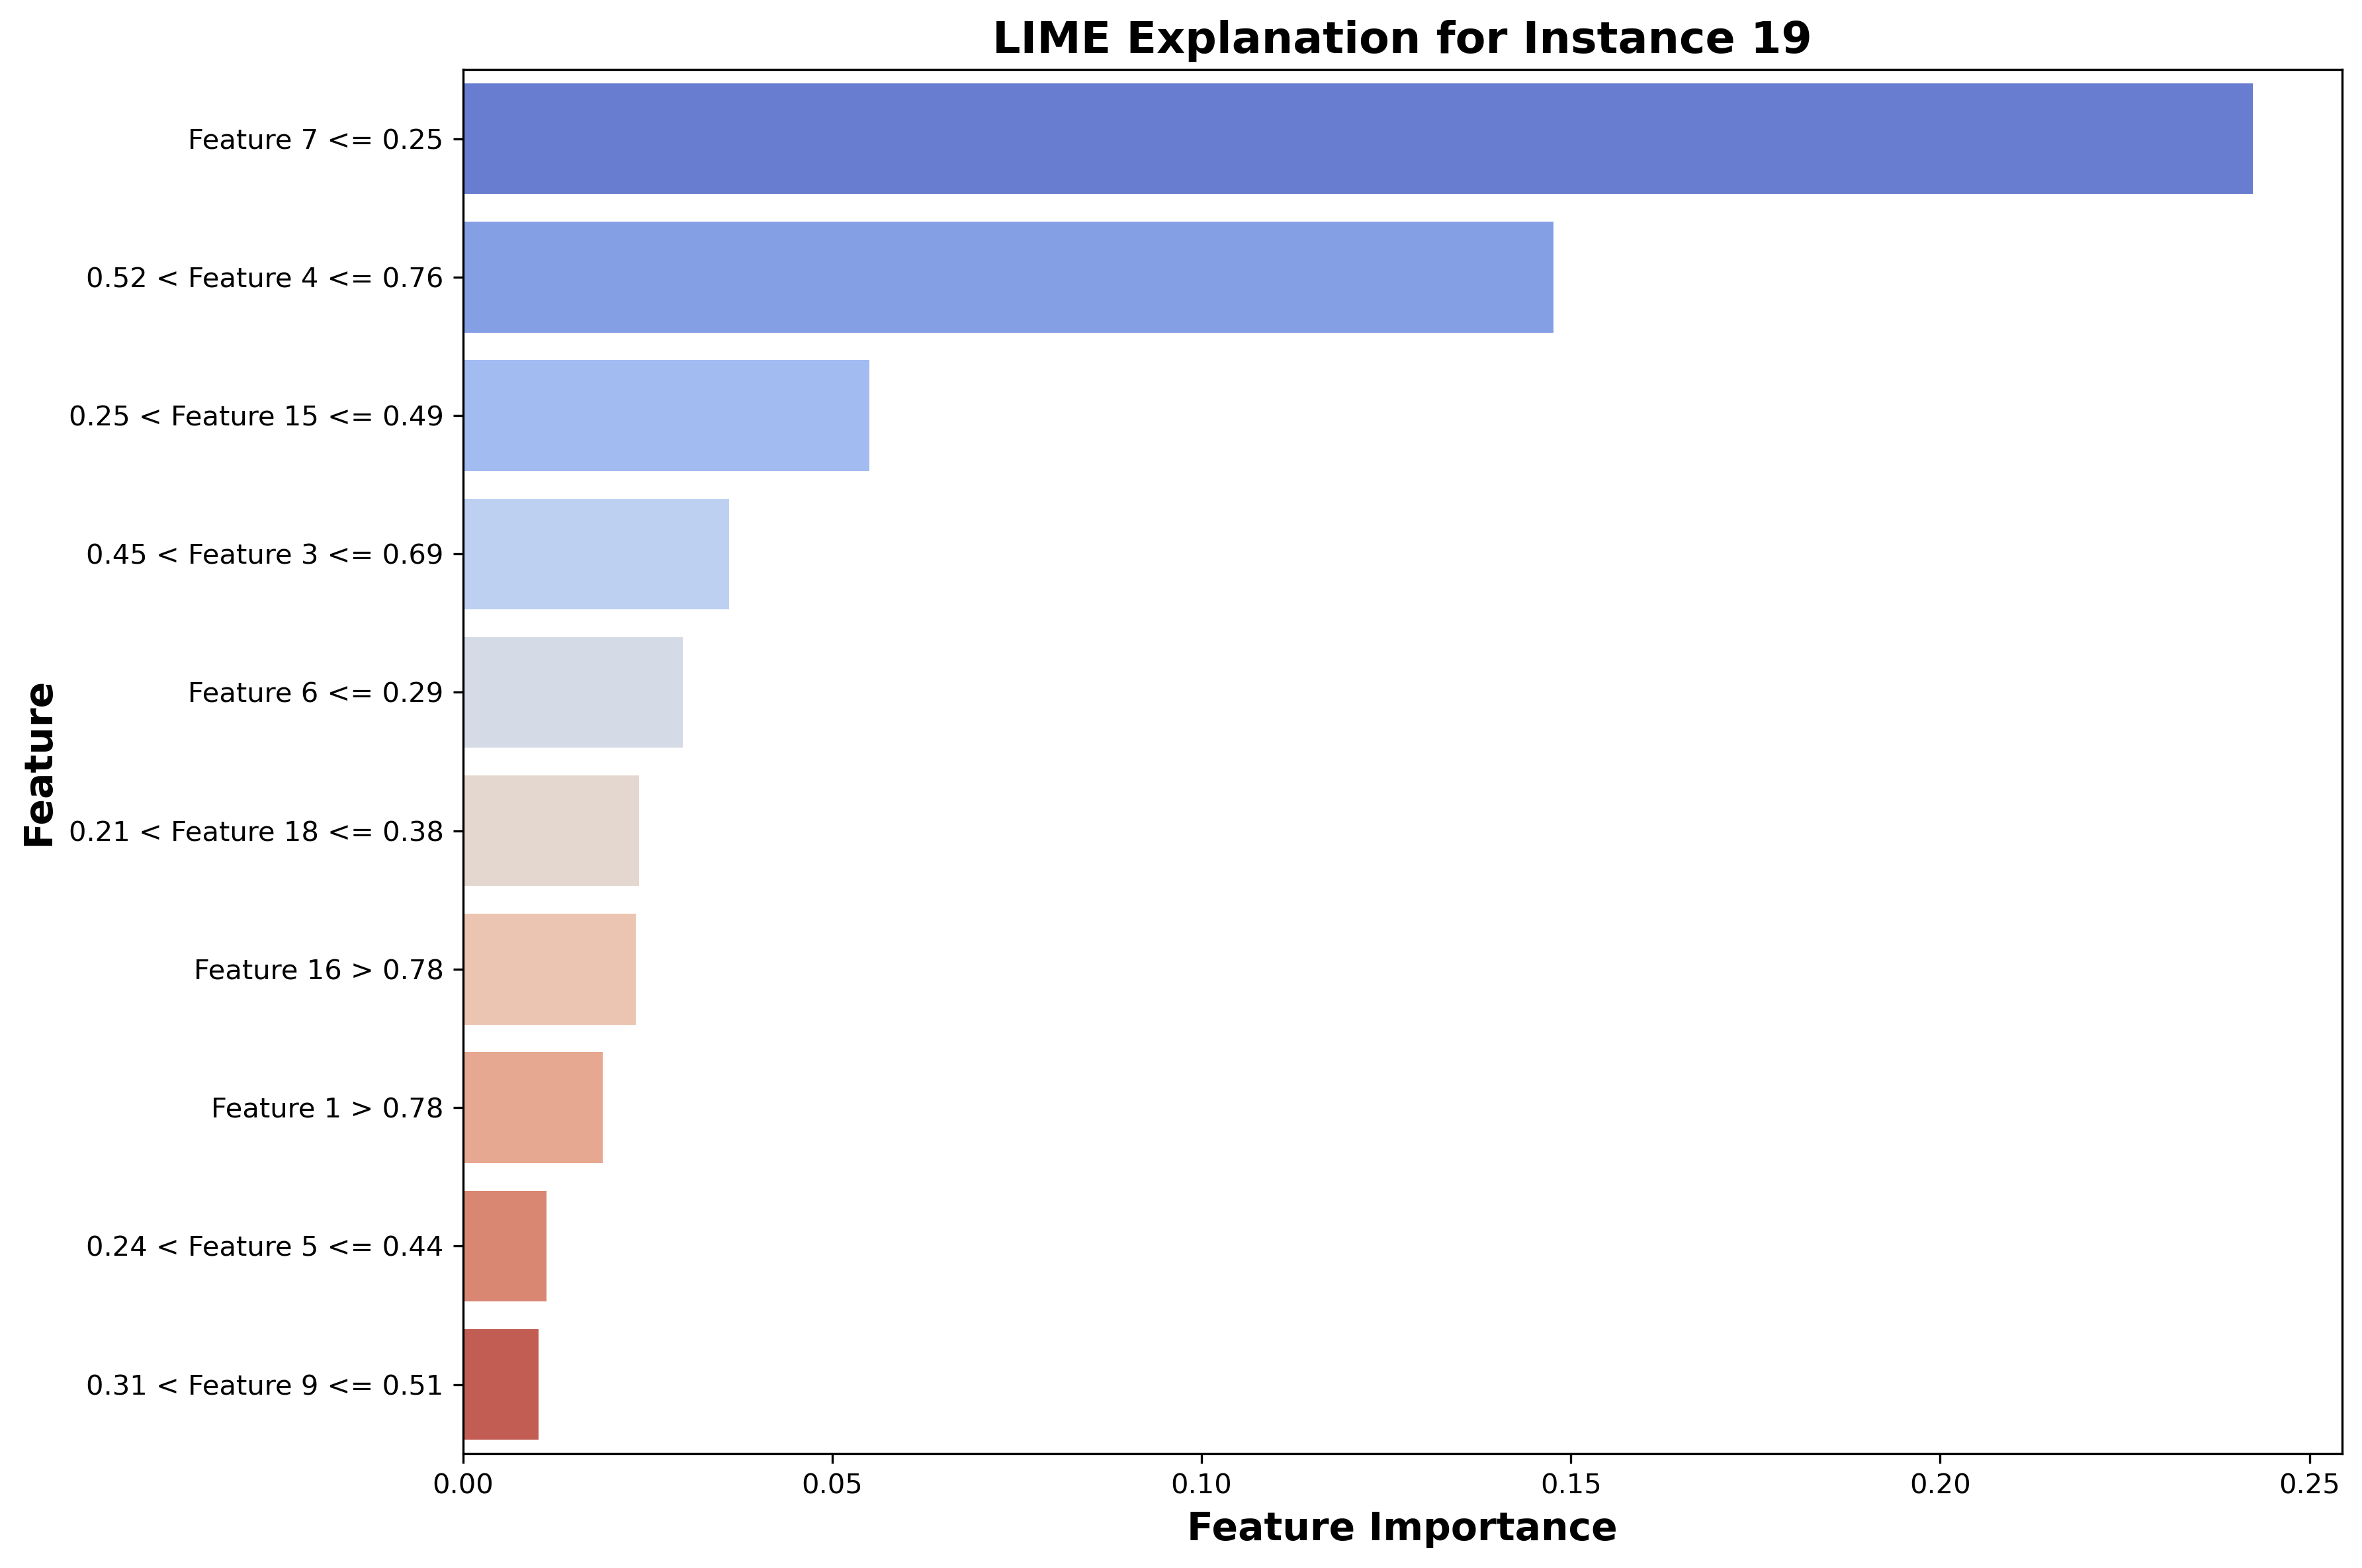


Explanation for Instance 15:
                  Feature  Importance
 0.25 < Feature 7 <= 0.56    0.190165
       Feature 15 <= 0.25    0.092425
       Feature 17 <= 0.32    0.033791
        Feature 19 > 0.80    0.030329
0.43 < Feature 14 <= 0.66    0.027359
 0.27 < Feature 1 <= 0.48    0.012874
        Feature 0 <= 0.27    0.011789
 0.53 < Feature 6 <= 0.76    0.009438
 0.21 < Feature 3 <= 0.45    0.007162
 0.44 < Feature 5 <= 0.72    0.006740


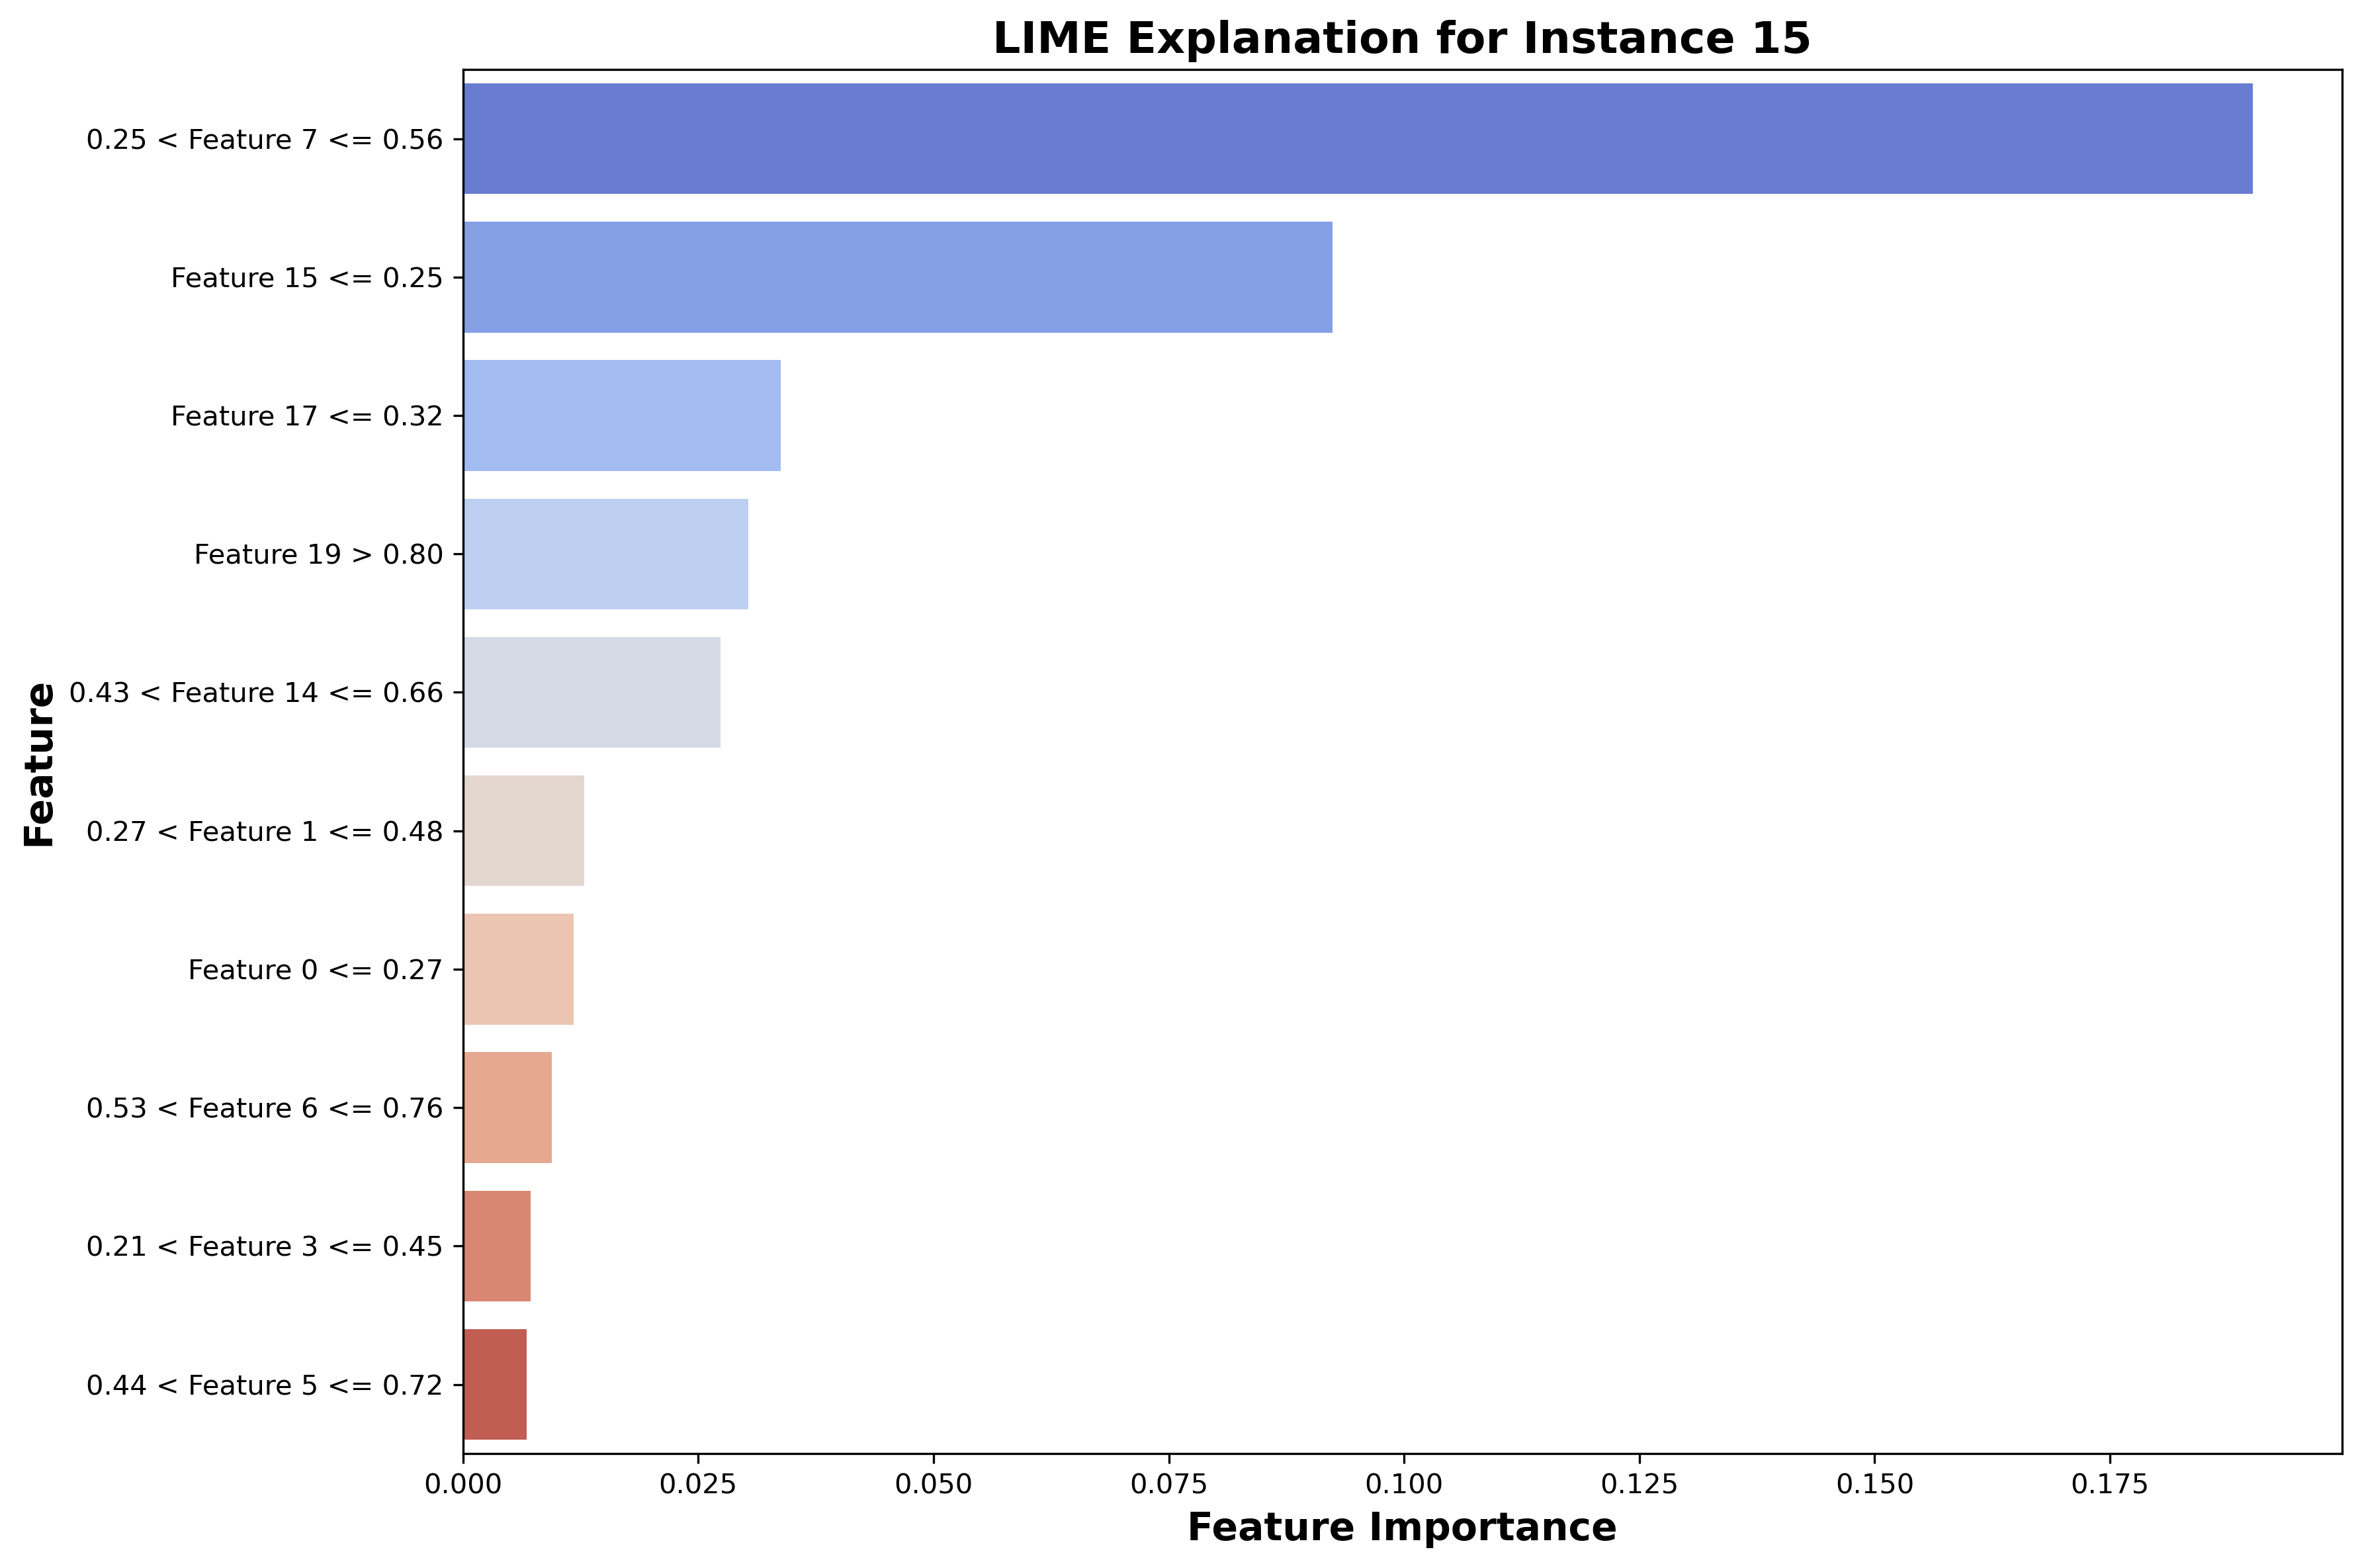


Explanation for Instance 4:
                  Feature  Importance
 0.25 < Feature 7 <= 0.56    0.186053
 0.52 < Feature 4 <= 0.76    0.161786
        Feature 13 > 0.75    0.059121
         Feature 1 > 0.78    0.025480
0.44 < Feature 12 <= 0.74    0.014285
0.54 < Feature 17 <= 0.74    0.011518
        Feature 8 <= 0.20    0.010274
 0.26 < Feature 2 <= 0.53    0.005665
        Feature 6 <= 0.29   -0.000019
        Feature 14 > 0.66   -0.008535


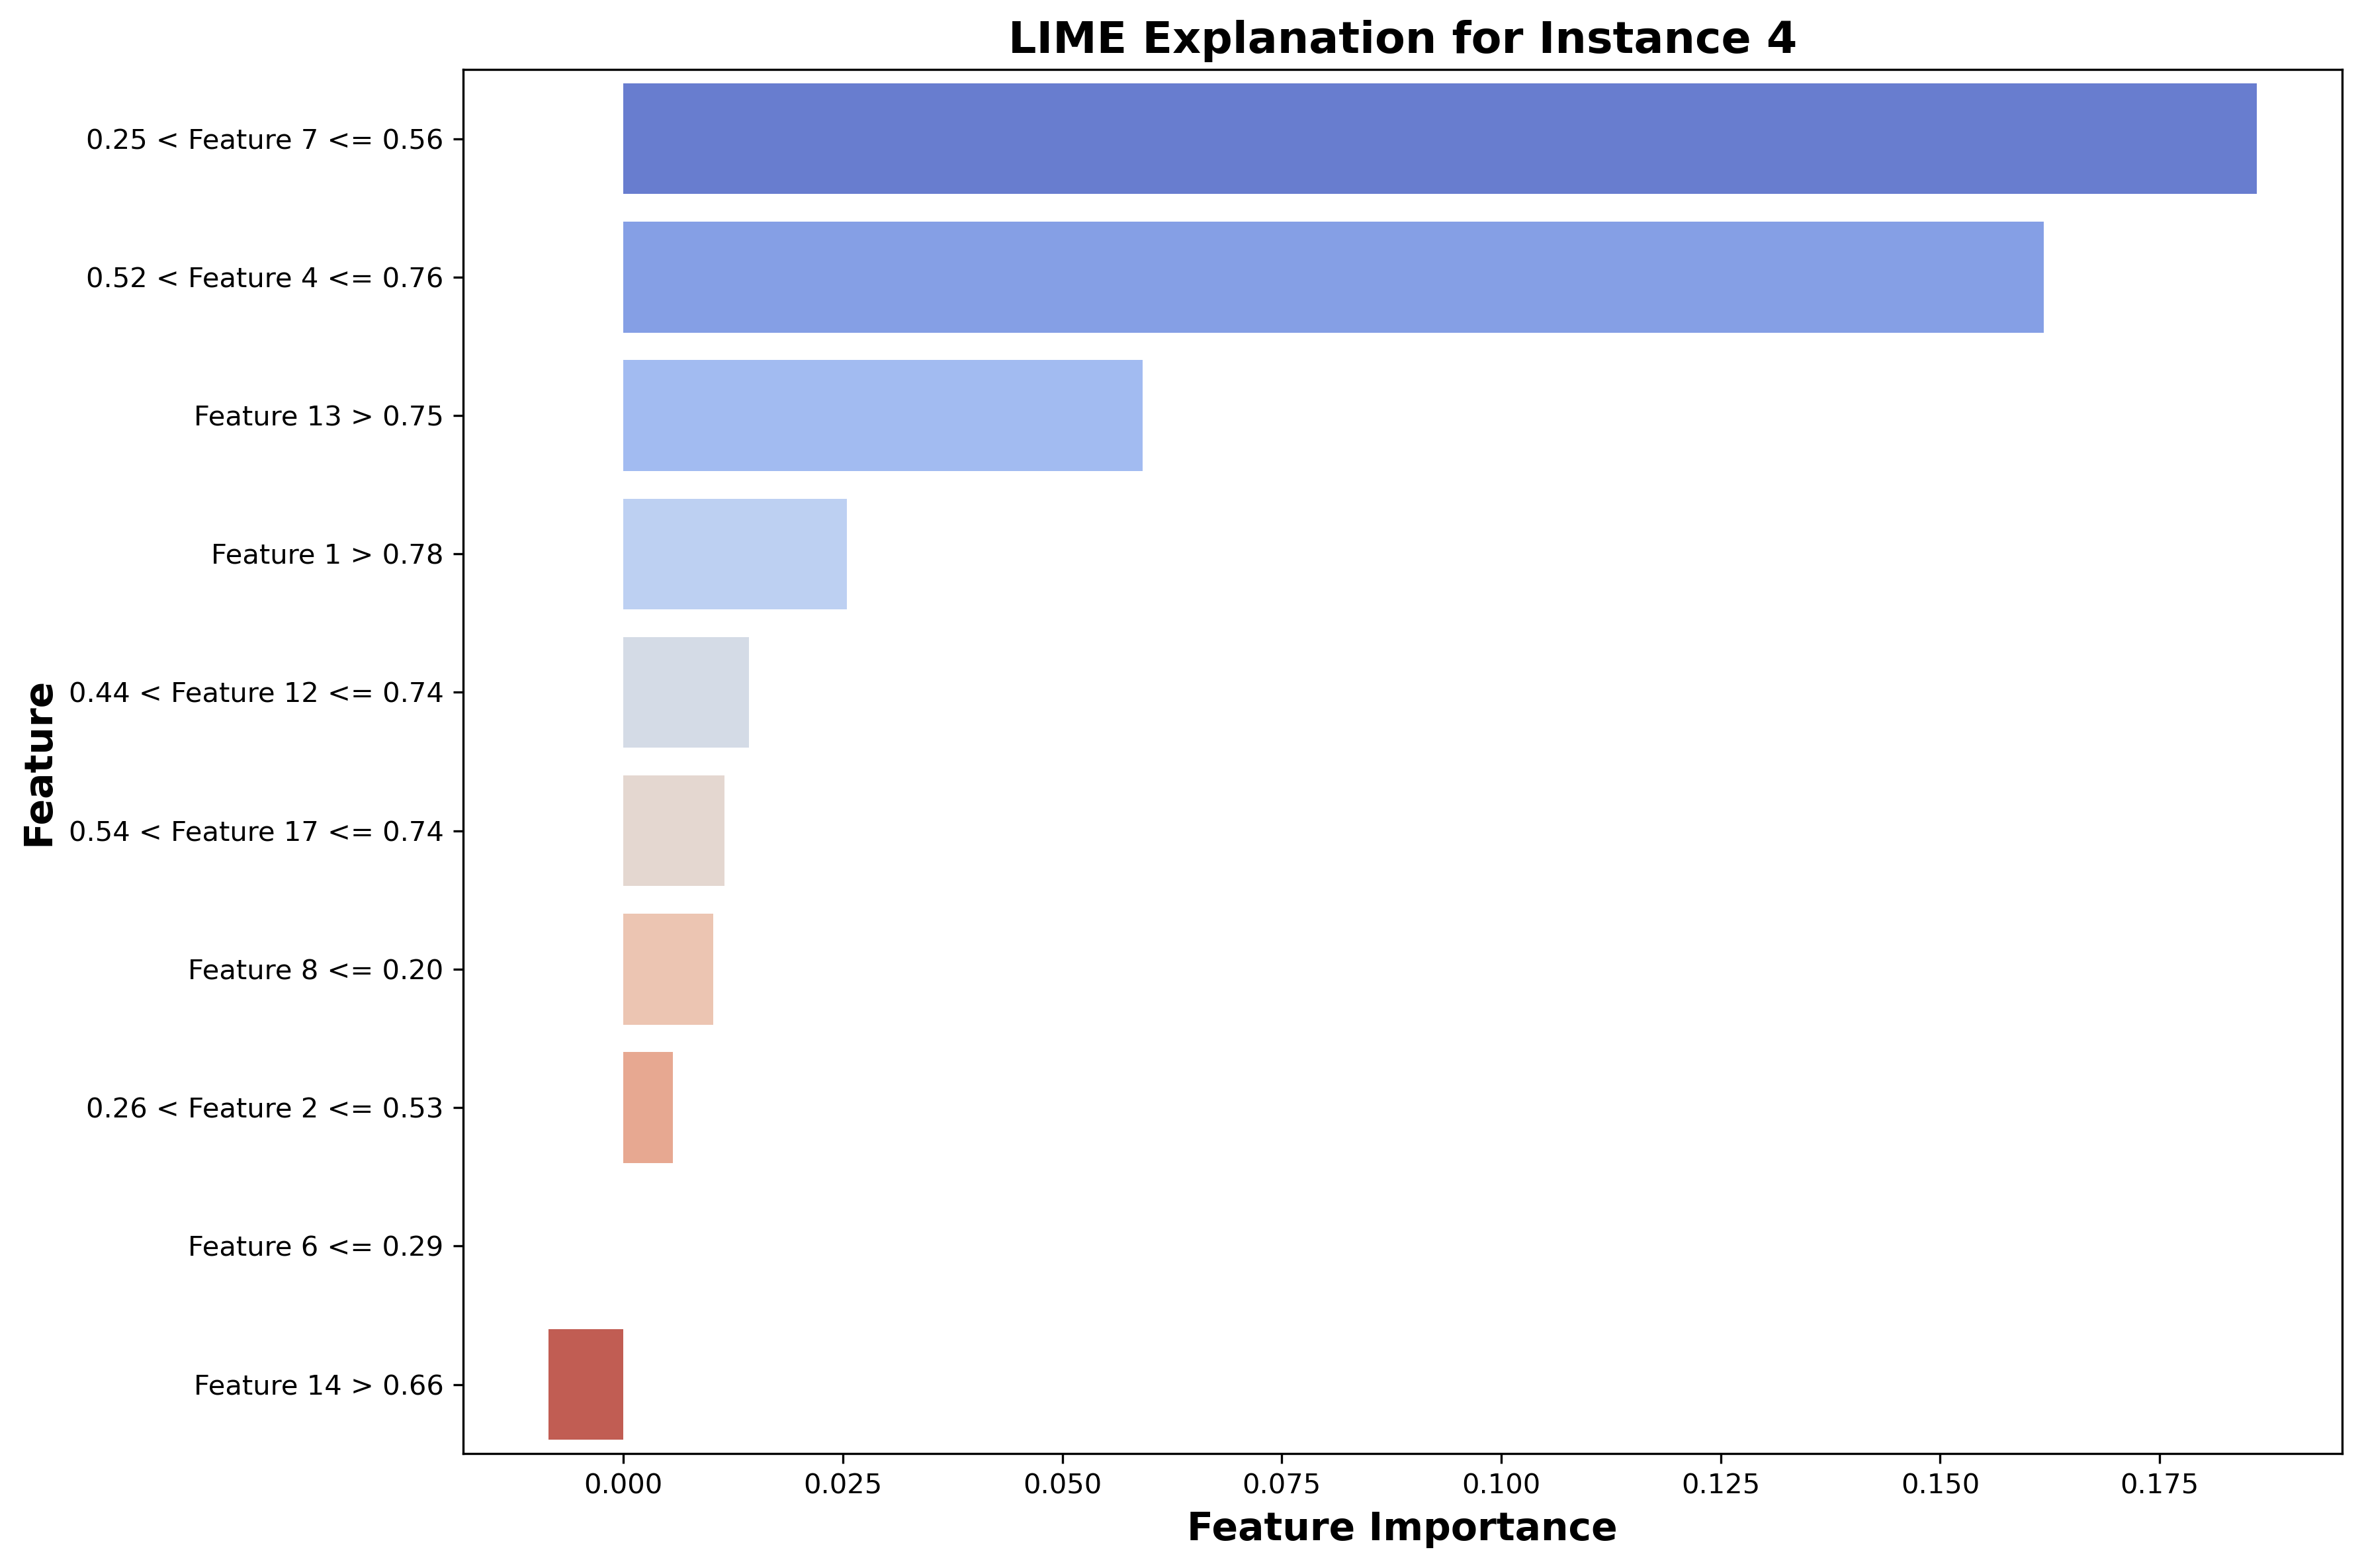


Explanation for Instance 1:
                  Feature  Importance
         Feature 4 > 0.76    0.306793
         Feature 2 > 0.77    0.041752
        Feature 5 <= 0.24    0.036091
        Feature 11 > 0.74    0.027135
       Feature 18 <= 0.21    0.020050
 0.29 < Feature 6 <= 0.53    0.012759
       Feature 17 <= 0.32    0.011163
0.50 < Feature 13 <= 0.75    0.010317
       Feature 14 <= 0.22    0.007387
       Feature 16 <= 0.34    0.002769


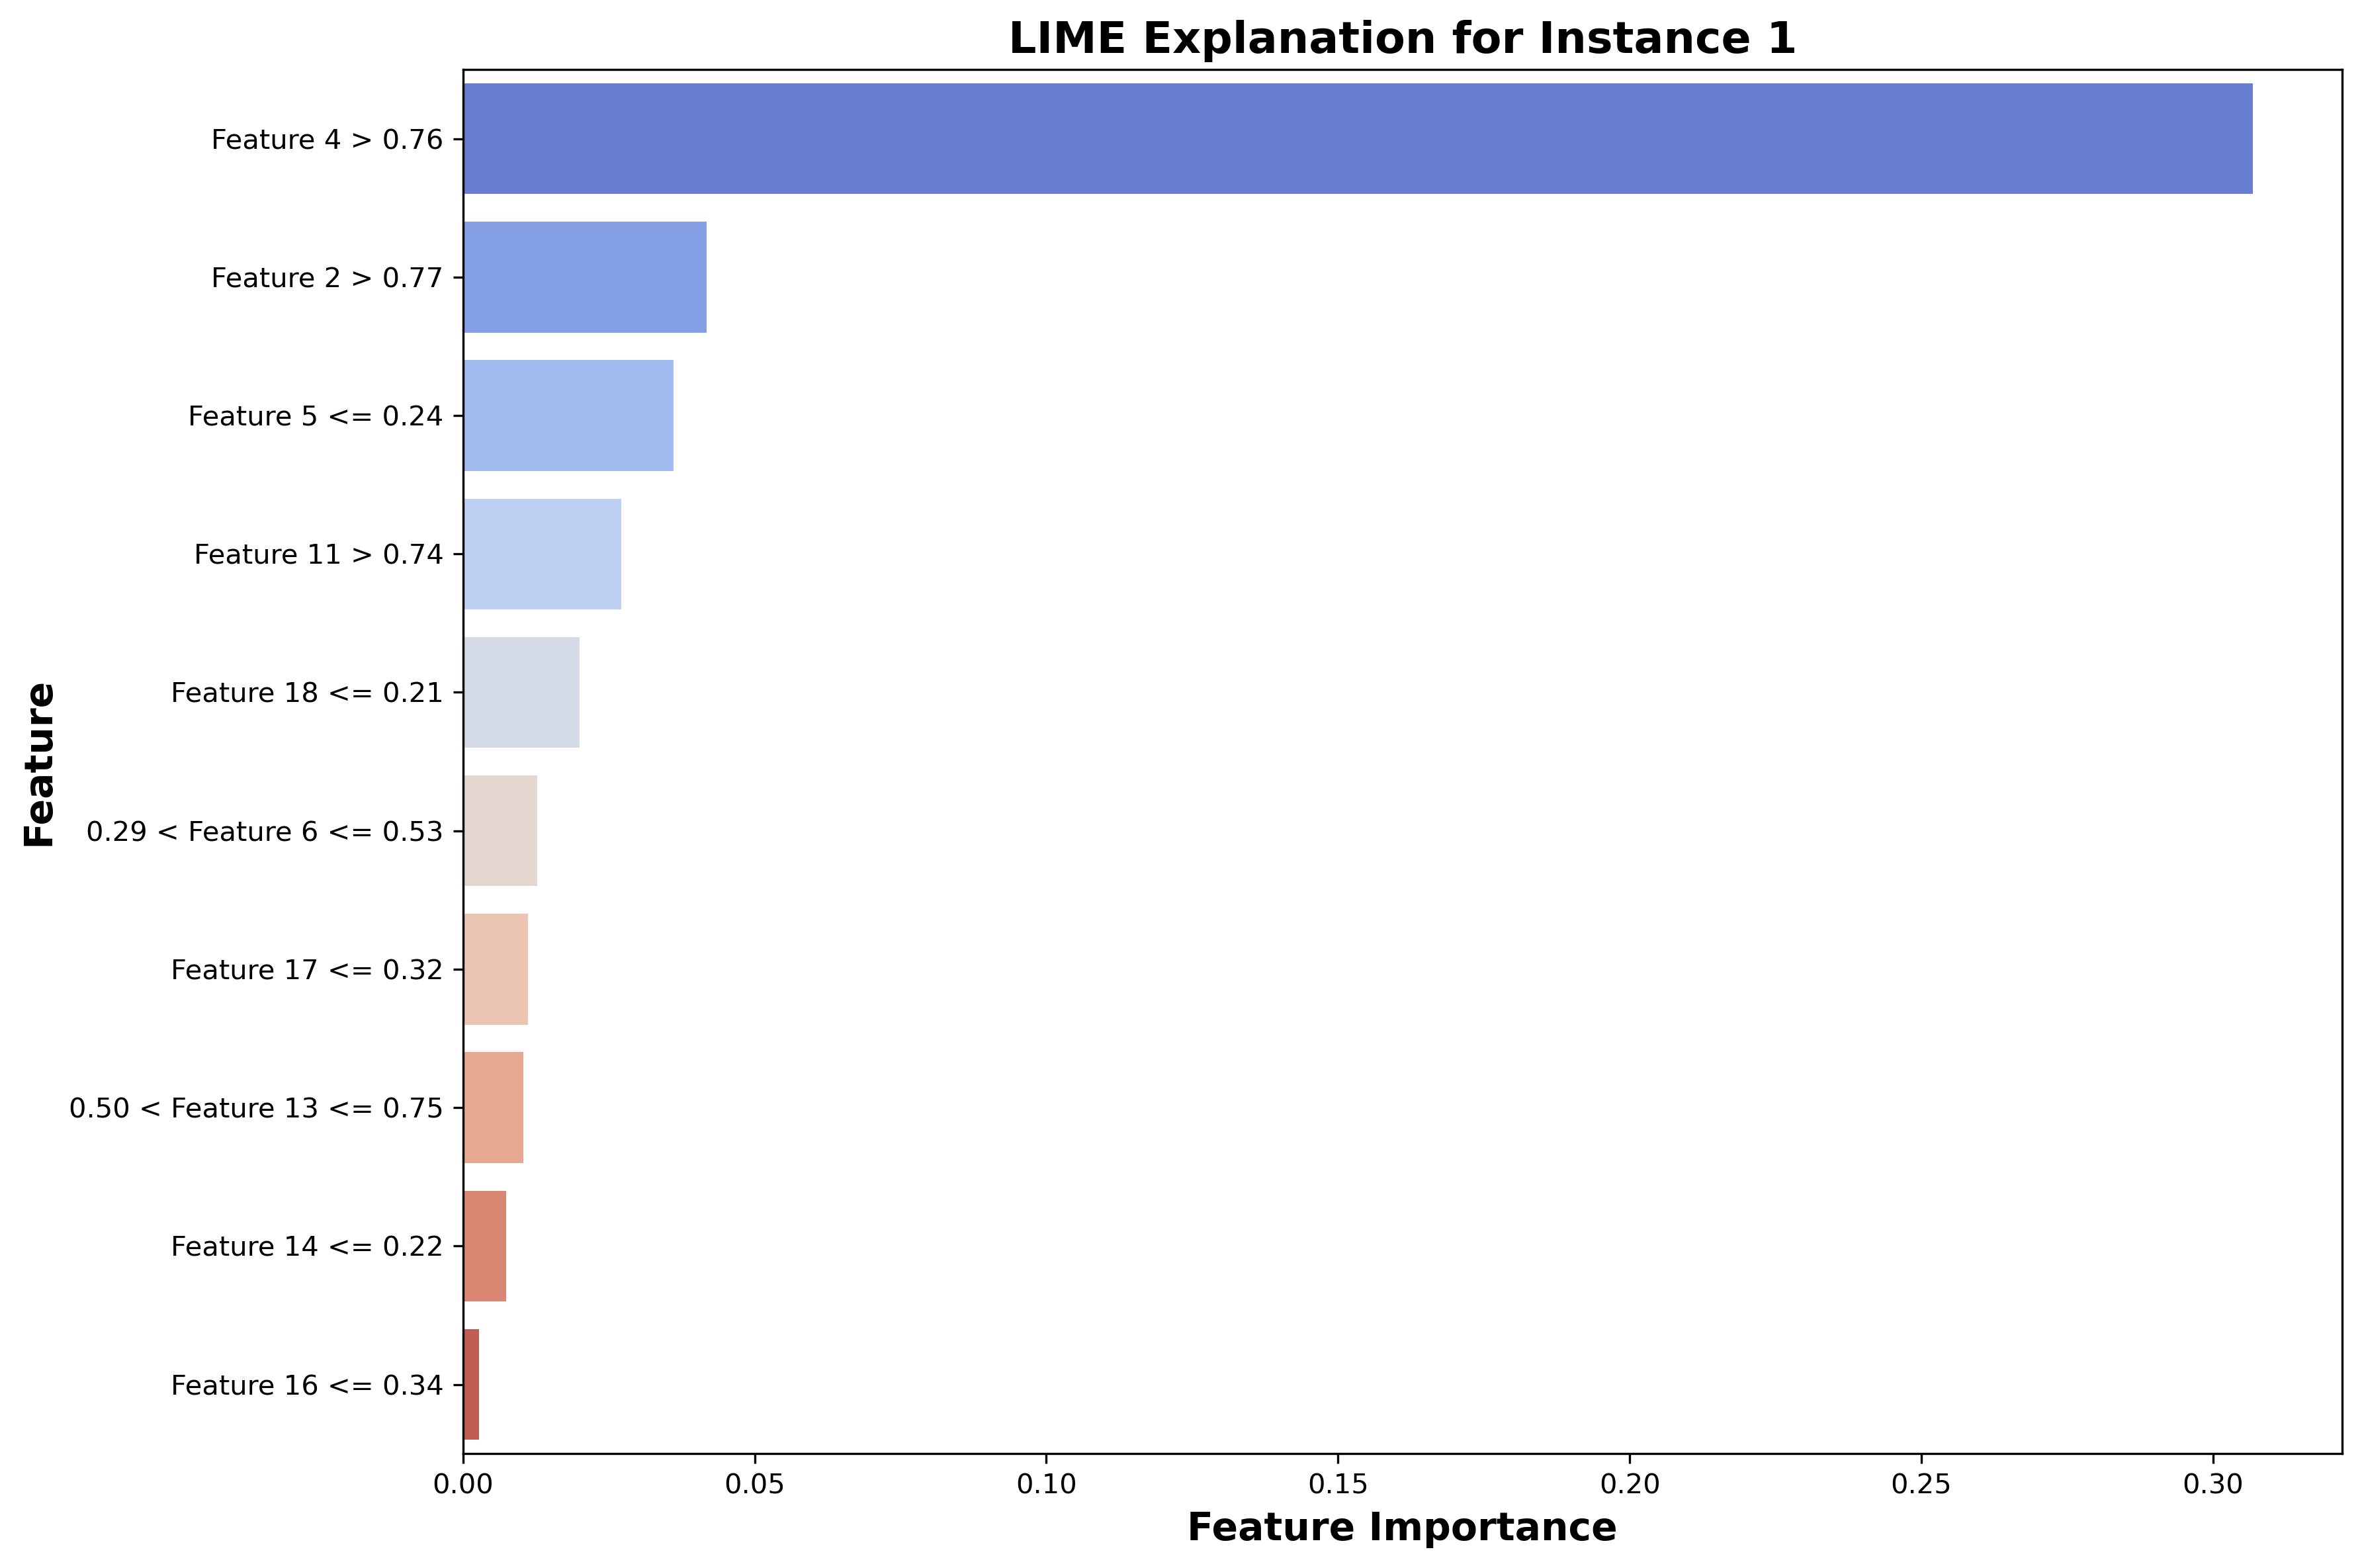


Explanation for Instance 3:
                  Feature  Importance
 0.52 < Feature 4 <= 0.76    0.162932
       Feature 15 <= 0.25    0.089463
0.25 < Feature 11 <= 0.48    0.068021
        Feature 13 > 0.75    0.061401
 0.53 < Feature 2 <= 0.77    0.045896
 0.29 < Feature 6 <= 0.53    0.021246
 0.20 < Feature 8 <= 0.39    0.017638
 0.51 < Feature 9 <= 0.74    0.017534
        Feature 0 <= 0.27    0.012647
0.59 < Feature 16 <= 0.78    0.001159


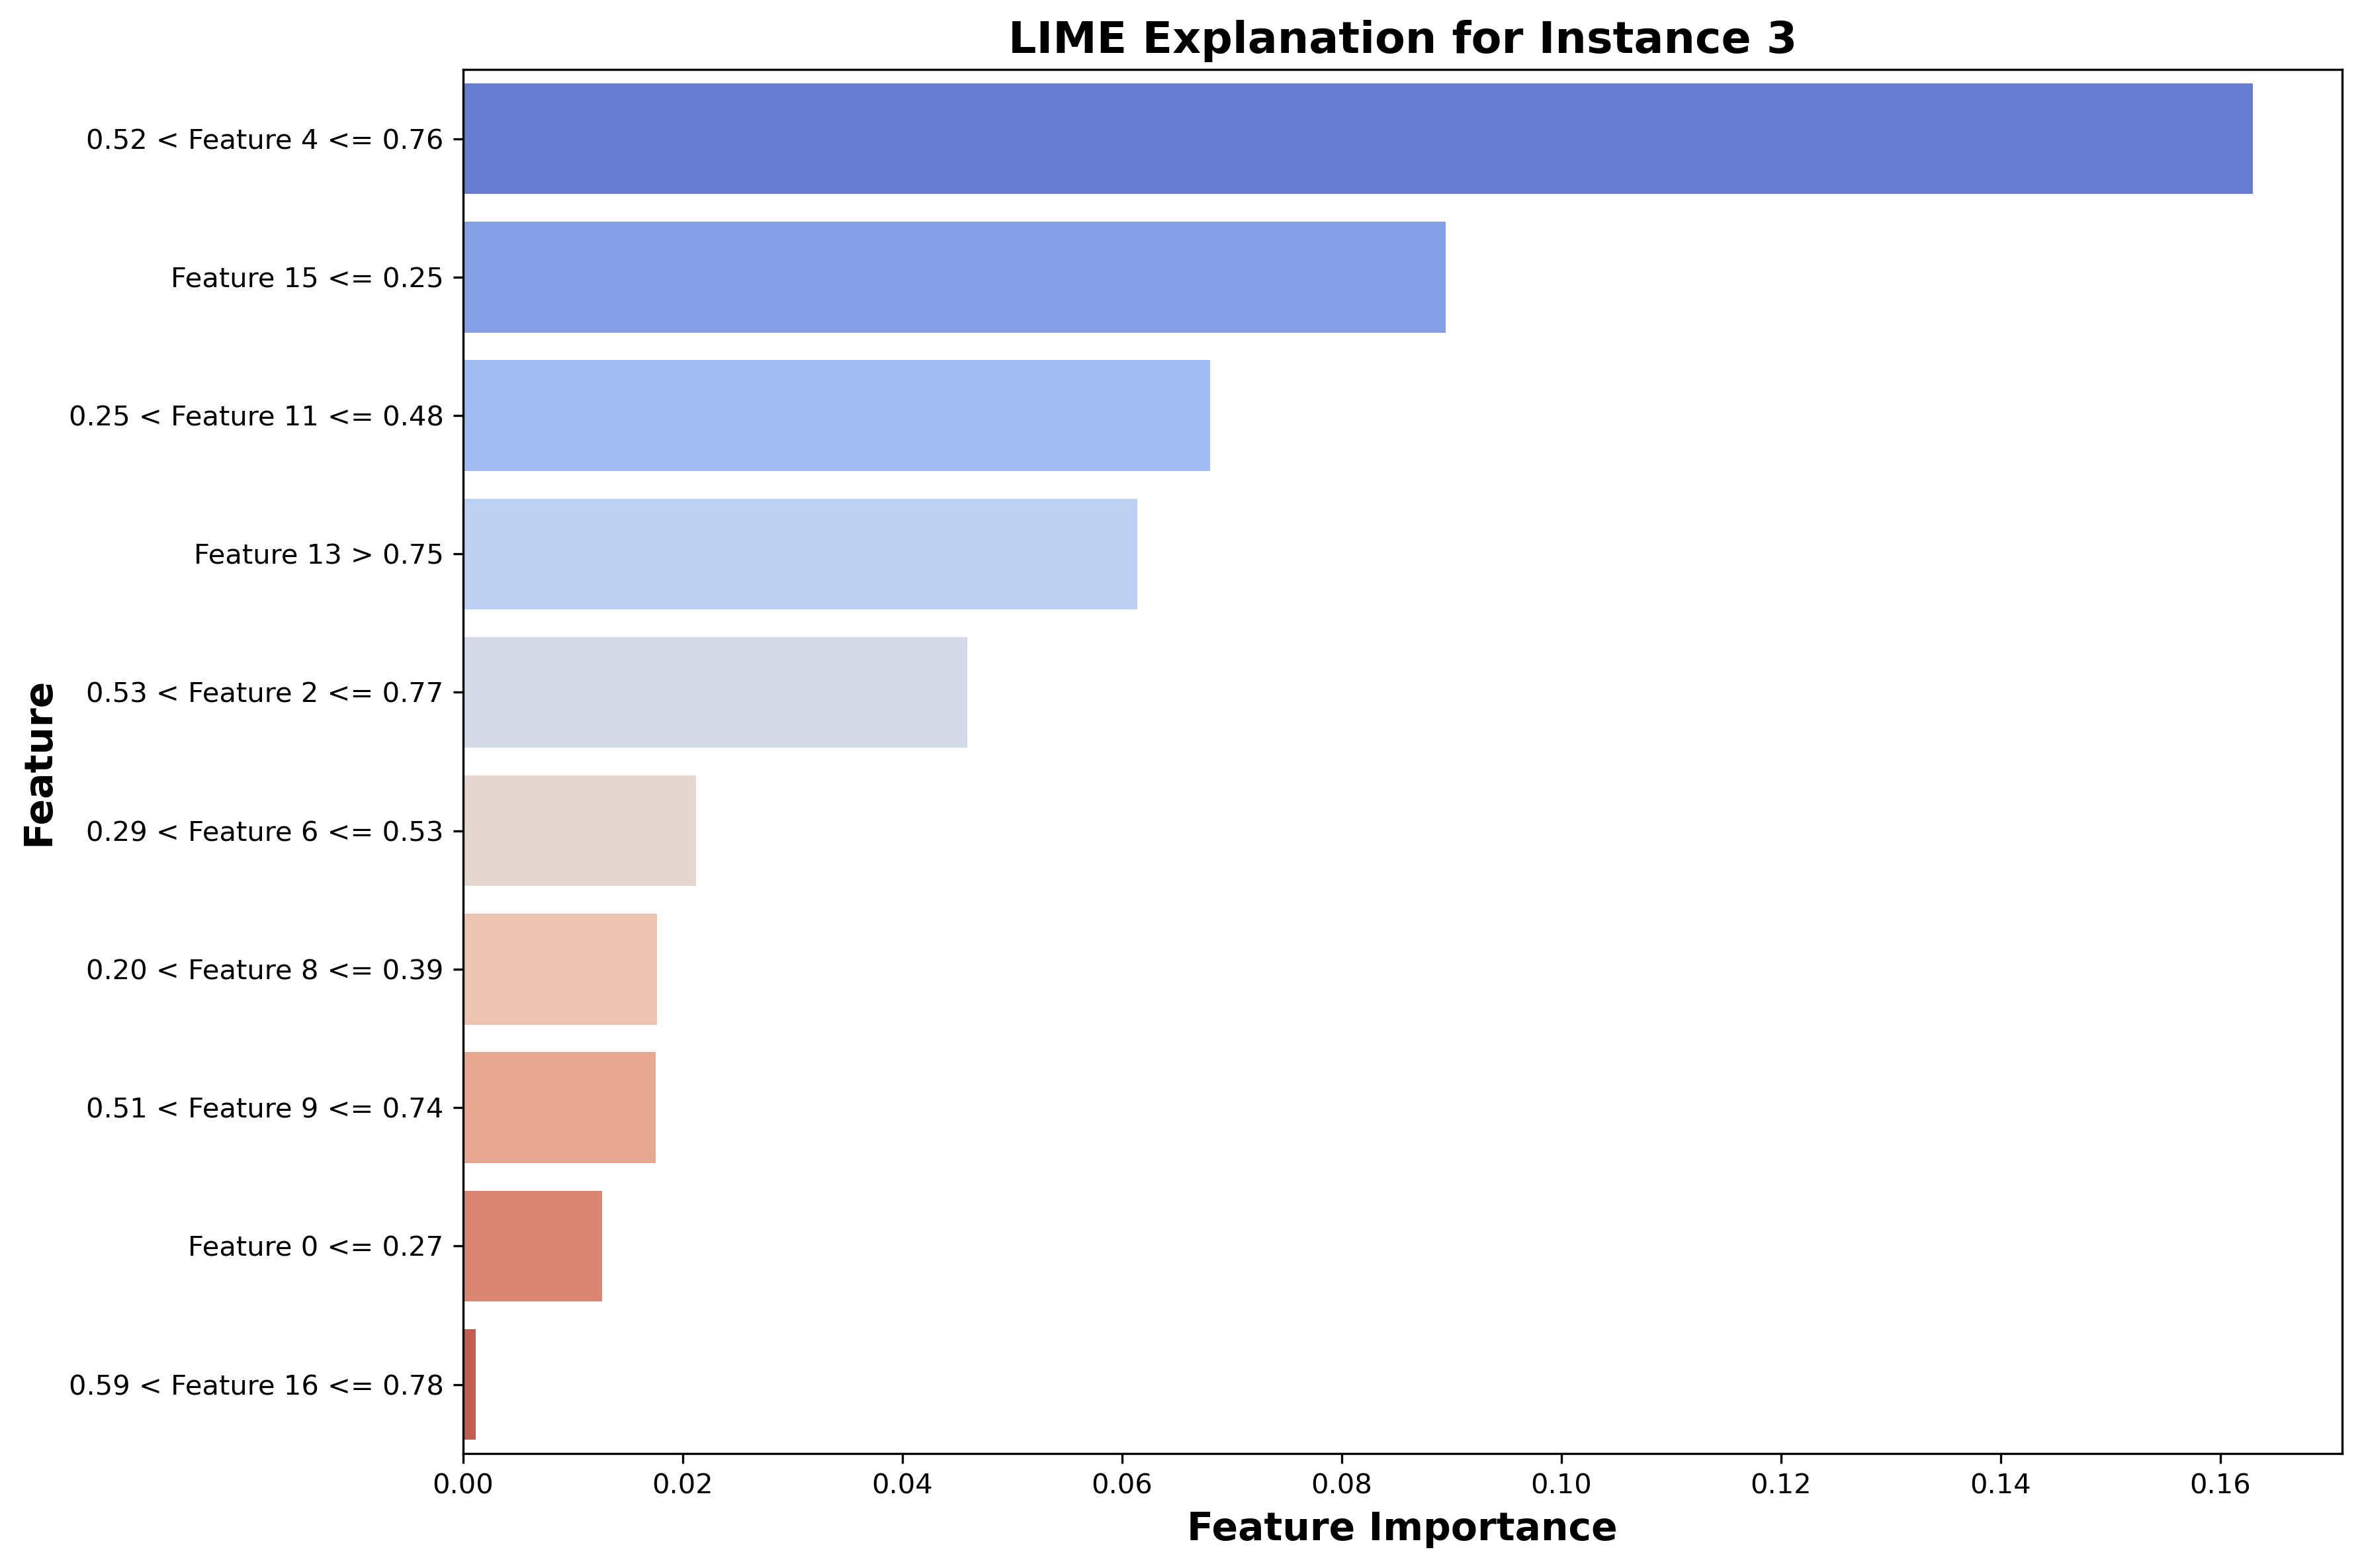

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import GradientBoostingClassifier  # Example model; replace with your model
from sklearn.model_selection import train_test_split

# Example data preparation (replace with your actual data)
# Replace with actual dataset and feature names
X = np.random.rand(100, 20)  # Dummy feature data
y = np.random.randint(0, 2, size=100)  # Dummy target data
feature_names = [f"Feature {i}" for i in range(X.shape[1])]  # Replace with actual feature names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
best_gbm_model = GradientBoostingClassifier(random_state=42)
best_gbm_model.fit(X_train, y_train)

# Convert X_test to DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,  # Pass numpy array
    feature_names=feature_names,  # Use feature names list
    class_names=['Class 0', 'Class 1'],  # Adjust class names as needed
    mode='classification',
    random_state=42
)

# Define function to predict using the model
predict_fn = lambda x: best_gbm_model.predict_proba(x)

# Select a sample of instances from the test set
sample_idx = np.random.choice(X_test_df.index, 5, replace=False)  # Adjust the sample size as needed

# Generate LIME explanations for each sample
for idx in sample_idx:
    # Create the LIME explanation
    exp = explainer.explain_instance(
        X_test_df.iloc[idx],  # Use iloc to select the instance
        predict_fn,
        num_features=len(feature_names)  # Explain all features
    )
    
    # Print the explanation for the selected instance
    print(f"\nExplanation for Instance {idx}:")
    
    # Get the explanation as a list of tuples (feature, importance)
    exp_list = exp.as_list()
    
    # Convert to DataFrame for easier text output
    df = pd.DataFrame(exp_list, columns=['Feature', 'Importance'])
    
    # Sort and select top 10 features by importance
    df_sorted = df.sort_values(by='Importance', ascending=False).head(10)
    
    # Print the DataFrame
    print(df_sorted.to_string(index=False))
    
    # Create a high DPI figure for sharpness
    plt.figure(figsize=(12, 8), dpi=300)
    
    # Create a horizontal bar plot using seaborn
    sns.barplot(x='Importance', y='Feature', data=df_sorted, palette='coolwarm', orient='h')
    
    plt.title(f'LIME Explanation for Instance {idx}', fontsize=16, weight='bold')
    plt.xlabel('Feature Importance', fontsize=14, weight='bold')
    plt.ylabel('Feature', fontsize=14, weight='bold')
    
    # Adjust the layout to ensure nothing is clipped
    plt.tight_layout()
    plt.show()


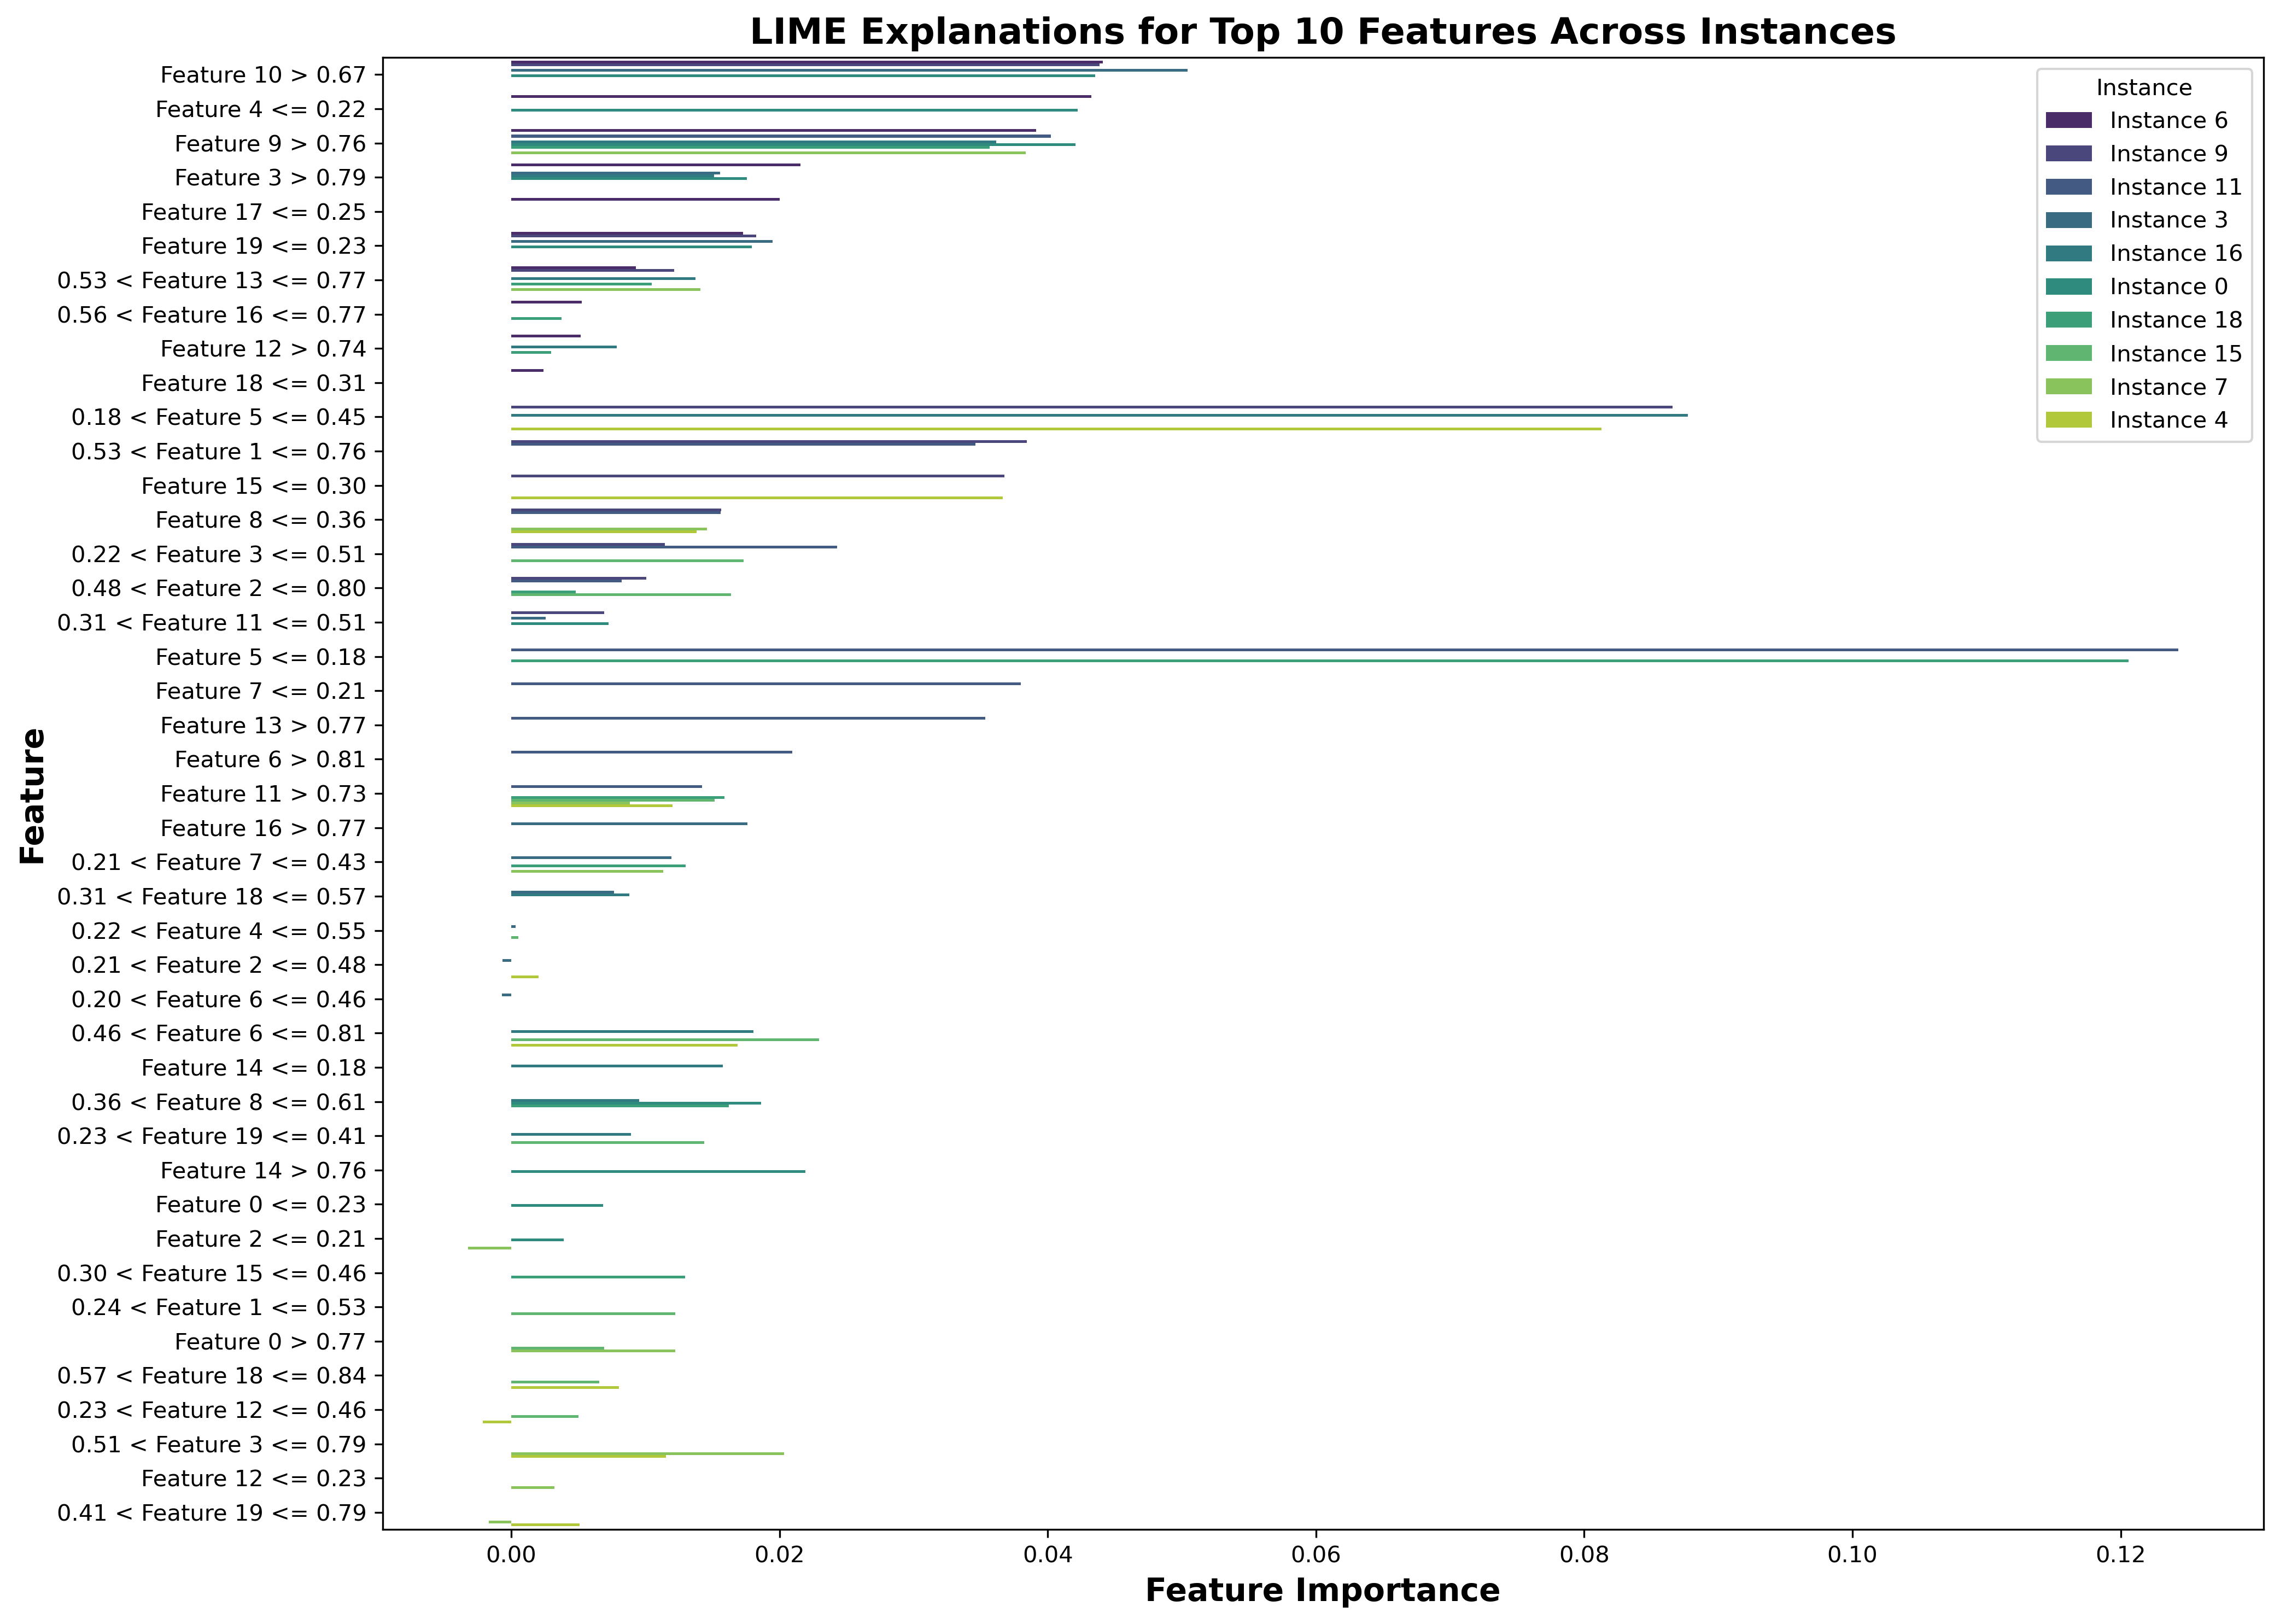

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Actual dataset and feature names
X = np.random.rand(100, 20)  # Dummy feature data
y = np.random.randint(0, 3, size=100)  # Dummy target data for 3 classes
feature_names = [f"Feature {i}" for i in range(X.shape[1])]  # Replace with actual feature names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
best_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
best_rf_classifier.fit(X_train, y_train)

# Convert X_test to DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1', 'Class 2'],  # Adjust class names as needed
    mode='classification',
    random_state=42
)

# Define function to predict using the model
predict_fn = lambda x: best_rf_classifier.predict_proba(x)

# Select a sample of instances from the test set
sample_idx = np.random.choice(X_test_df.index, 10, replace=False)  # Adjust the sample size as needed

# Prepare to collect feature importances for all sampled instances
all_feature_importances = []

# Generate LIME explanations for each sample
for idx in sample_idx:
    exp = explainer.explain_instance(
        X_test_df.iloc[idx],
        predict_fn,
        num_features=len(feature_names)
    )
    
    # Get the explanation as a list of tuples (feature, importance)
    exp_list = exp.as_list()
    
    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(exp_list, columns=['Feature', 'Importance'])
    
    # Sort and select top 10 features by importance
    df_sorted = df.sort_values(by='Importance', ascending=False).head(10)
    
    # Add an instance identifier to the DataFrame
    df_sorted['Instance'] = f'Instance {idx}'
    
    # Append to the list
    all_feature_importances.append(df_sorted)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(all_feature_importances)

# Create a high DPI figure for clarity
plt.figure(figsize=(14, 10), dpi=300)

# Create a bar plot for the top 10 features across instances
sns.barplot(x='Importance', y='Feature', hue='Instance', data=combined_df, palette='viridis', orient='h')

plt.title('LIME Explanations for Top 10 Features Across Instances', fontsize=16, weight='bold')
plt.xlabel('Feature Importance', fontsize=14, weight='bold')
plt.ylabel('Feature', fontsize=14, weight='bold')

# Adjust the layout to ensure nothing is clipped
plt.tight_layout()

# Save the plot as an image file
plt.savefig('lime_explanations_rf.png')

plt.show()


In [100]:
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Actual dataset and feature names
X = np.random.rand(100, 20)  # Dummy feature data
y = np.random.randint(0, 3, size=100)  # Dummy target data for 3 classes
feature_names = [f"Feature {i}" for i in range(X.shape[1])]  # Replace with actual feature names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
best_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Convert X_test to DataFrame with feature names
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=['Class 0', 'Class 1', 'Class 2'],
    mode='classification',
    random_state=42
)

# Define function to predict using the model
predict_fn = lambda x: best_rf_classifier.predict_proba(x)

# Select a sample of instances from the test set
sample_idx = np.random.choice(X_test_df.index, 10, replace=False)  # Adjust the sample size as needed

# Prepare to collect feature importances for all sampled instances
all_feature_importances = []

# Generate LIME explanations for each sample
for idx in sample_idx:
    exp = explainer.explain_instance(
        X_test_df.iloc[idx],
        predict_fn,
        num_features=len(feature_names)
    )
    
    # Get the explanation as a list of tuples (feature, importance)
    exp_list = exp.as_list()
    
    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame(exp_list, columns=['Feature', 'Importance'])
    
    # Sort and select top 10 features by importance
    df_sorted = df.sort_values(by='Importance', ascending=False).head(10)
    
    # Add an instance identifier to the DataFrame
    df_sorted['Instance'] = f'Instance {idx}'
    
    # Append to the list
    all_feature_importances.append(df_sorted)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(all_feature_importances)

# Print the results
for instance, group in combined_df.groupby('Instance'):
    print(f"\nExplanation for {instance}:")
    print(group[['Feature', 'Importance']].to_string(index=False))



Explanation for Instance 1:
                  Feature  Importance
        Feature 19 > 0.80    0.055794
        Feature 1 <= 0.22    0.051438
        Feature 2 <= 0.34    0.041155
       Feature 17 <= 0.29    0.022684
        Feature 9 <= 0.27    0.016610
0.47 < Feature 15 <= 0.73    0.007984
0.26 < Feature 11 <= 0.51    0.007692
 0.21 < Feature 3 <= 0.42    0.004841
 0.46 < Feature 0 <= 0.71    0.004476
        Feature 5 <= 0.25    0.003242

Explanation for Instance 11:
                  Feature  Importance
        Feature 19 > 0.80    0.059262
        Feature 4 <= 0.28    0.050661
         Feature 8 > 0.68    0.034968
       Feature 10 <= 0.35    0.026522
       Feature 17 <= 0.29    0.025282
        Feature 15 > 0.73    0.010031
 0.45 < Feature 6 <= 0.71    0.009333
 0.57 < Feature 9 <= 0.78    0.002623
        Feature 12 > 0.76    0.002538
0.24 < Feature 13 <= 0.51    0.001436

Explanation for Instance 14:
                  Feature  Importance
        Feature 1 <= 0.22    0.053327

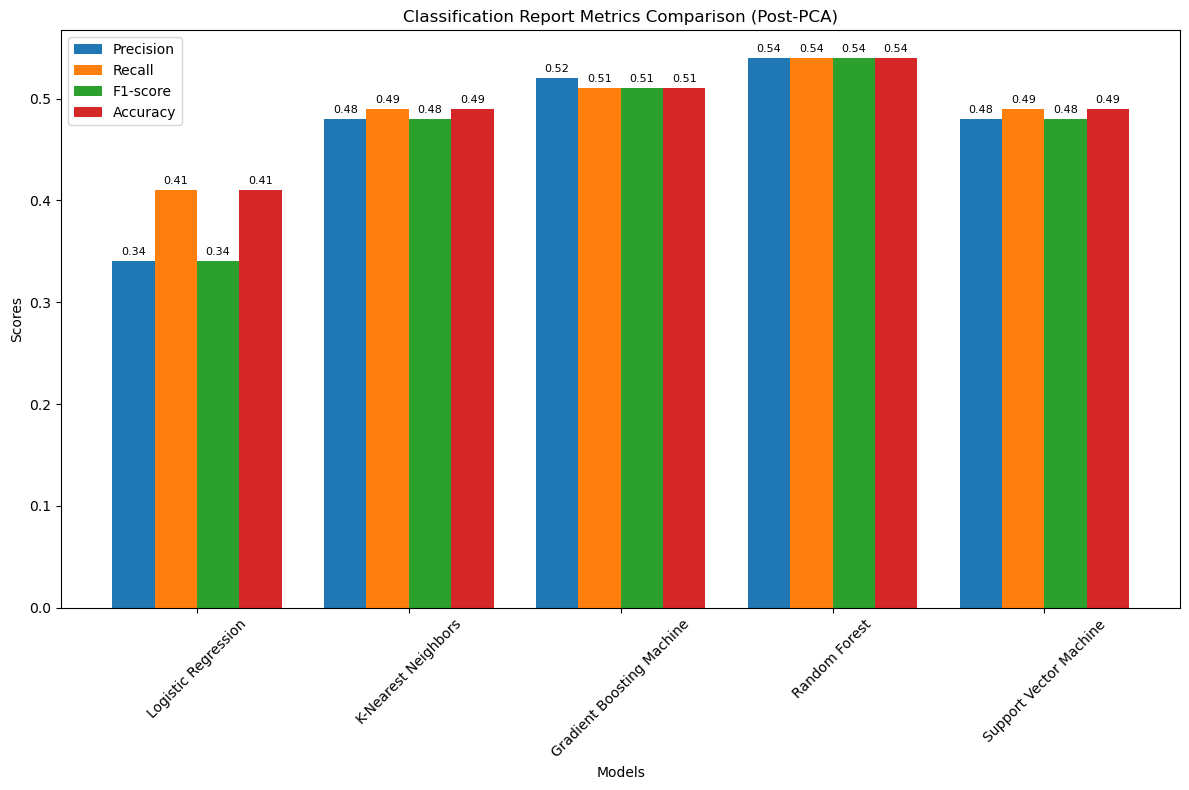

Metrics saved for Power BI.


In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Updated metrics for each model based on the provided classification reports
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Gradient Boosting Machine', 'Random Forest', 'Support Vector Machine']

# Extracted macro average metrics from the classification reports
precision = [0.34, 0.48, 0.52, 0.54, 0.48]
recall = [0.41, 0.49, 0.51, 0.54, 0.49]
f1_score = [0.34, 0.48, 0.51, 0.54, 0.48]
accuracy = [0.41, 0.49, 0.51, 0.54, 0.49]

# Number of models
num_models = len(models)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = np.arange(num_models)

# Plot bars for precision, recall, f1-score, and accuracy
rects1 = ax.bar(index - 3*bar_width/2, precision, bar_width, label='Precision')
rects2 = ax.bar(index - bar_width/2, recall, bar_width, label='Recall')
rects3 = ax.bar(index + bar_width/2, f1_score, bar_width, label='F1-score')
rects4 = ax.bar(index + 3*bar_width/2, accuracy, bar_width, label='Accuracy')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics Comparison (Post-PCA)')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Function to attach labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Attach labels to each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

# Save the metrics to a DataFrame for Power BI
metrics_df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'Accuracy': accuracy
})

# Save the DataFrame to a CSV file for Power BI
metrics_df.to_csv('classification_report_metrics_comparison_pca.csv', index=False)

print("Metrics saved for Power BI.")
